First I've uploaded all the required basic libraries for data manipulation,numeric and static libraries like pandas,numpy,scipy and data visulaization tool like seaborn and matplotlib

In [65]:
import numpy as np
import pandas as pd
import scipy.stats
from scipy.stats import zscore,boxcox
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('avocado.csv')
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

Now,I've uploaded the CSV file of Avacado Project and made a dataframe for the same.

In [67]:
df=pd.read_csv('avocado.csv',header=0,names=['S.N.','Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region'])
df

S.N.        Date  AveragePrice  Total Volume     4046       4225  \
0         0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1         1  2015-12-20          1.35      54876.98   674.28   44638.81   
2         2  2015-12-13          0.93     118220.22   794.70  109149.67   
3         3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4         4  2015-11-29          1.28      51039.60   941.48   43838.39   
...     ...         ...           ...           ...      ...        ...   
18244     7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245     8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246     9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247    10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248    11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

I've renamed the unnamed column as S.N.

##### In this dataset I've to Predict the Average Price of Avacado per unit and Region both. Since Average Price is in the form of continuous number hence will use Regression model and Region is in the form of categorical String format so will use classification model as well.

#### Ergo, first will build a regression model to predict the AveragePrice of Avacado per unit and later in this notebook itself will build a classification model to predict region as well.

### A): Regression Model Building

### Exploratory Data Analysis(EDA)

In [68]:
df['Date']=pd.to_datetime(df['Date'])

Also, I've changed the format of date column into datetime format

In [24]:
print('Shape is-',df.shape)
print('Row"s are',df.shape[0])
print('Columns are',df.shape[1])

Shape is- (18249, 14)
Row"s are 18249
Columns are 14


As,we can see that there are 18249 rows and 14 columns including the Target Variable-AveragePrice.In this project I've to train the model so that I can simply predict the per unit average price of avacado.Also, there are only two categorical object oriented attributes are present and they are- Type and Region,one attribute is in date time format and rest are in float or int format.

In [25]:
#columns of the dataframes are-
df.columns

Index(['S.N.', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [26]:
df.index

RangeIndex(start=0, stop=18249, step=1)

In [27]:
df.ndim

2

In [28]:
df.size

255486

In [31]:
#it shows top 5 rows
df.head()

S.N.        Date  AveragePrice  Total Volume     4046       4225    4770  \
0     0  2015-12-27          1.33      64236.62  1036.74   54454.85   48.16   
1     1  2015-12-20          1.35      54876.98   674.28   44638.81   58.33   
2     2  2015-12-13          0.93     118220.22   794.70  109149.67  130.50   
3     3  2015-12-06          1.08      78992.15  1132.00   71976.41   72.58   
4     4  2015-11-29          1.28      51039.60   941.48   43838.39   75.78   

   Total Bags  Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8696.87     8603.62       93.25          0.0  conventional  2015  Albany  
1     9505.56     9408.07       97.49          0.0  conventional  2015  Albany  
2     8145.35     8042.21      103.14          0.0  conventional  2015  Albany  
3     5811.16     5677.40      133.76          0.0  conventional  2015  Albany  
4     6183.95     5986.26      197.69          0.0  conventional  2015  Albany

In [32]:
#it shows bottom 5 rows
df.tail()

S.N.        Date  AveragePrice  Total Volume     4046     4225    4770  \
18244     7  2018-02-04          1.63      17074.83  2046.96  1529.20    0.00   
18245     8  2018-01-28          1.71      13888.04  1191.70  3431.50    0.00   
18246     9  2018-01-21          1.87      13766.76  1191.92  2452.79  727.94   
18247    10  2018-01-14          1.93      16205.22  1527.63  2981.04  727.01   
18248    11  2018-01-07          1.62      17489.58  2894.77  2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
18244    13498.67    13066.82      431.85          0.0  organic  2018   
18245     9264.84     8940.04      324.80          0.0  organic  2018   
18246     9394.11     9351.80       42.31          0.0  organic  2018   
18247    10969.54    10919.54       50.00          0.0  organic  2018   
18248    12014.15    11988.14       26.01          0.0  organic  2018   

                 region  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico

In [33]:
#it shows any one random row
df.sample()

S.N.        Date  AveragePrice  Total Volume    4046     4225    4770  \
14866    19  2017-08-20          1.75      39133.75  924.94  8272.68  114.95   

       Total Bags  Small Bags  Large Bags  XLarge Bags     type  year  \
14866    29821.18    29816.74        4.44          0.0  organic  2017   

                    region  
14866  BaltimoreWashington

In [37]:
df.dtypes

S.N.                     int64
Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   S.N.          18249 non-null  int64         
 1   Date          18249 non-null  datetime64[ns]
 2   AveragePrice  18249 non-null  float64       
 3   Total Volume  18249 non-null  float64       
 4   4046          18249 non-null  float64       
 5   4225          18249 non-null  float64       
 6   4770          18249 non-null  float64       
 7   Total Bags    18249 non-null  float64       
 8   Small Bags    18249 non-null  float64       
 9   Large Bags    18249 non-null  float64       
 10  XLarge Bags   18249 non-null  float64       
 11  type          18249 non-null  object        
 12  year          18249 non-null  int64         
 13  region        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(2), object(2)
memory usage: 1.9+ MB


In [39]:
df.isnull()

S.N.   Date  AveragePrice  Total Volume   4046   4225   4770  \
0      False  False         False         False  False  False  False   
1      False  False         False         False  False  False  False   
2      False  False         False         False  False  False  False   
3      False  False         False         False  False  False  False   
4      False  False         False         False  False  False  False   
...      ...    ...           ...           ...    ...    ...    ...   
18244  False  False         False         False  False  False  False   
18245  False  False         False         False  False  False  False   
18246  False  False         False         False  False  False  False   
18247  False  False         False         False  False  False  False   
18248  False  False         False         False  False  False  False   

       Total Bags  Small Bags  Large Bags  XLarge Bags   type   year  region  
0           False       False       False        False  False  False   False  
1           False       False       False        False  False  False   False  
2           False       False       False        False  False  False   False  
3           False       False       False        False  False  False   False  
4           False       False       False        False  False  False   False  
...           ...         ...         ...          ...    ...    ...     ...  
18244       False       False       False        False  False  False   False  
18245       False       False       False        False  False  False   False  
18246       False       False       False        False  False  False   False  
18247       False       False       False        False  False  False   False  
18248       False       False       False        False  False  False   False  

[18249 rows x 14 columns]

In [40]:
df.isnull().any()

S.N.            False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool

In [41]:
df.isnull().any().any()

False

In [42]:
df.isnull().sum()

S.N.            0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [43]:
df.isnull().sum().sum()

0

<AxesSubplot:>

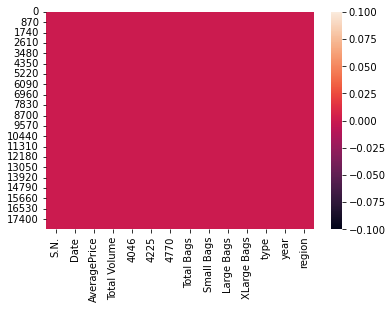

In [46]:
sns.heatmap(df.isnull())

##### There are no null values are present in this dataset

In [56]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in l:
    print(f'Total Unique Value for attribute {i} is\n\n {df[i].unique()}')
    print('\n')

Total Unique Value for attribute Total Volume is

 [ 64236.62  54876.98 118220.22 ...  13766.76  16205.22  17489.58]


Total Unique Value for attribute 4046 is

 [1036.74  674.28  794.7  ... 1191.92 1527.63 2894.77]


Total Unique Value for attribute 4225 is

 [ 54454.85  44638.81 109149.67 ...   2452.79   2981.04   2356.13]


Total Unique Value for attribute 4770 is

 [ 48.16  58.33 130.5  ... 727.94 727.01 224.53]


Total Unique Value for attribute Total Bags is

 [ 8696.87  9505.56  8145.35 ...  9394.11 10969.54 12014.15]


Total Unique Value for attribute Small Bags is

 [ 8603.62  9408.07  8042.21 ...  9351.8  10919.54 11988.14]


Total Unique Value for attribute Large Bags is

 [ 93.25  97.49 103.14 ... 324.8   42.31  26.01]


Total Unique Value for attribute XLarge Bags is

 [  0.    33.33 104.17 ... 228.27  12.12  24.18]


Total Unique Value for attribute type is

 ['conventional' 'organic']


Total Unique Value for attribute year is

 [2015 2016 2017 2018]


Total Unique Value

#### The above output's are showing us all the unique values that are present inside each columns.
1.Attribute type has only two unique values inside it

2.Attribute year has four unique values inside it and rest attributes are having more than 4 unique values inside it.

In [57]:
l=['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in l:
    print(f'Total Value counts for attribute {i} is\n\n {df[i].value_counts()}')
    print('\n')

Total Value counts for attribute Date is

 2015-12-27    108
2017-12-24    108
2017-12-10    108
2017-12-03    108
2017-11-26    108
             ... 
2016-11-06    108
2018-01-07    108
2017-06-18    107
2017-06-25    107
2015-12-06    107
Name: Date, Length: 169, dtype: int64


Total Value counts for attribute AveragePrice is

 1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64


Total Value counts for attribute Total Volume is

 4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64


Total Value counts for attribute 4046 is

 0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Nam

#### The above output are representing the total count of all the unique values for each attributes.
See we can refer the above output to know the count for each attributes,but What i can observe from the above output is like most of the attributes are containg '0' as an unique value and there counts are really high and that might creates an error while going ahead for training and testing phase.Ergo,going forward i will try to replace all the zeros with the mean value of their respective columns.

### Data Visualization

#### 1.Countplot

This is the Countplot diagram for--- type
AxesSubplot(0.125,0.125;0.775x0.755)


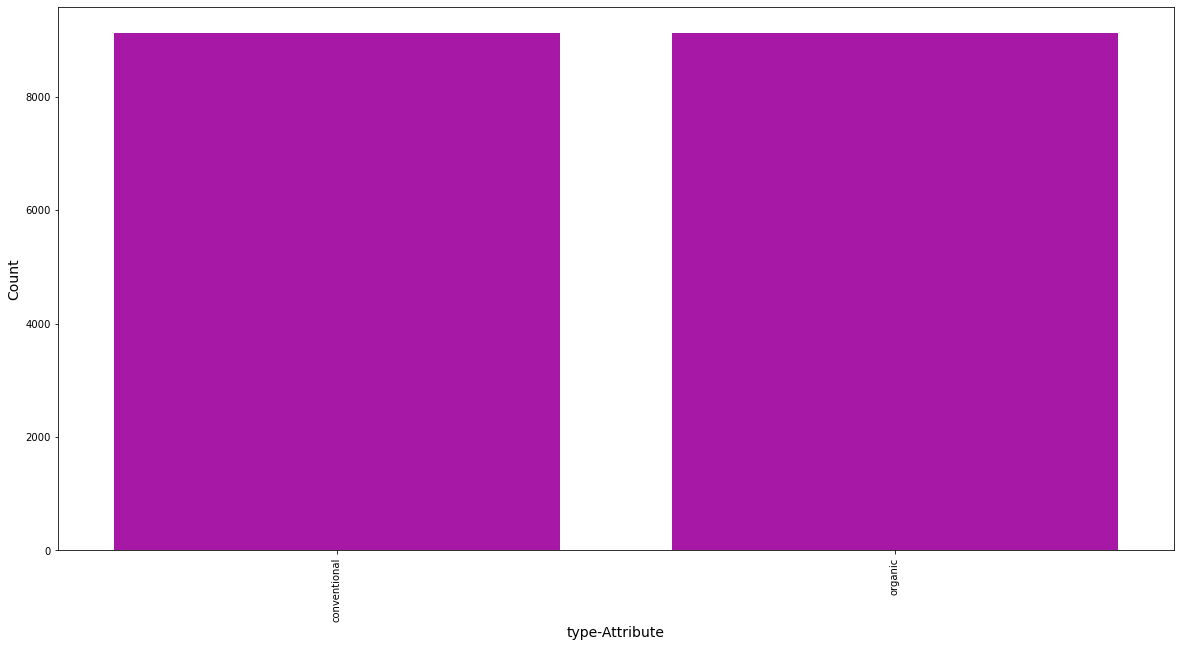



This is the Countplot diagram for--- year
AxesSubplot(0.125,0.125;0.775x0.755)


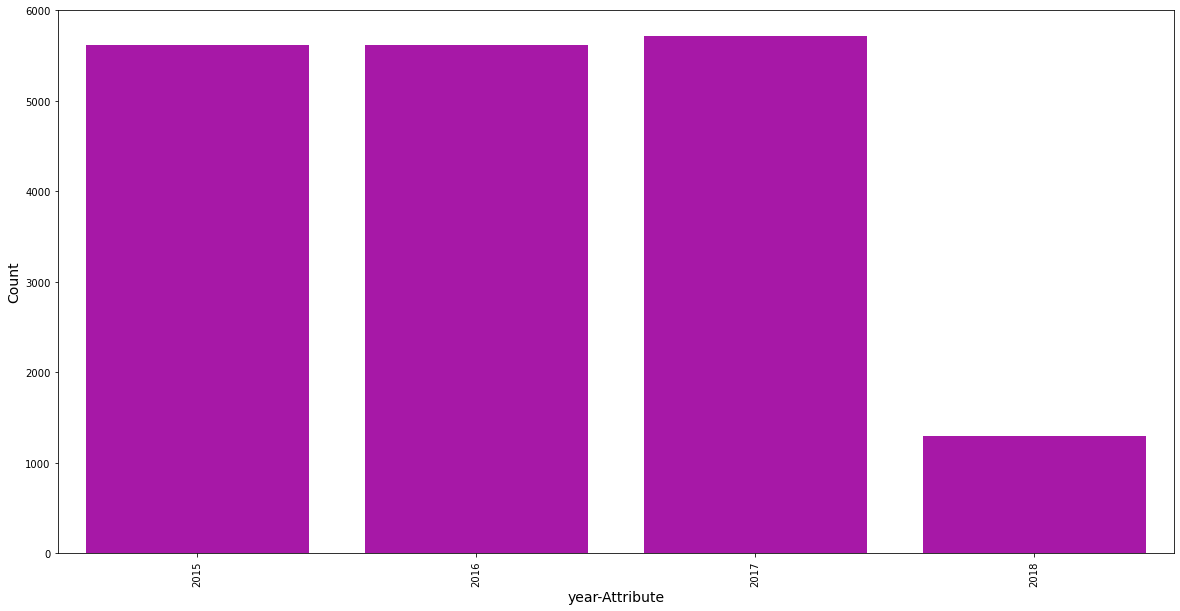



This is the Countplot diagram for--- region
AxesSubplot(0.125,0.125;0.775x0.755)


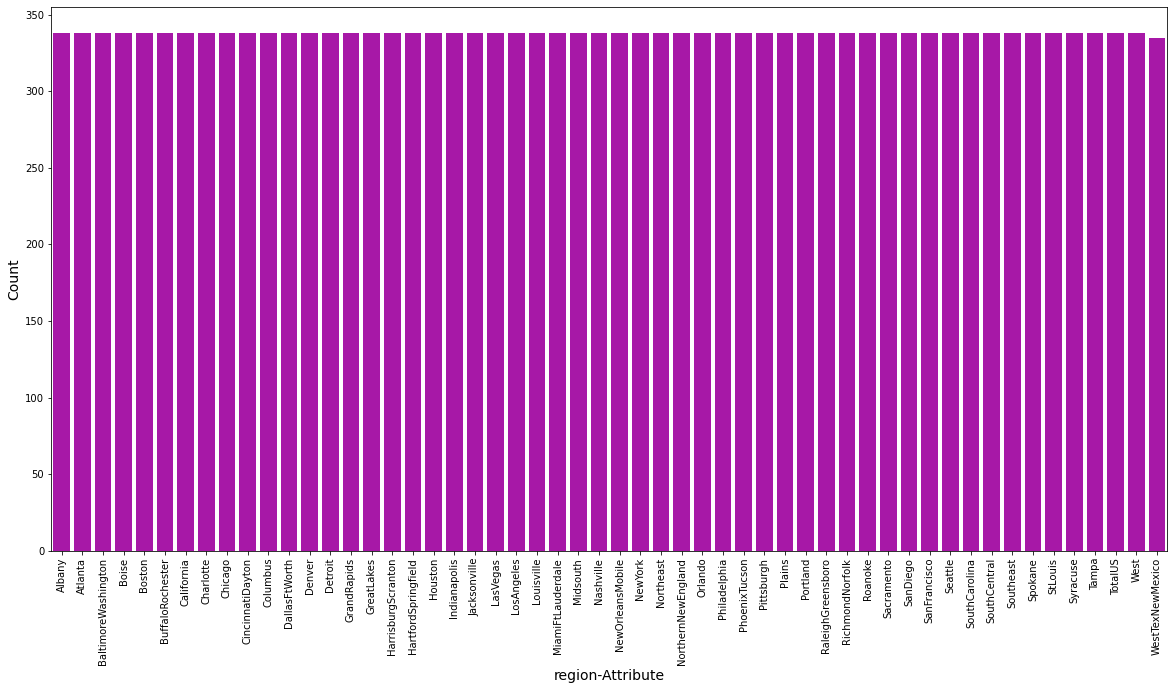

In [64]:
l=['type','year','region']
for i in l:
    plt.figure(figsize=(20,10))
    print(f'This is the Countplot diagram for--- {i}')
    print(sns.countplot(df[i],color='m'))
    plt.xlabel(f'{i}-Attribute',fontsize=14)
    plt.ylabel('Count',fontsize=14)
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### This plot basically do the comparision of their counts with respect to given attributes.
1.Attribute Type classes has equal distribution of data

2.Year 2017 has more data distributed as comapre to other years

3.Almost every regions are equally distribted in terms of numbers

### 2.Histogram

This is the Histogram diagram for--- type
AxesSubplot(0.125,0.125;0.775x0.755)


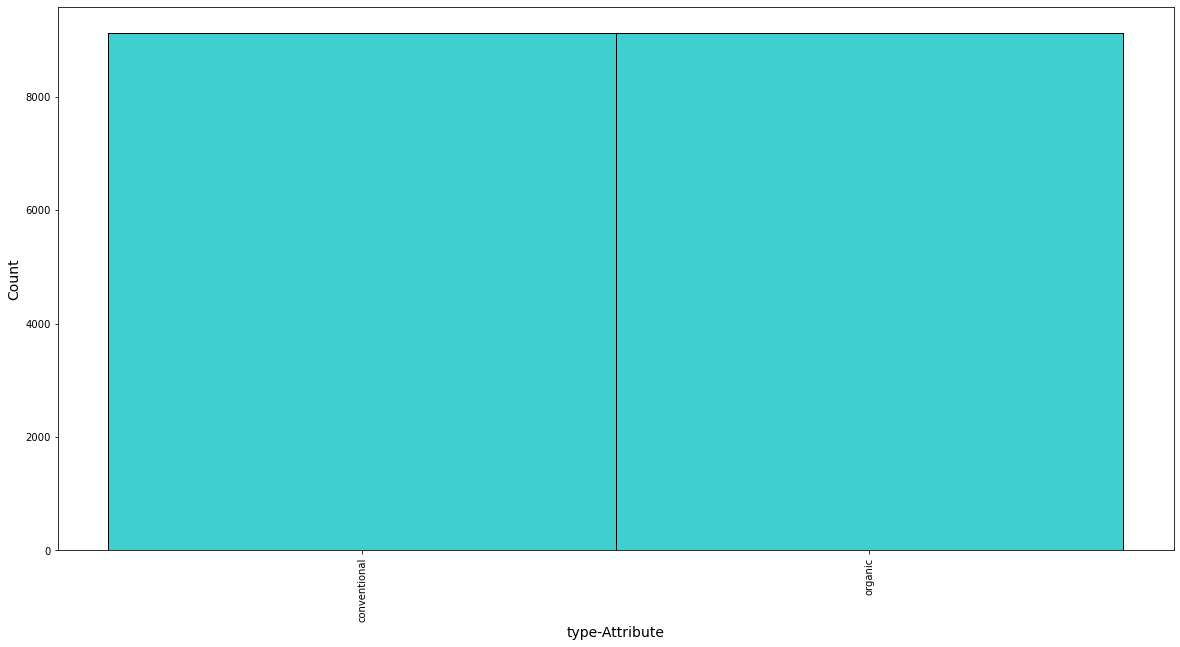



This is the Histogram diagram for--- year
AxesSubplot(0.125,0.125;0.775x0.755)


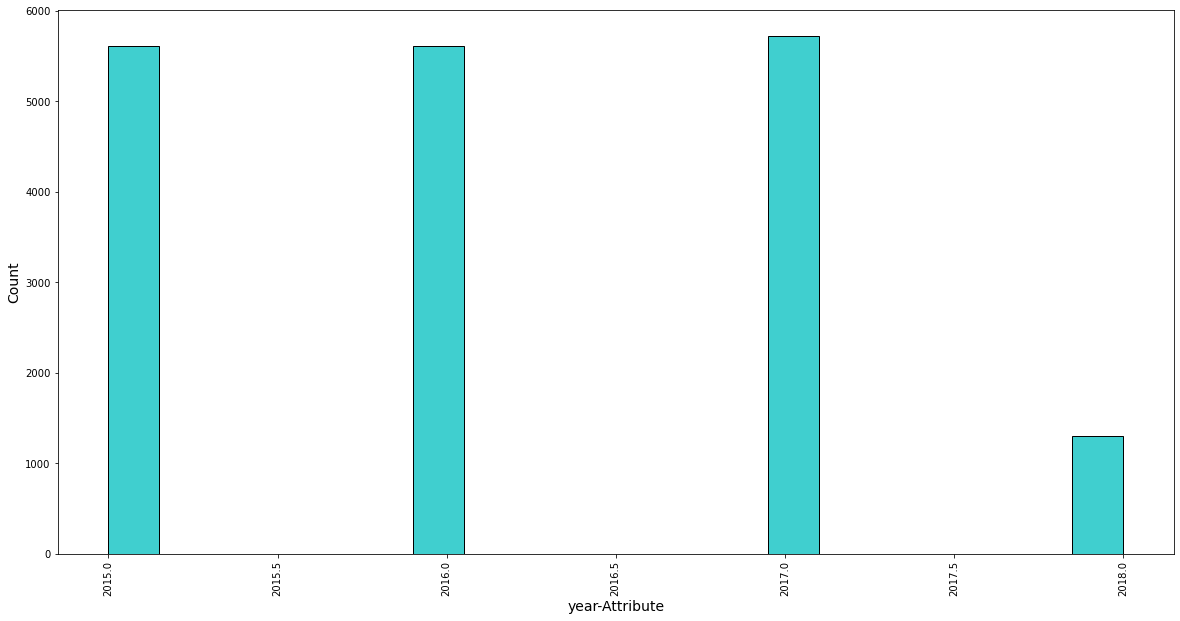



This is the Histogram diagram for--- region
AxesSubplot(0.125,0.125;0.775x0.755)


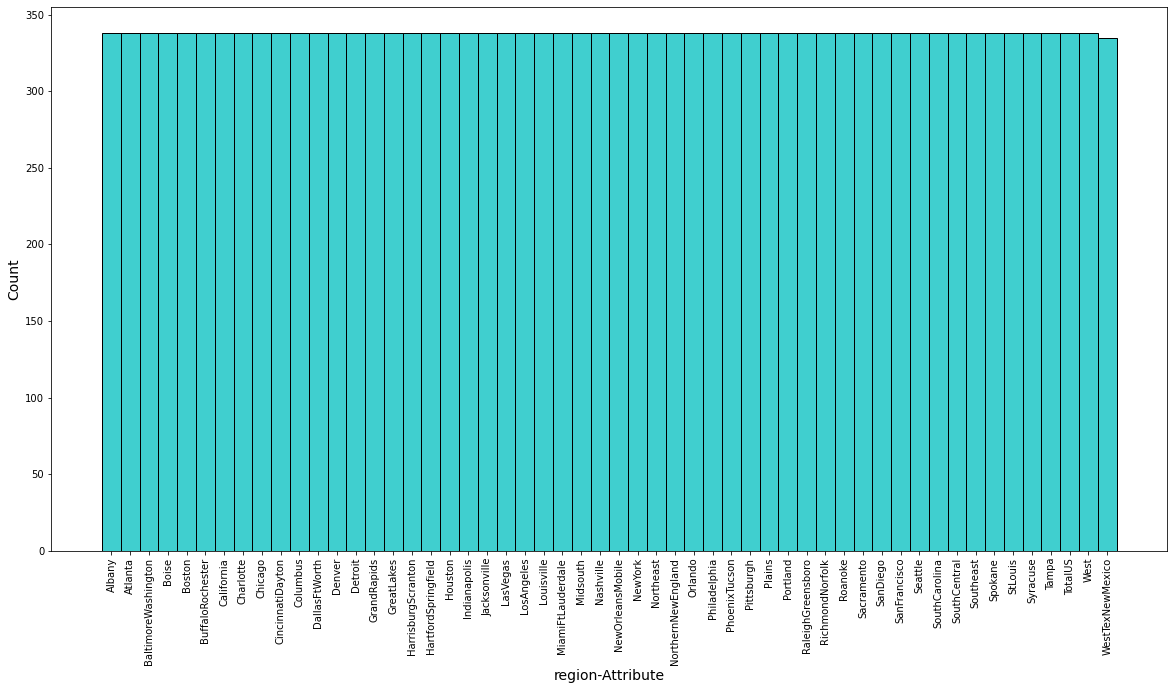

In [65]:
l=['type','year','region']
for i in l:
    plt.figure(figsize=(20,10))
    print(f'This is the Histogram diagram for--- {i}')
    print(sns.histplot(df[i],color='c'))
    plt.xlabel(f'{i}-Attribute',fontsize=14)
    plt.ylabel('Count',fontsize=14)    
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Explanation is same as above Countplot

### 3.Violinplot

This is the Violinplot diagram for--- AveragePrice
AxesSubplot(0.125,0.125;0.775x0.755)


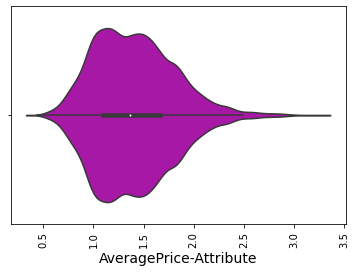



This is the Violinplot diagram for--- Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


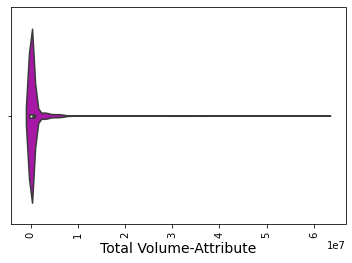



This is the Violinplot diagram for--- 4046
AxesSubplot(0.125,0.125;0.775x0.755)


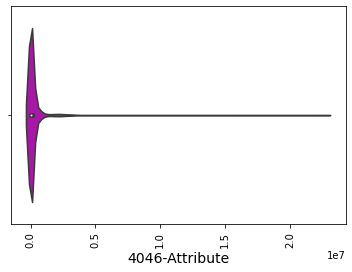



This is the Violinplot diagram for--- 4225
AxesSubplot(0.125,0.125;0.775x0.755)


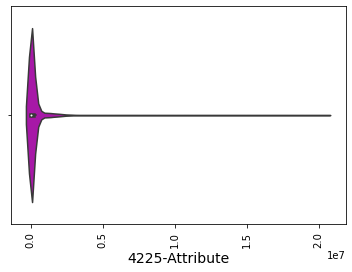



This is the Violinplot diagram for--- 4770
AxesSubplot(0.125,0.125;0.775x0.755)


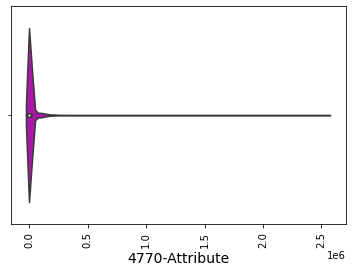



This is the Violinplot diagram for--- Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


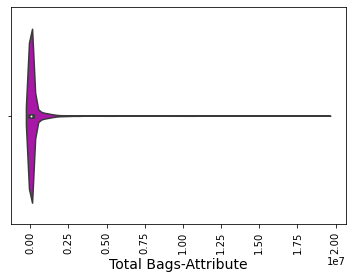



This is the Violinplot diagram for--- Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


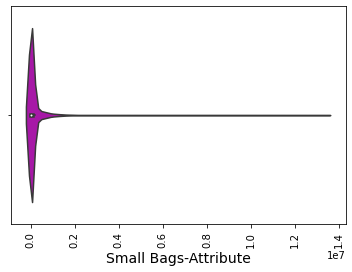



This is the Violinplot diagram for--- Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


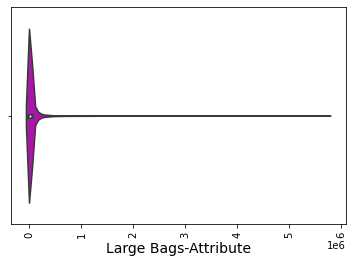



This is the Violinplot diagram for--- XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


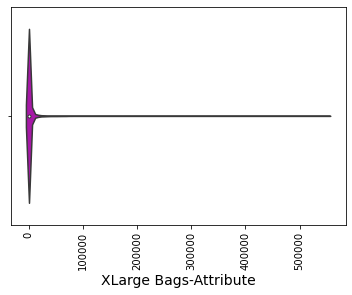



This is the Violinplot diagram for--- year
AxesSubplot(0.125,0.125;0.775x0.755)


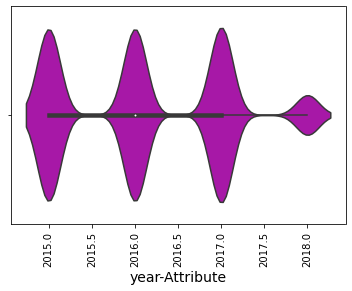

In [68]:
l=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is the Violinplot diagram for--- {i}')
    print(sns.violinplot(df[i],color='m'))
    plt.xlabel(f'{i}-Attribute',fontsize=14)
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### We can plot Violinplot diagram only for numeric columns as it doesn't support Categorical Columns.
The value range for the average price is mostly in b/w 1-1.5

Distribution of data w.r.t. year is less in  year 2018 as compare to other years

Also,in most of the numeric columns lots of zeros are present,which i will be replacing with mean after encoding step.

### 4.Scatterplot

This is a Scatterplot diagram b/w attributes- AveragePrice & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


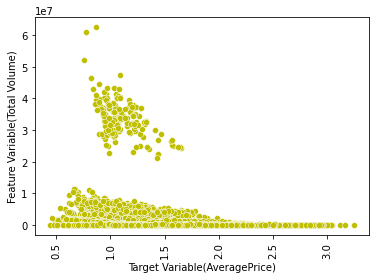



This is a Scatterplot diagram b/w attributes- AveragePrice & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


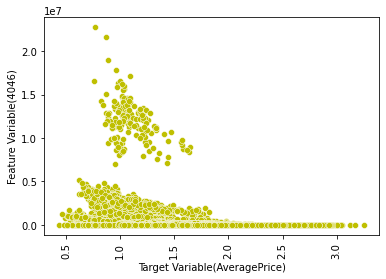



This is a Scatterplot diagram b/w attributes- AveragePrice & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


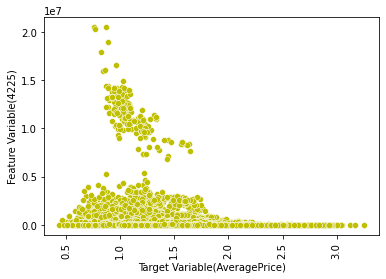



This is a Scatterplot diagram b/w attributes- AveragePrice & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


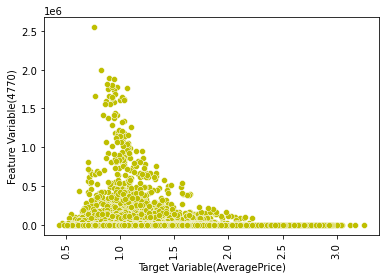



This is a Scatterplot diagram b/w attributes- AveragePrice & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


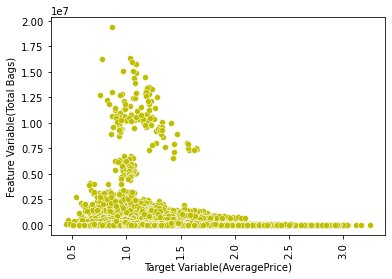



This is a Scatterplot diagram b/w attributes- AveragePrice & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


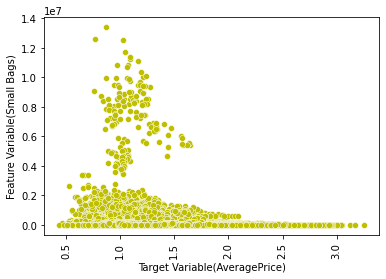



This is a Scatterplot diagram b/w attributes- AveragePrice & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


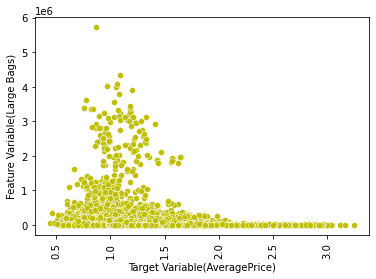



This is a Scatterplot diagram b/w attributes- AveragePrice & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


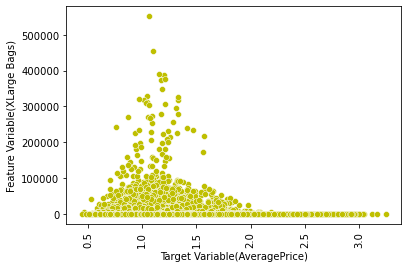



This is a Scatterplot diagram b/w attributes- AveragePrice & year
AxesSubplot(0.125,0.125;0.775x0.755)


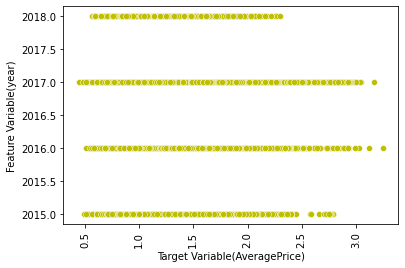

In [71]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is a Scatterplot diagram b/w attributes- AveragePrice & {i}')
    print(sns.scatterplot(x=df.AveragePrice,y=df[i],color='y'))
    plt.xlabel('Target Variable(AveragePrice)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Average Price is almost equally distribued w.r.t. years column. And in most of the above cases we're not able to make proper strong relation b/w feature and target variable

### 5.Lineplot

This is a Lineplot diagram b/w attributes- AveragePrice & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


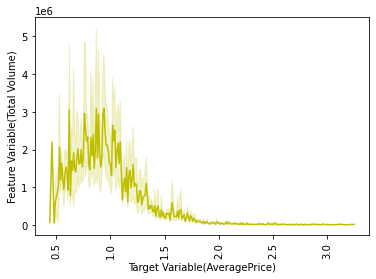



This is a Lineplot diagram b/w attributes- AveragePrice & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


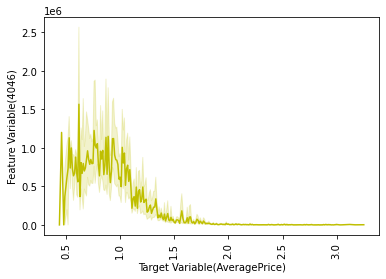



This is a Lineplot diagram b/w attributes- AveragePrice & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


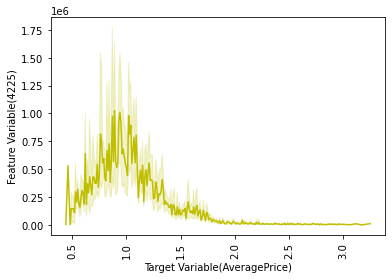



This is a Lineplot diagram b/w attributes- AveragePrice & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


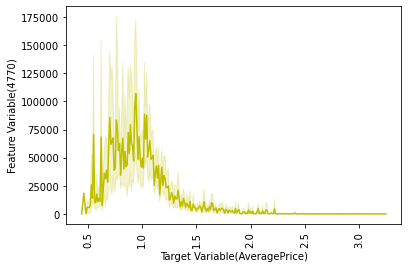



This is a Lineplot diagram b/w attributes- AveragePrice & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


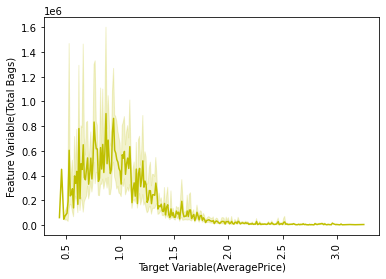



This is a Lineplot diagram b/w attributes- AveragePrice & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


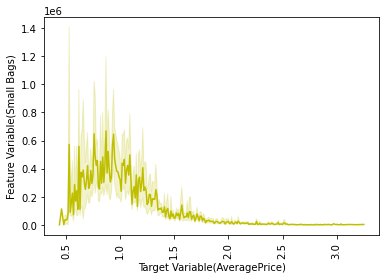



This is a Lineplot diagram b/w attributes- AveragePrice & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


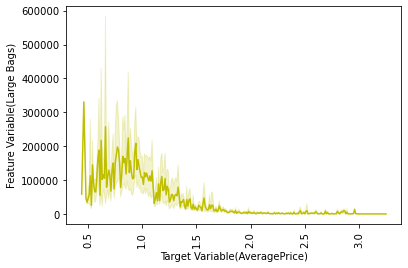



This is a Lineplot diagram b/w attributes- AveragePrice & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


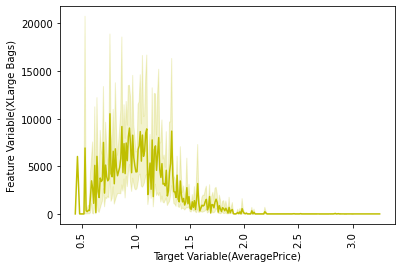



This is a Lineplot diagram b/w attributes- AveragePrice & year
AxesSubplot(0.125,0.125;0.775x0.755)


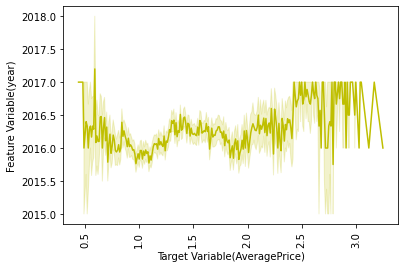

In [72]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is a Lineplot diagram b/w attributes- AveragePrice & {i}')
    print(sns.lineplot(x=df.AveragePrice,y=df[i],color='y'))
    plt.xlabel('Target Variable(AveragePrice)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

##### In most of the cases except attribute Year the Target variable is heavily distributed in the range b/w 0.5 to 1.5

### 6. Relational Plot

This is a Relational diagram b/w attributes- AveragePrice & Total Volume


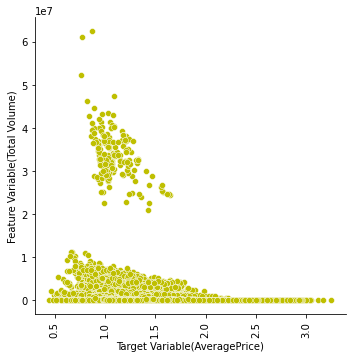



This is a Relational diagram b/w attributes- AveragePrice & 4046


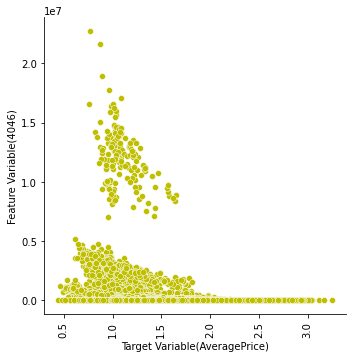



This is a Relational diagram b/w attributes- AveragePrice & 4225


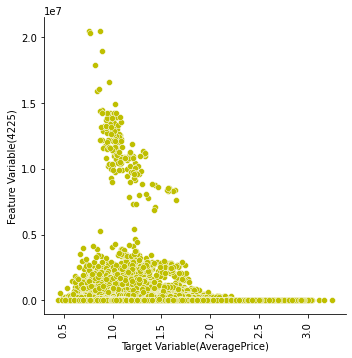



This is a Relational diagram b/w attributes- AveragePrice & 4770


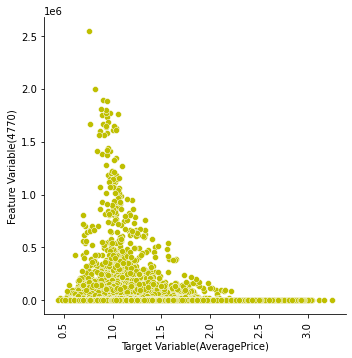



This is a Relational diagram b/w attributes- AveragePrice & Total Bags


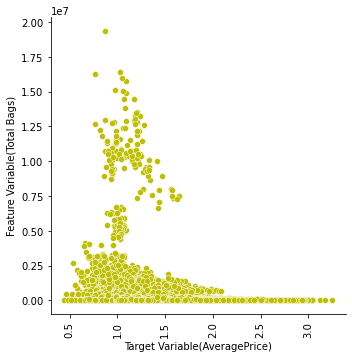



This is a Relational diagram b/w attributes- AveragePrice & Small Bags


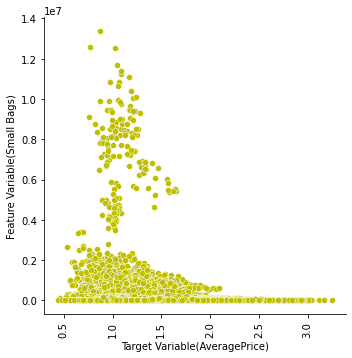



This is a Relational diagram b/w attributes- AveragePrice & Large Bags


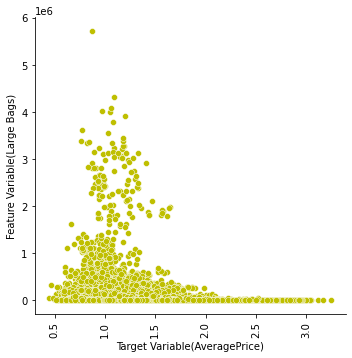



This is a Relational diagram b/w attributes- AveragePrice & XLarge Bags


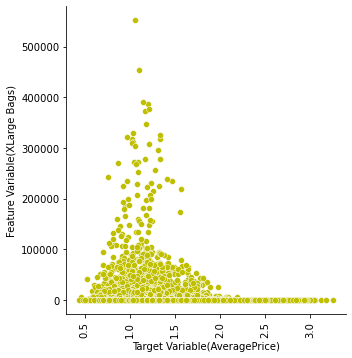



This is a Relational diagram b/w attributes- AveragePrice & year


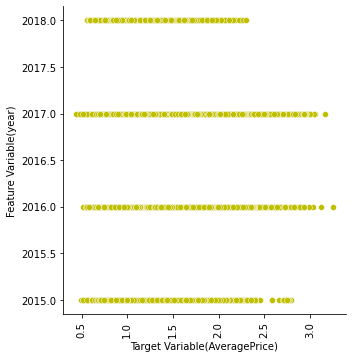

In [73]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is a Relational diagram b/w attributes- AveragePrice & {i}')
    print(sns.relplot(x=df.AveragePrice,y=df[i],color='y'))
    plt.xlabel('Target Variable(AveragePrice)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Explanation is same as above plot

### 7.Stripplot

This is a Stripplot diagram b/w attributes- AveragePrice & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


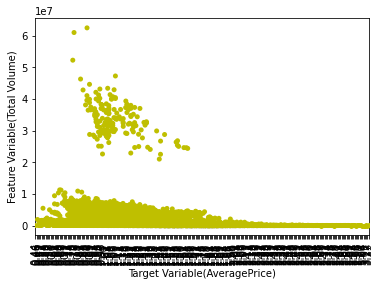



This is a Stripplot diagram b/w attributes- AveragePrice & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


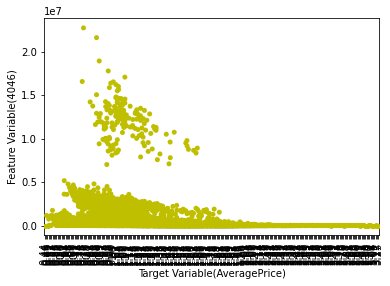



This is a Stripplot diagram b/w attributes- AveragePrice & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


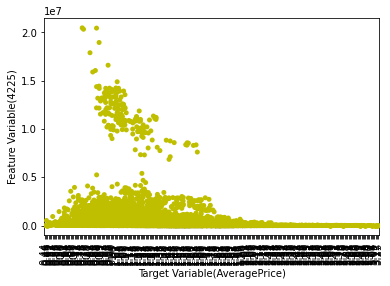



This is a Stripplot diagram b/w attributes- AveragePrice & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


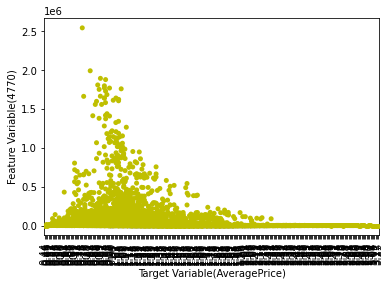



This is a Stripplot diagram b/w attributes- AveragePrice & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


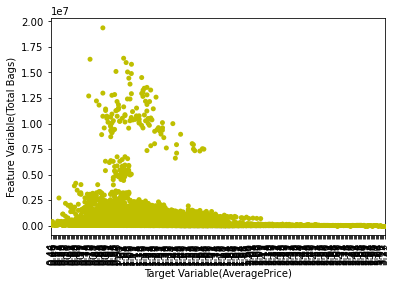



This is a Stripplot diagram b/w attributes- AveragePrice & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


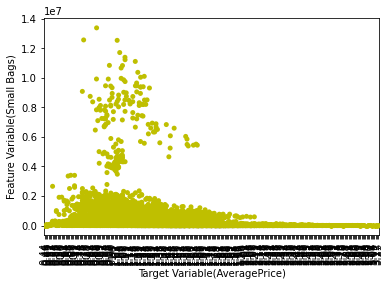



This is a Stripplot diagram b/w attributes- AveragePrice & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


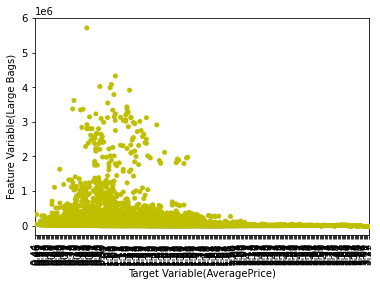



This is a Stripplot diagram b/w attributes- AveragePrice & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


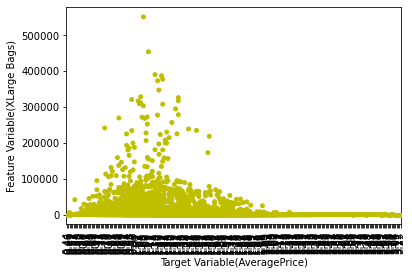



This is a Stripplot diagram b/w attributes- AveragePrice & year
AxesSubplot(0.125,0.125;0.775x0.755)


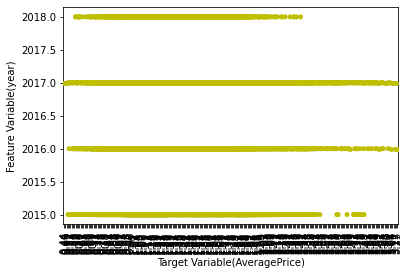

In [74]:
l=['Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','year']
for i in l:
    print(f'This is a Stripplot diagram b/w attributes- AveragePrice & {i}')
    print(sns.stripplot(x=df.AveragePrice,y=df[i],color='y'))
    plt.xlabel('Target Variable(AveragePrice)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

same as above

### 8.Categorical Plot
##### Categorical Columns = Type,Region

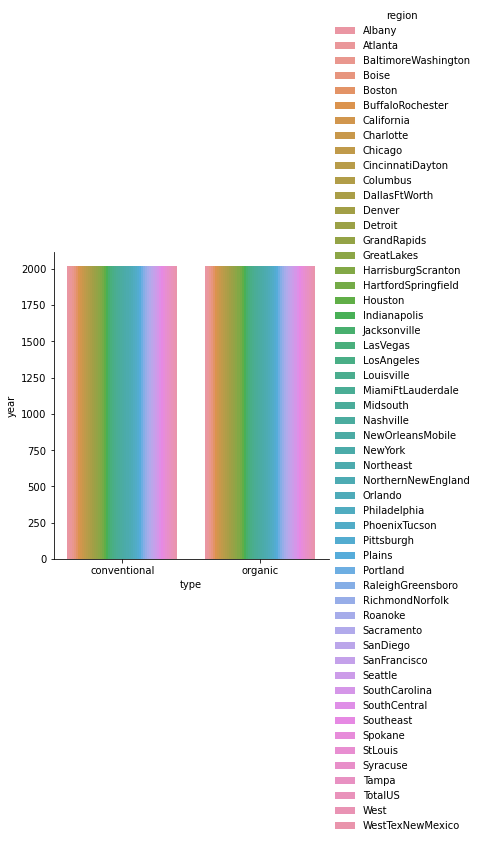

In [79]:
sns.catplot(x='type',y='year',hue='region',kind='bar',data=df)

This shows that for all 53 regions the distribution of data for both the class of type are equal.

#### Below is the diagram of Scatterplot,Lineplot and stripplot when x-axis= Region and y-axis are containing all other variables other than Region

This is a Scatterplot diagram b/w attributes- region & AveragePrice
AxesSubplot(0.125,0.125;0.775x0.755)


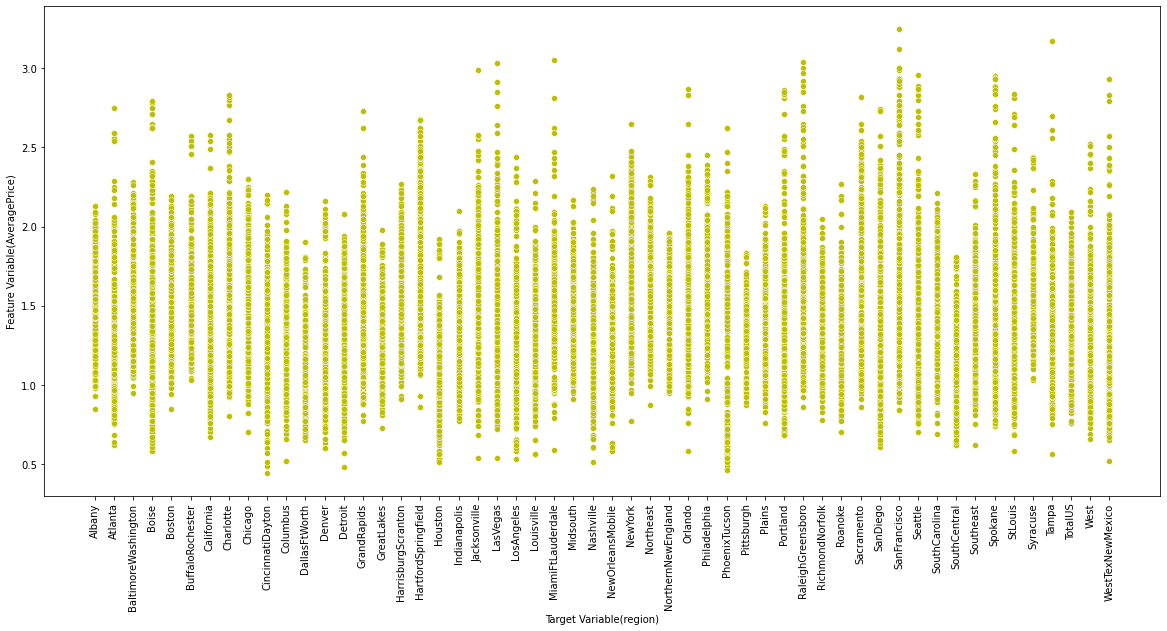



This is a Scatterplot diagram b/w attributes- region & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


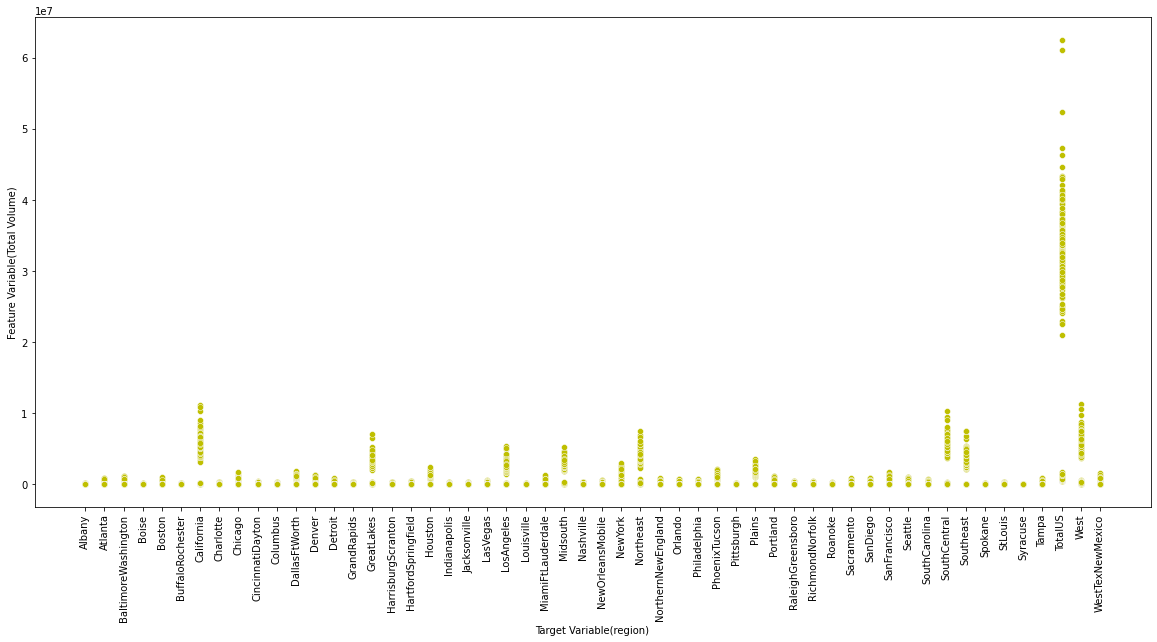



This is a Scatterplot diagram b/w attributes- region & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


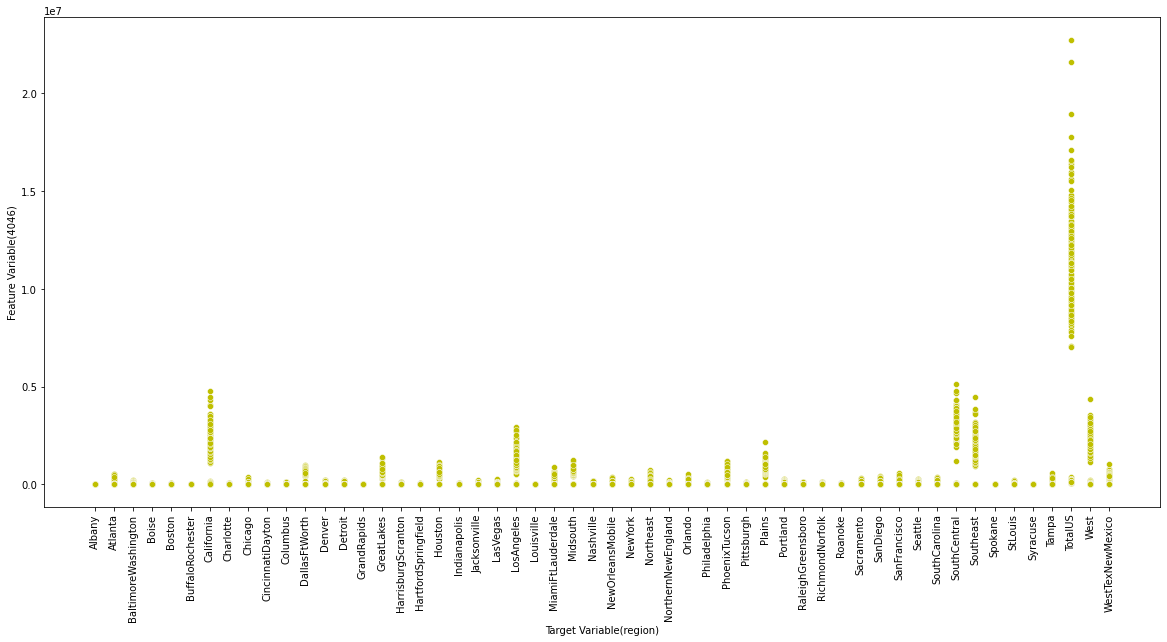



This is a Scatterplot diagram b/w attributes- region & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


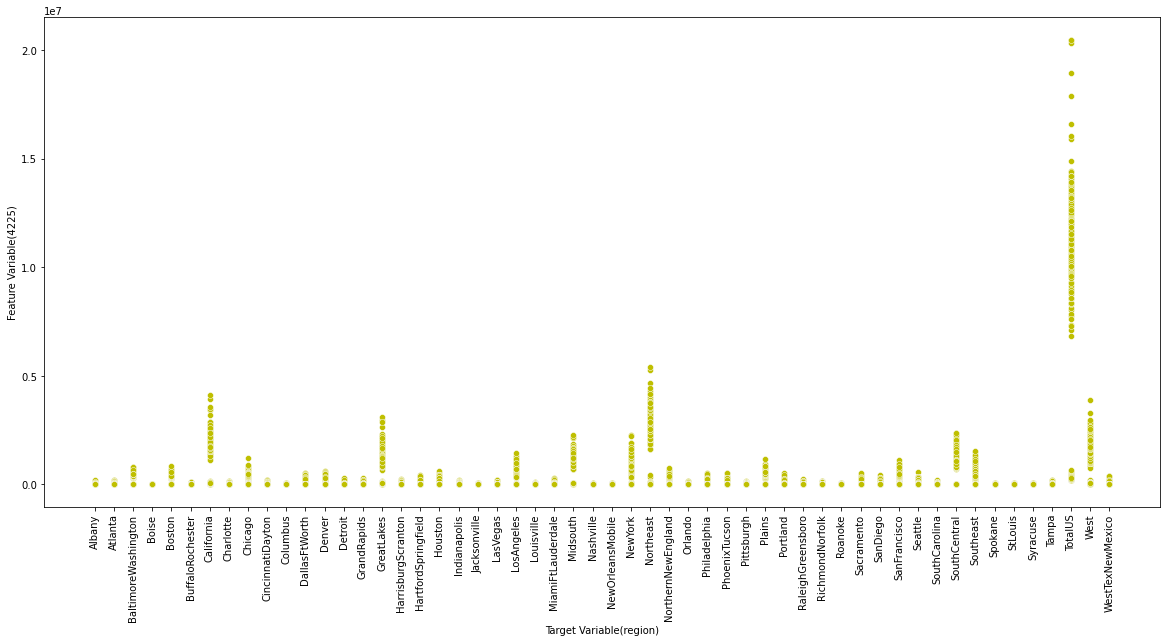



This is a Scatterplot diagram b/w attributes- region & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


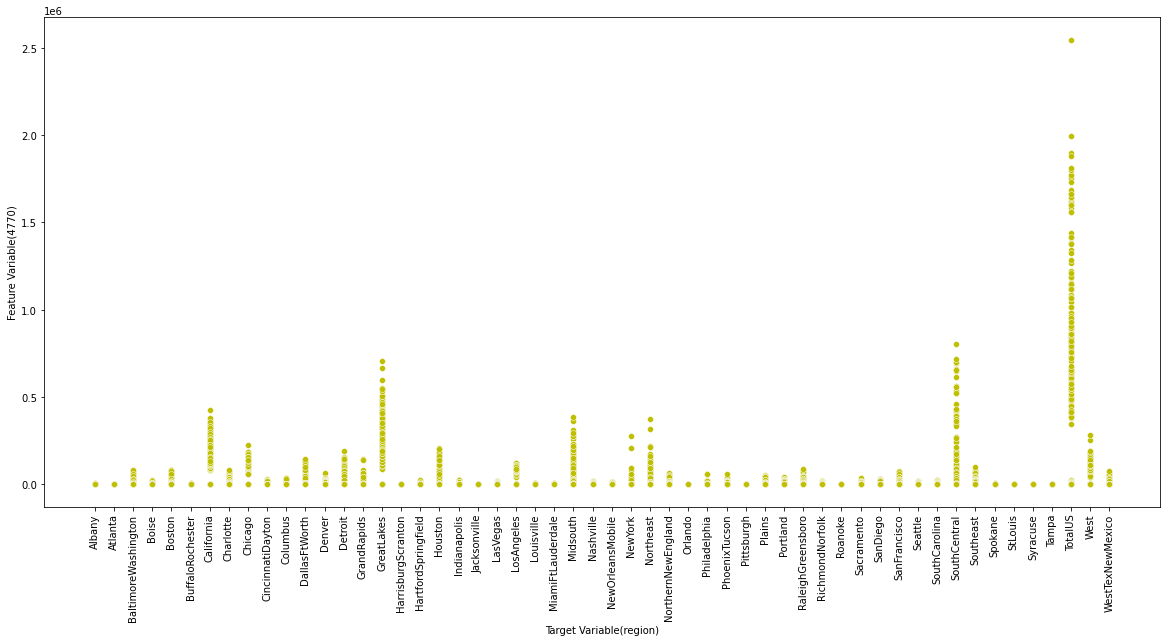



This is a Scatterplot diagram b/w attributes- region & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


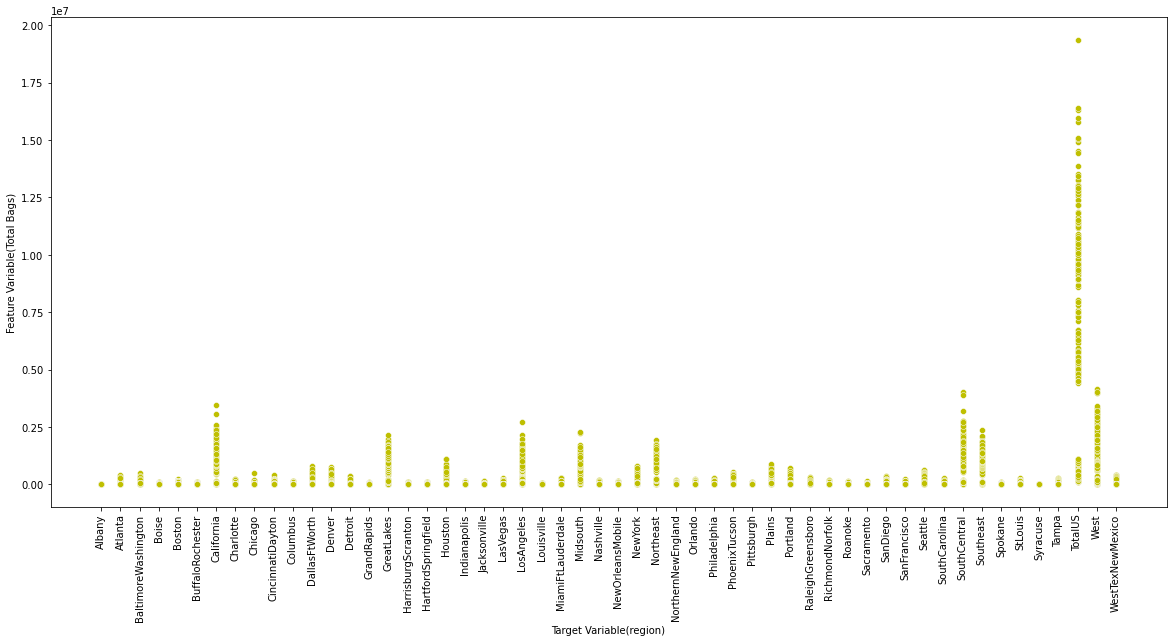



This is a Scatterplot diagram b/w attributes- region & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


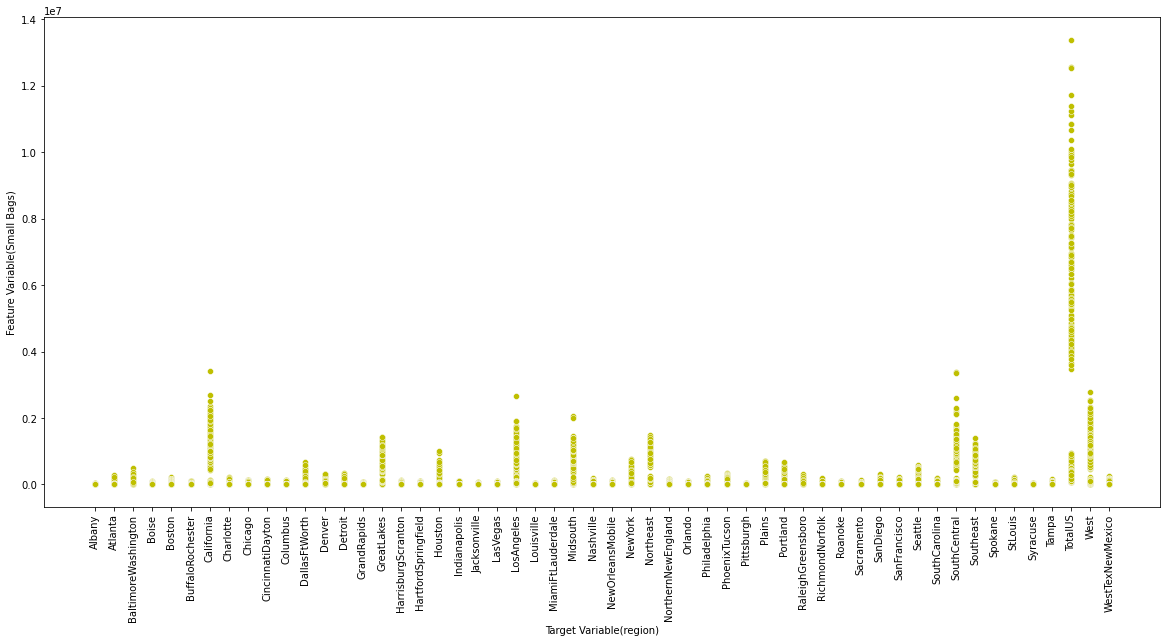



This is a Scatterplot diagram b/w attributes- region & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


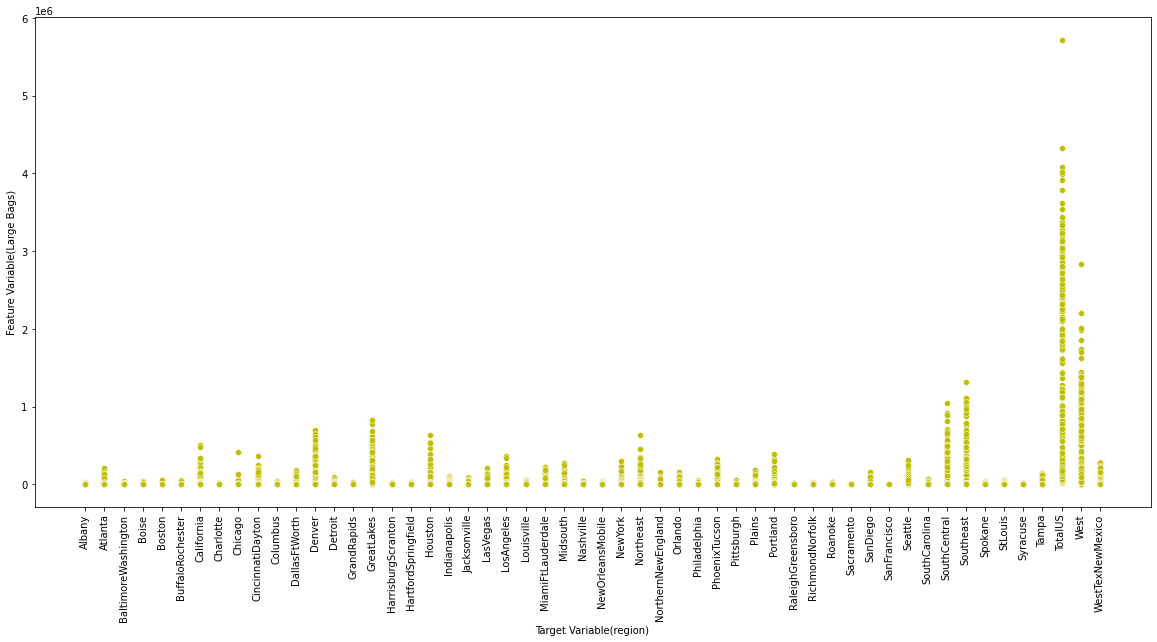



This is a Scatterplot diagram b/w attributes- region & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


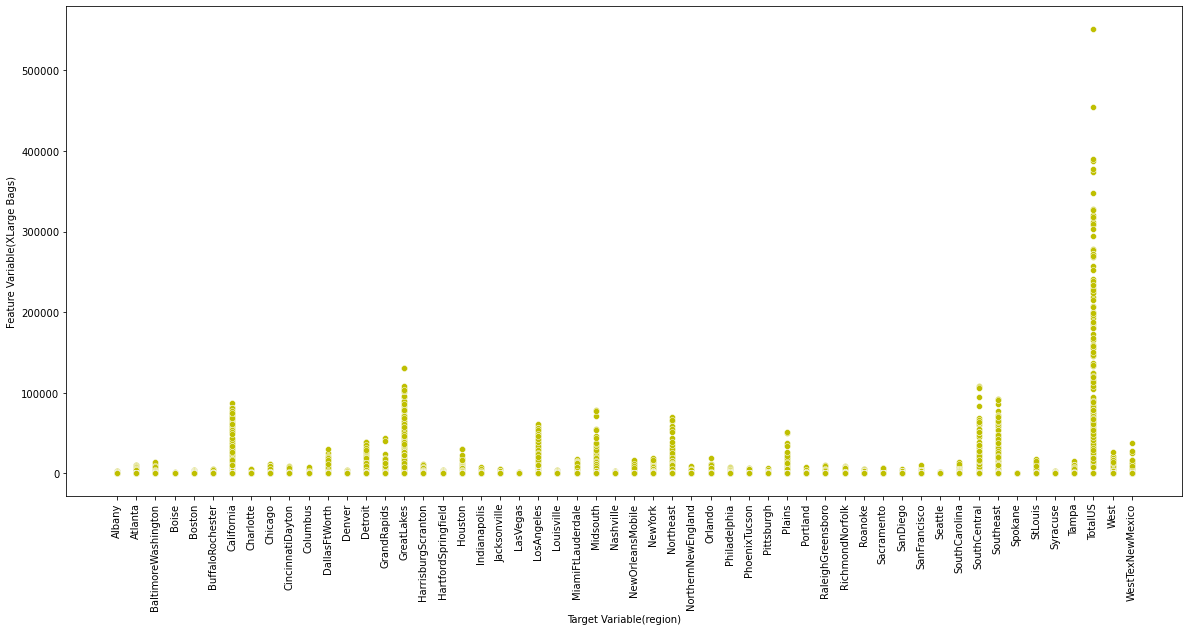



This is a Scatterplot diagram b/w attributes- region & type
AxesSubplot(0.125,0.125;0.775x0.755)


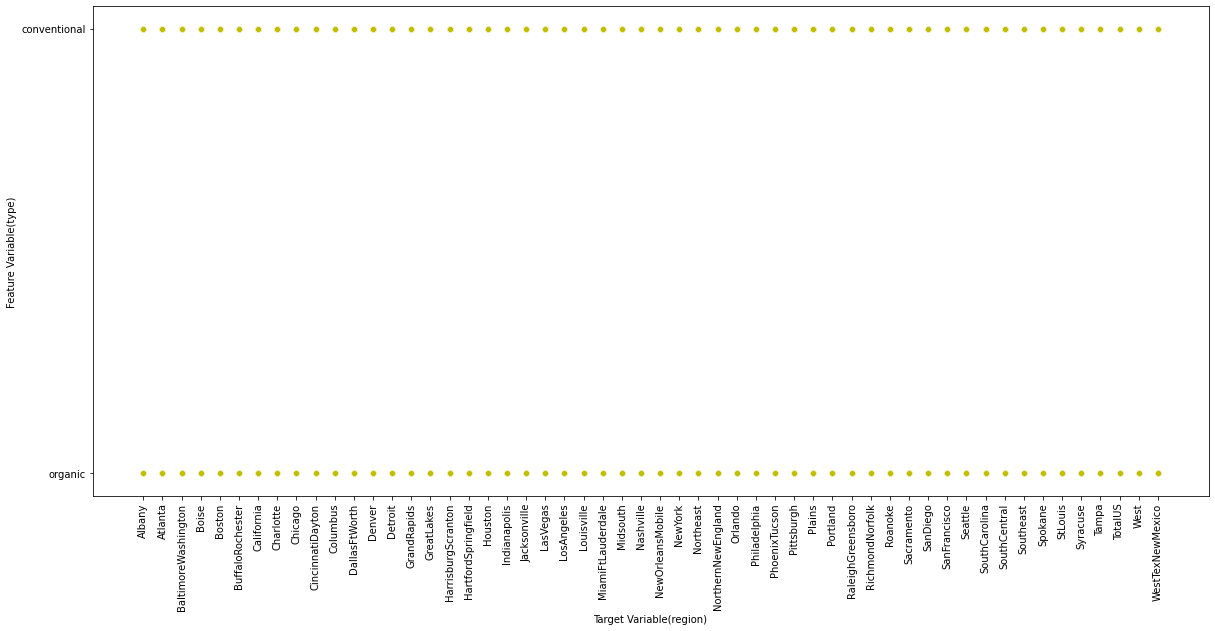



This is a Scatterplot diagram b/w attributes- region & year
AxesSubplot(0.125,0.125;0.775x0.755)


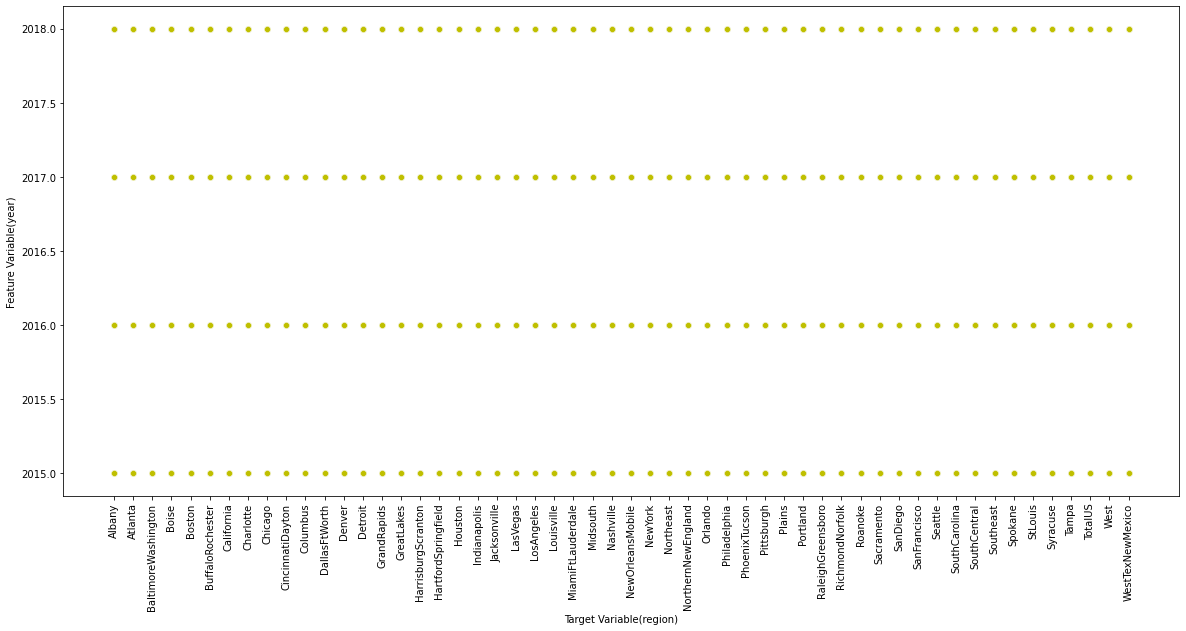

In [8]:
l=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year']
for i in l:
    plt.figure(figsize=(20,9))
    print(f'This is a Scatterplot diagram b/w attributes- region & {i}')
    print(sns.scatterplot(x=df.region,y=df[i],color='y'))
    plt.xlabel('Target Variable(region)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### There are equal distribution of data in region w.r.t. type & year

#### Region TotalUS have most number of data distribution as comapre to other region w.r.t. almost all other feature variables

This is a Lineplot diagram b/w attributes- region & AveragePrice
AxesSubplot(0.125,0.125;0.775x0.755)


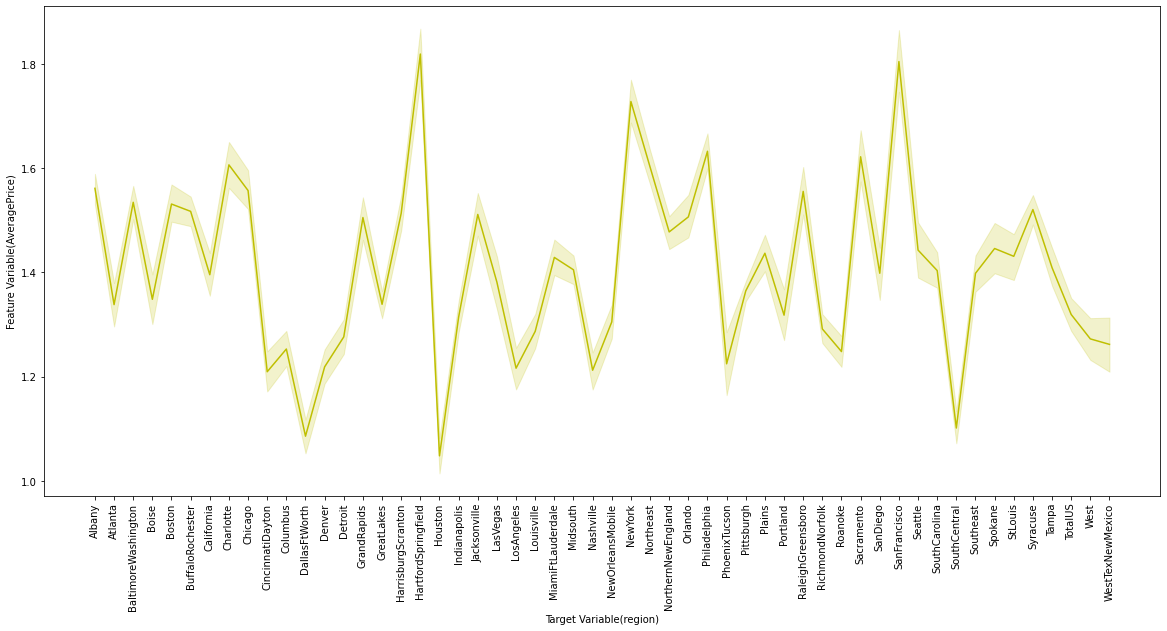



This is a Lineplot diagram b/w attributes- region & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


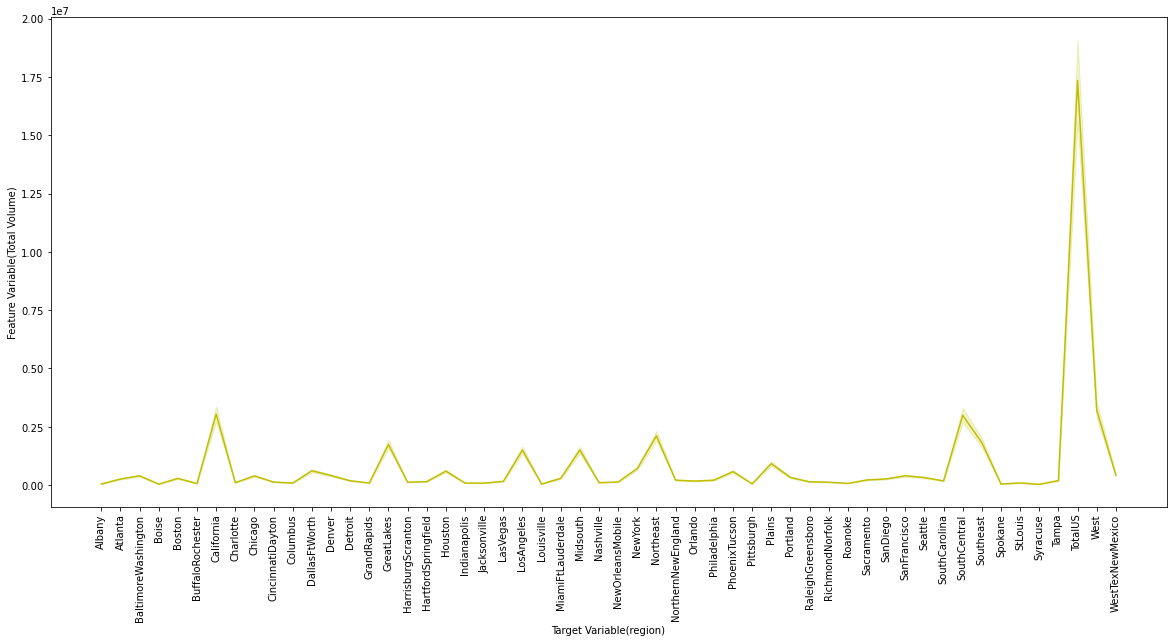



This is a Lineplot diagram b/w attributes- region & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


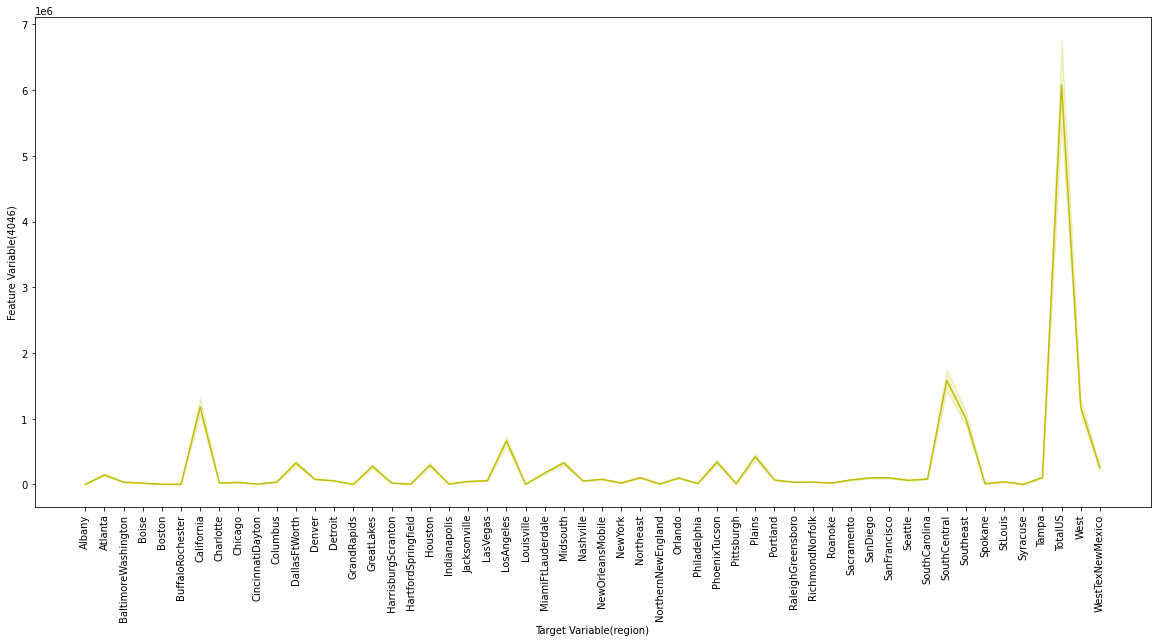



This is a Lineplot diagram b/w attributes- region & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


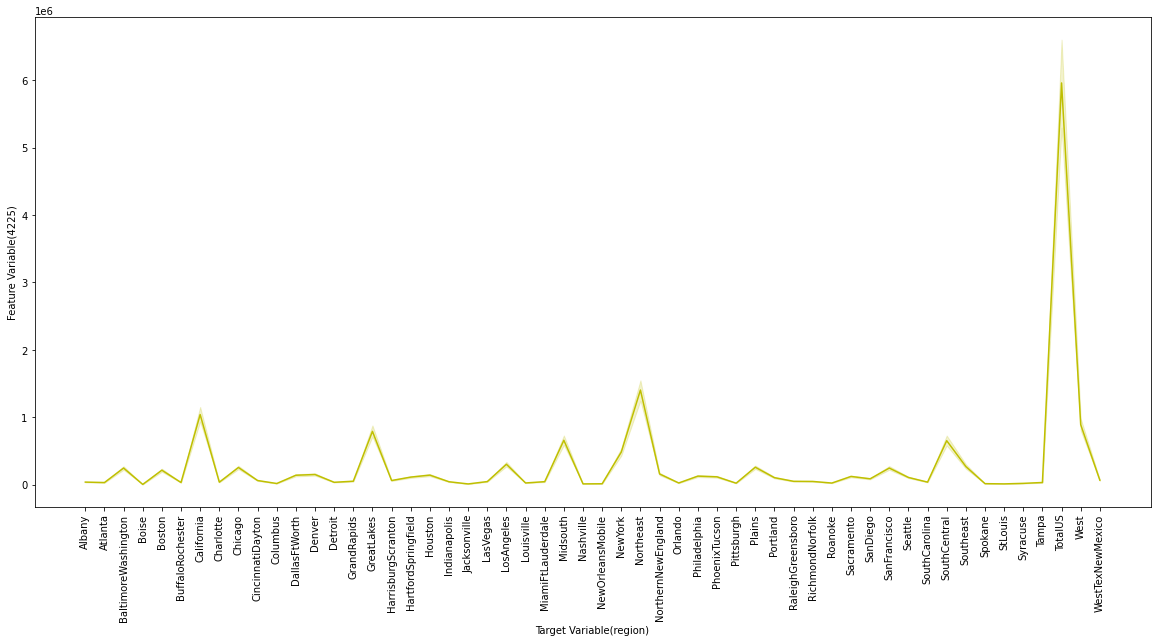



This is a Lineplot diagram b/w attributes- region & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


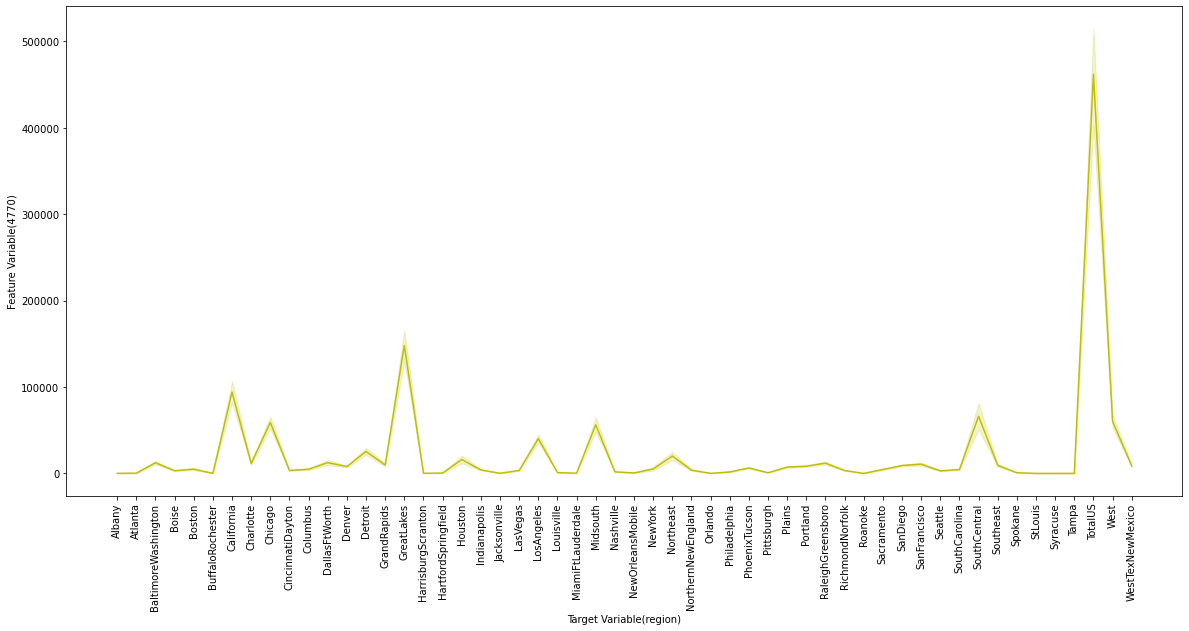



This is a Lineplot diagram b/w attributes- region & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


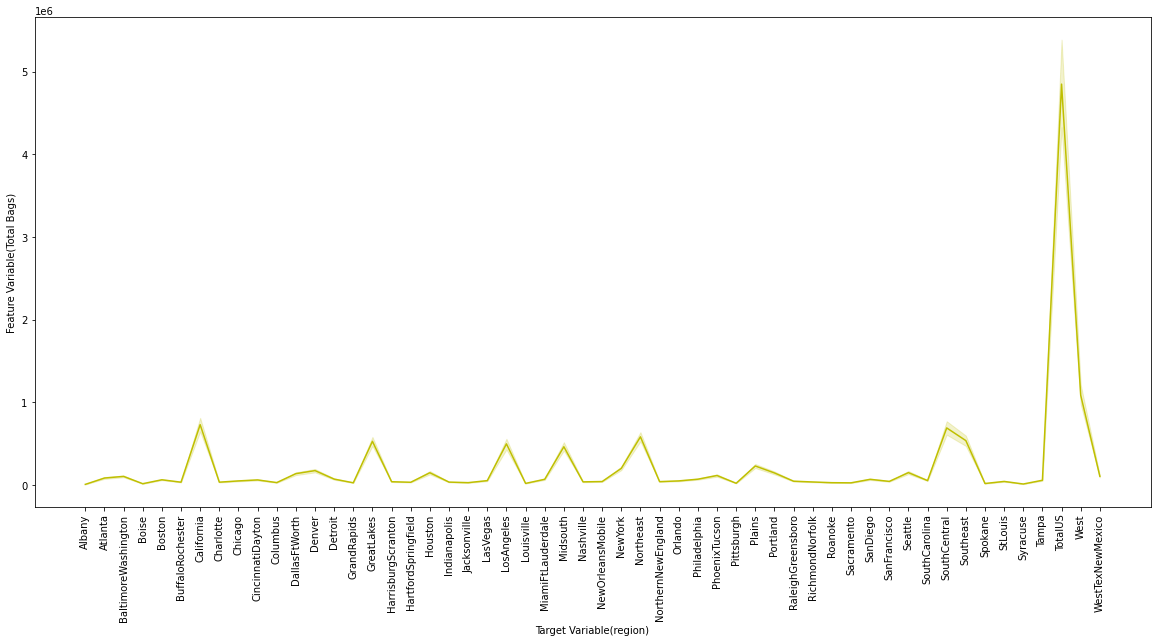



This is a Lineplot diagram b/w attributes- region & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


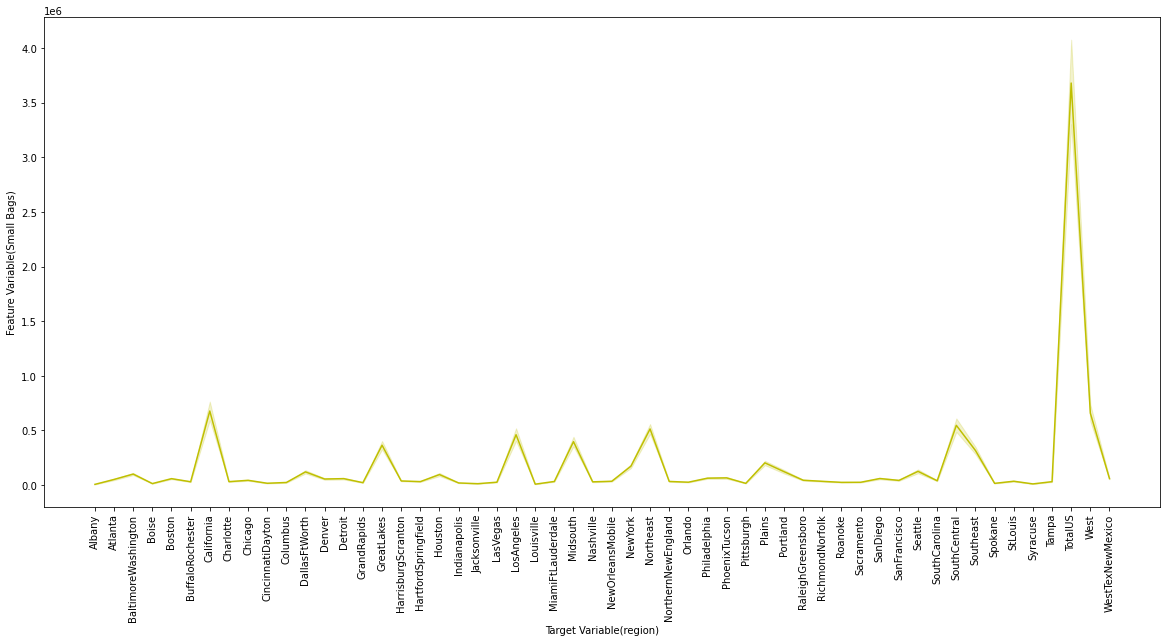



This is a Lineplot diagram b/w attributes- region & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


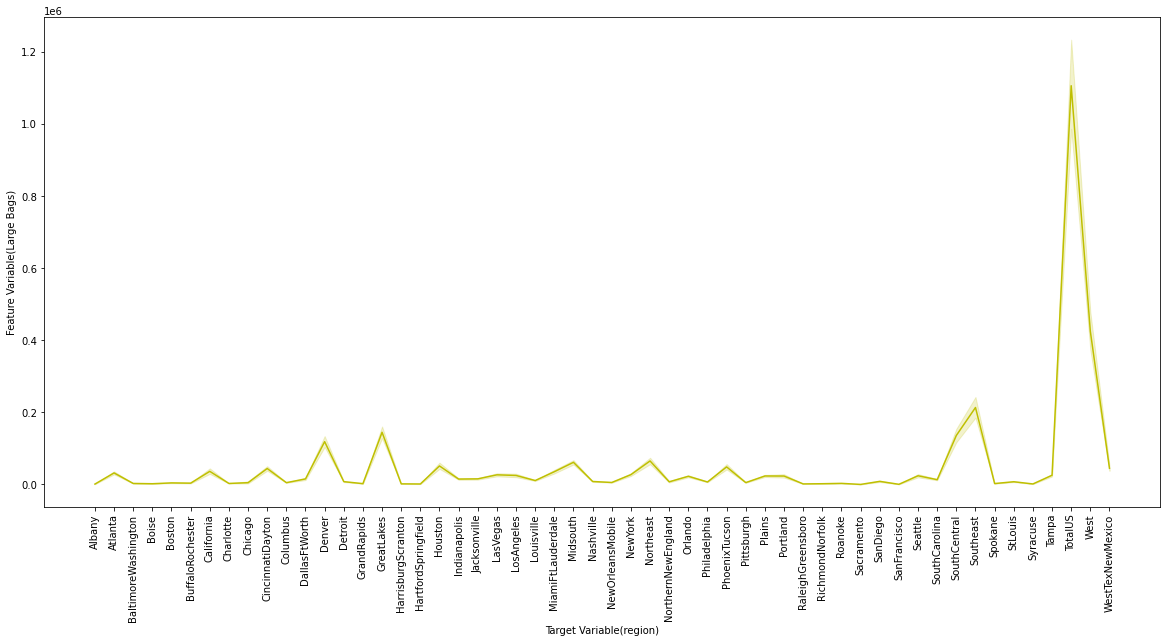



This is a Lineplot diagram b/w attributes- region & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


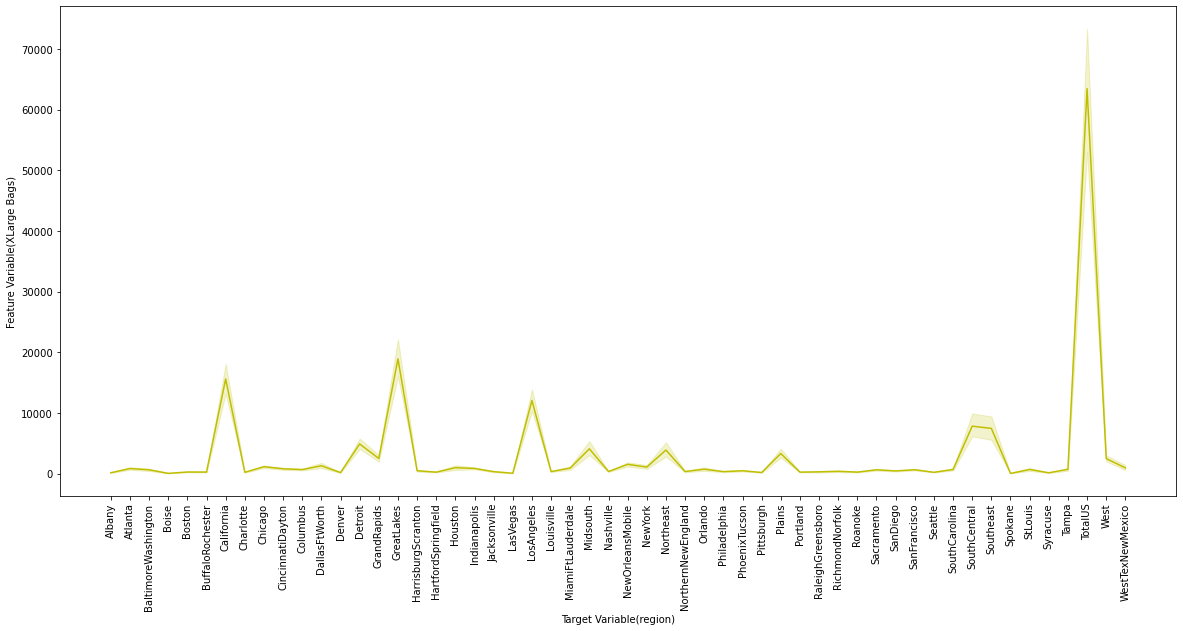



This is a Lineplot diagram b/w attributes- region & type
AxesSubplot(0.125,0.125;0.775x0.755)


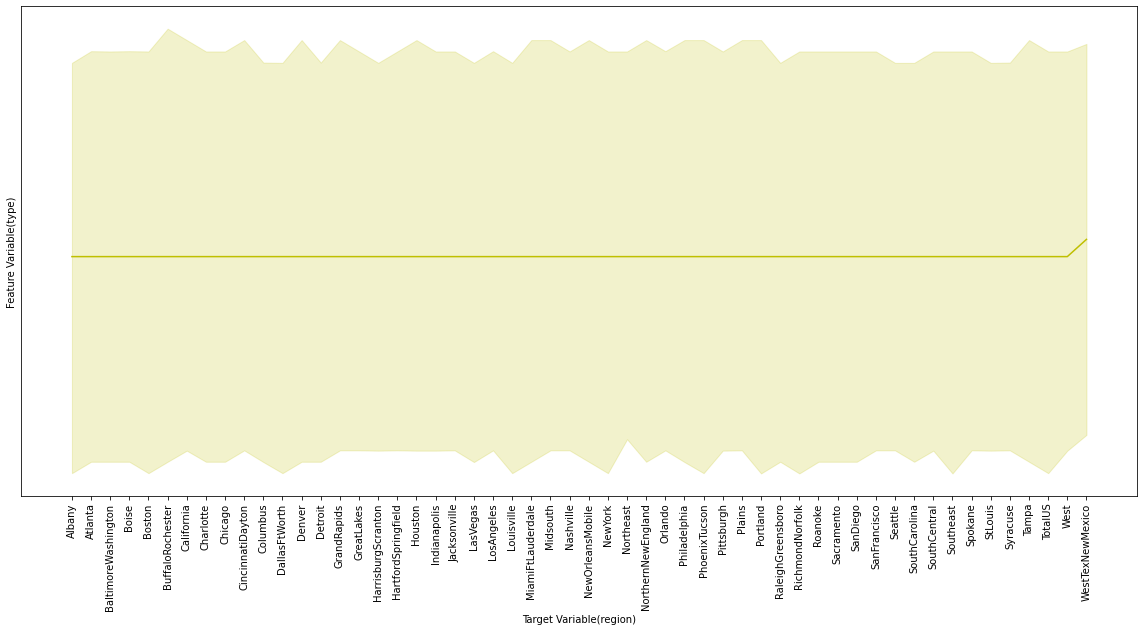



This is a Lineplot diagram b/w attributes- region & year
AxesSubplot(0.125,0.125;0.775x0.755)


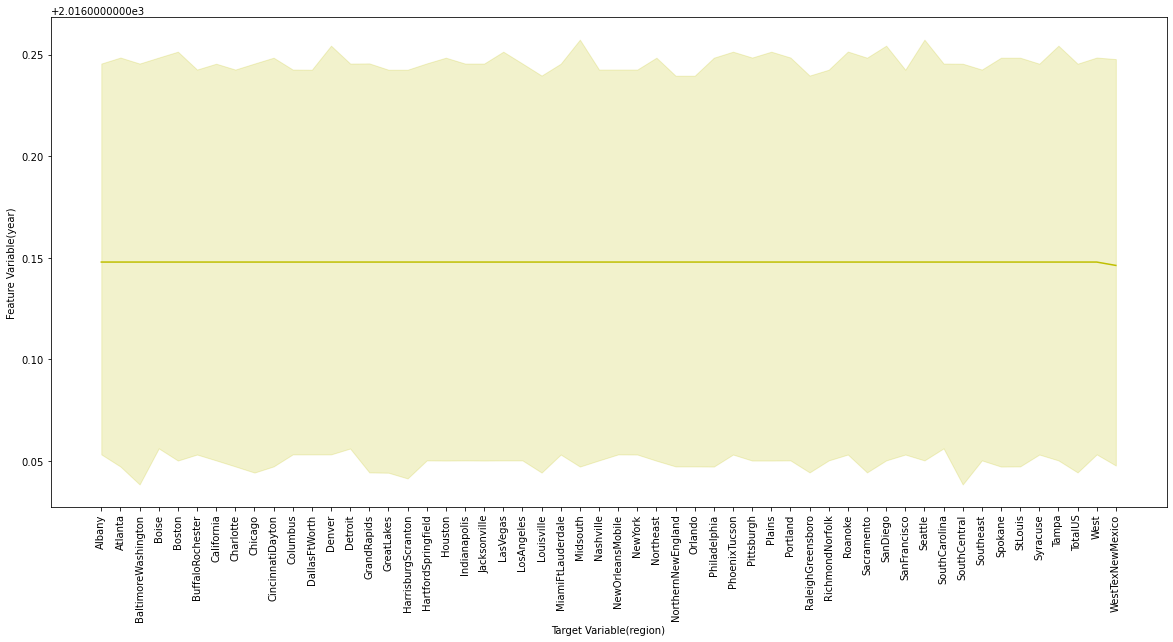

In [9]:
l=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year']
for i in l:
    plt.figure(figsize=(20,9))
    print(f'This is a Lineplot diagram b/w attributes- region & {i}')
    print(sns.lineplot(x=df.region,y=df[i],color='y'))
    plt.xlabel('Target Variable(region)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

Same as above

This is a Stripplot diagram b/w attributes- region & AveragePrice
AxesSubplot(0.125,0.125;0.775x0.755)


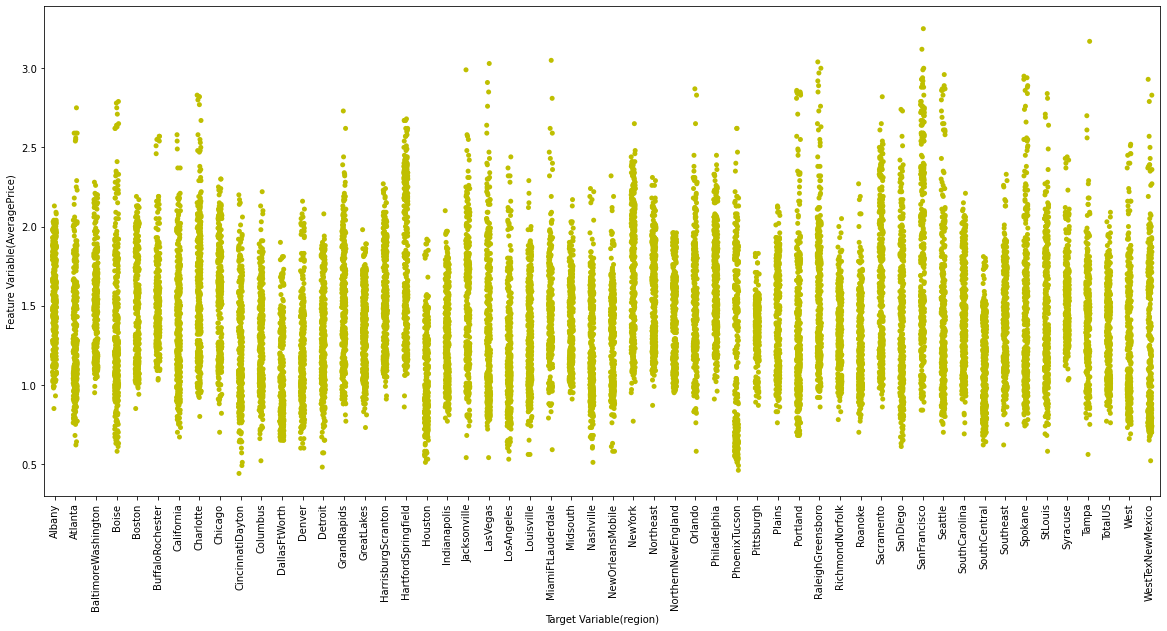



This is a Stripplot diagram b/w attributes- region & Total Volume
AxesSubplot(0.125,0.125;0.775x0.755)


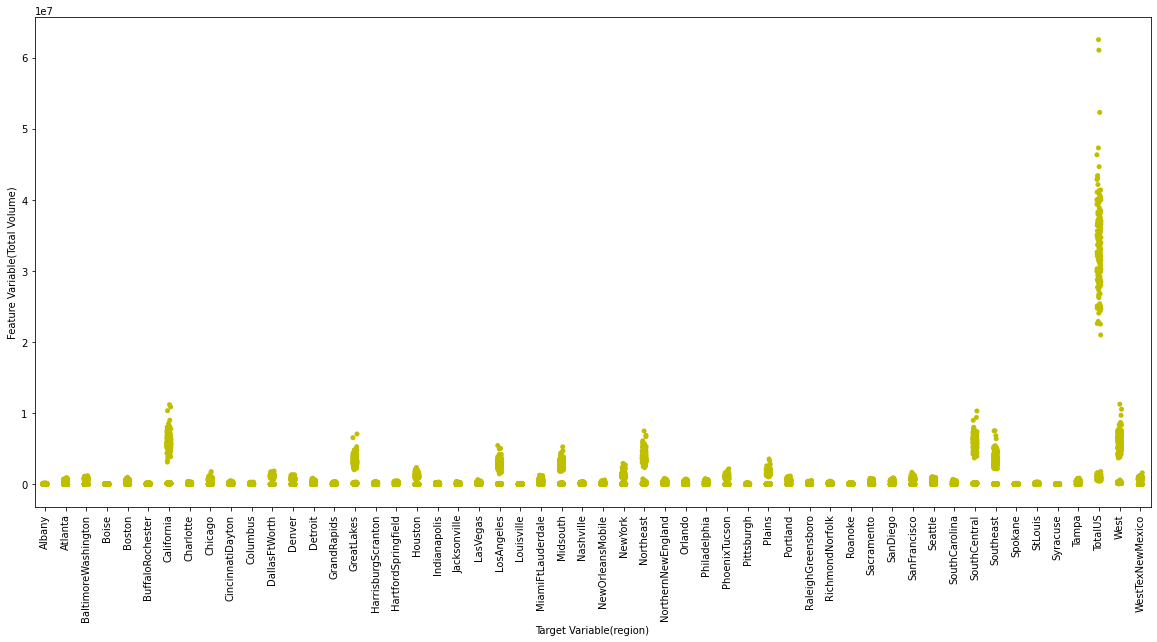



This is a Stripplot diagram b/w attributes- region & 4046
AxesSubplot(0.125,0.125;0.775x0.755)


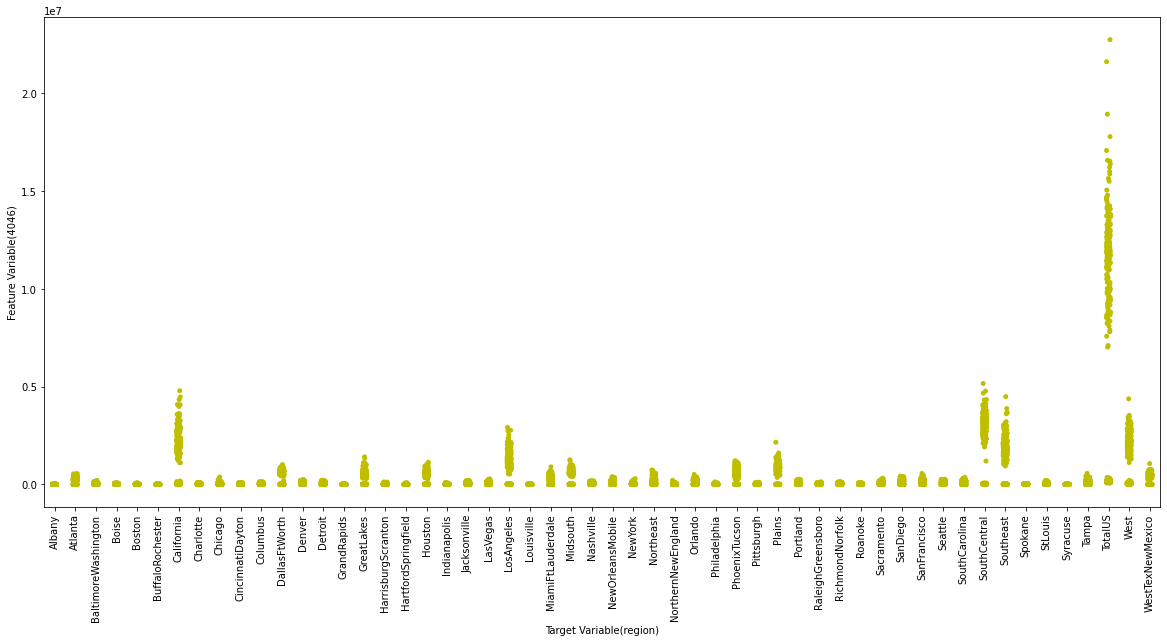



This is a Stripplot diagram b/w attributes- region & 4225
AxesSubplot(0.125,0.125;0.775x0.755)


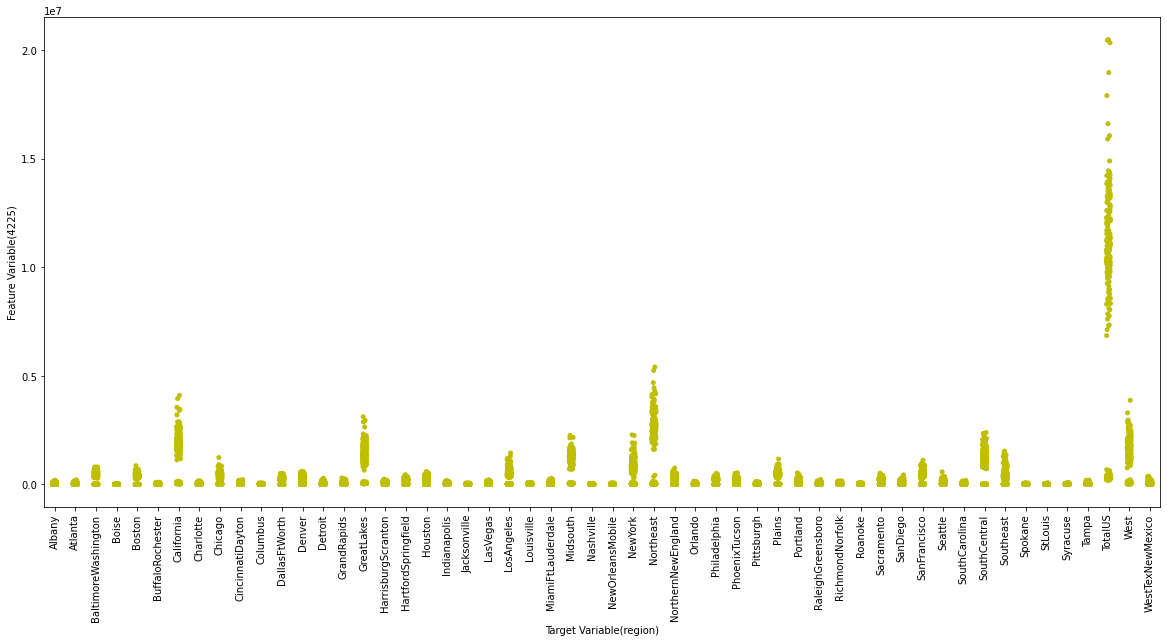



This is a Stripplot diagram b/w attributes- region & 4770
AxesSubplot(0.125,0.125;0.775x0.755)


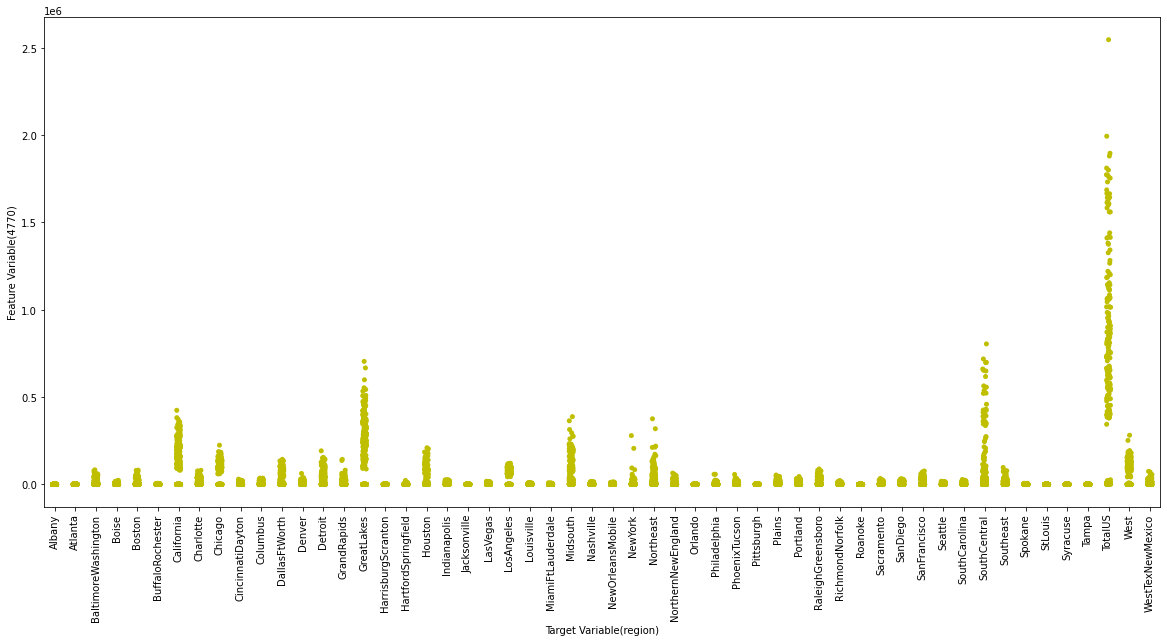



This is a Stripplot diagram b/w attributes- region & Total Bags
AxesSubplot(0.125,0.125;0.775x0.755)


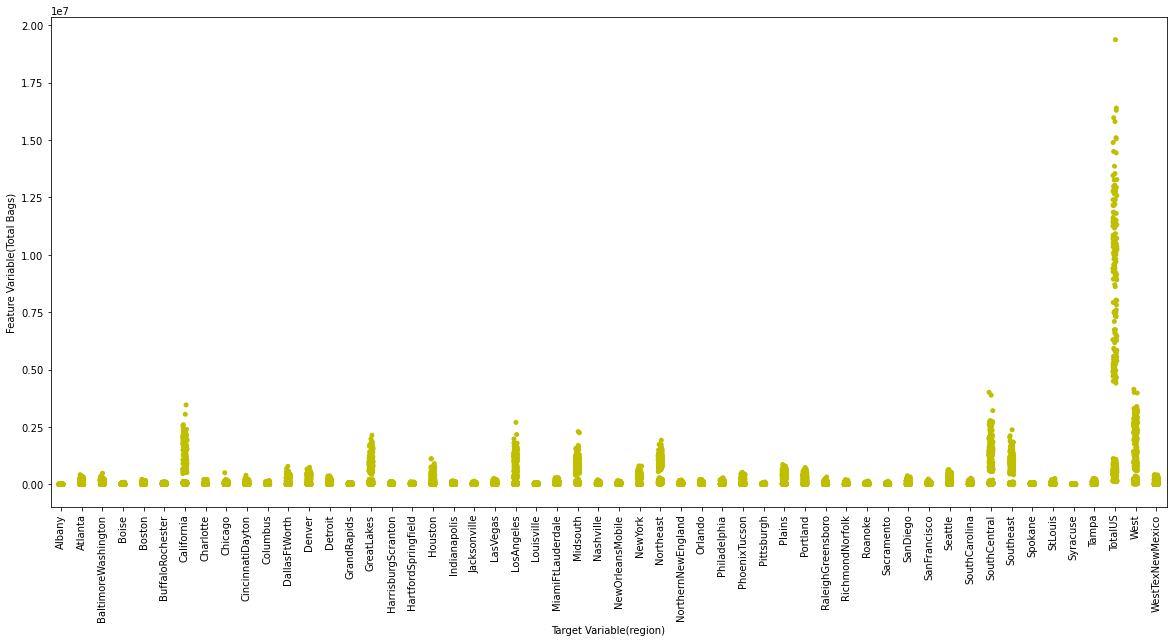



This is a Stripplot diagram b/w attributes- region & Small Bags
AxesSubplot(0.125,0.125;0.775x0.755)


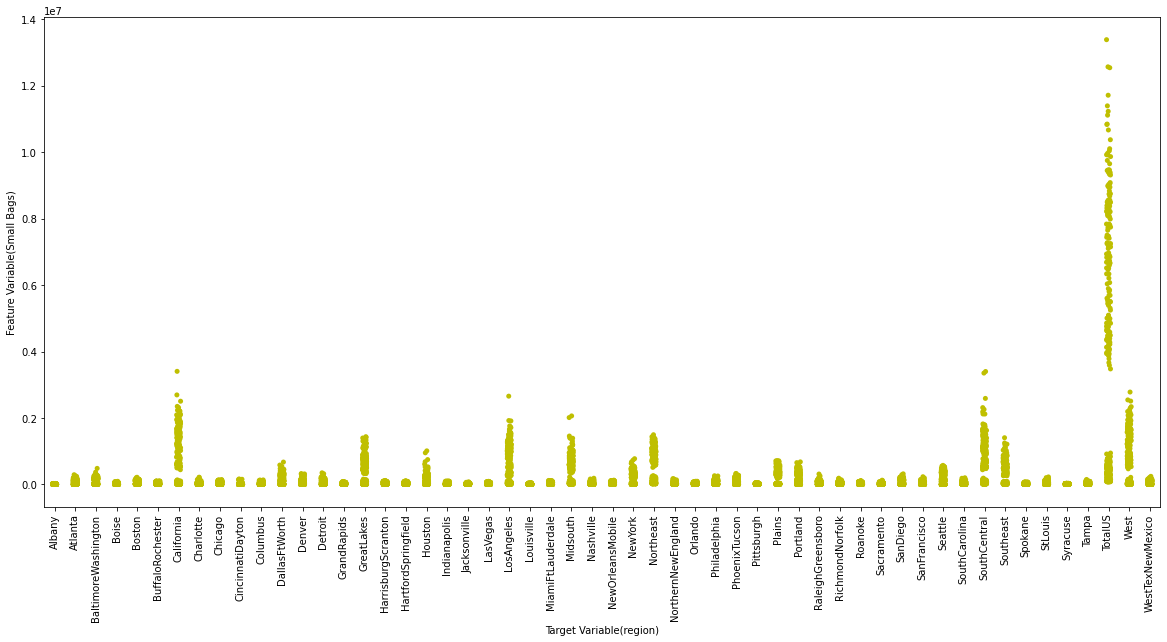



This is a Stripplot diagram b/w attributes- region & Large Bags
AxesSubplot(0.125,0.125;0.775x0.755)


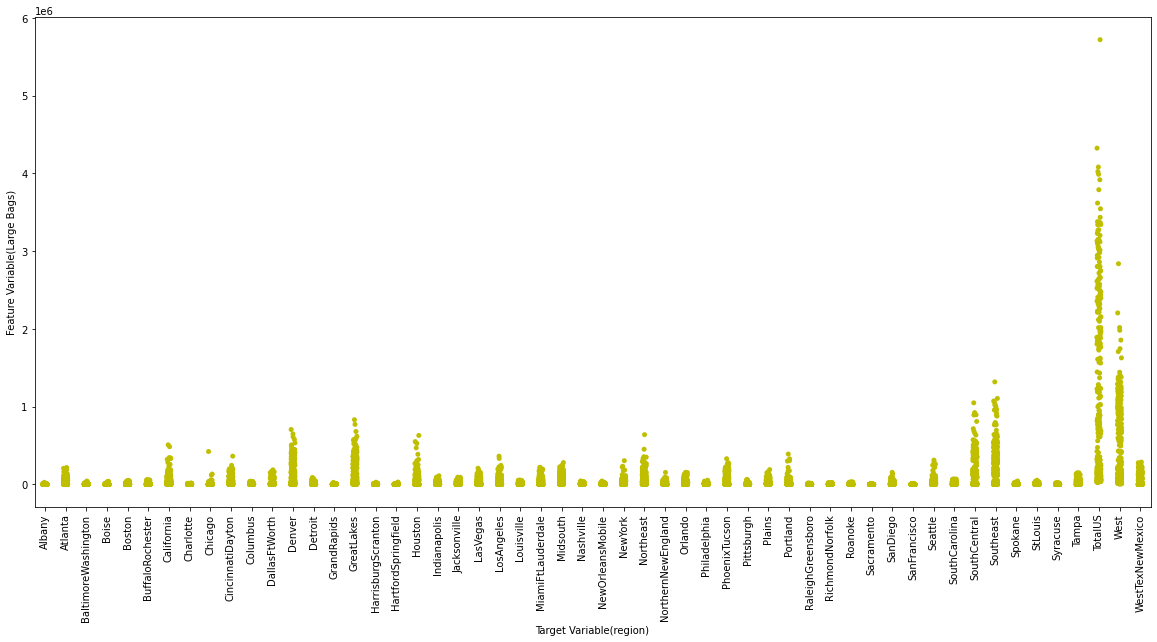



This is a Stripplot diagram b/w attributes- region & XLarge Bags
AxesSubplot(0.125,0.125;0.775x0.755)


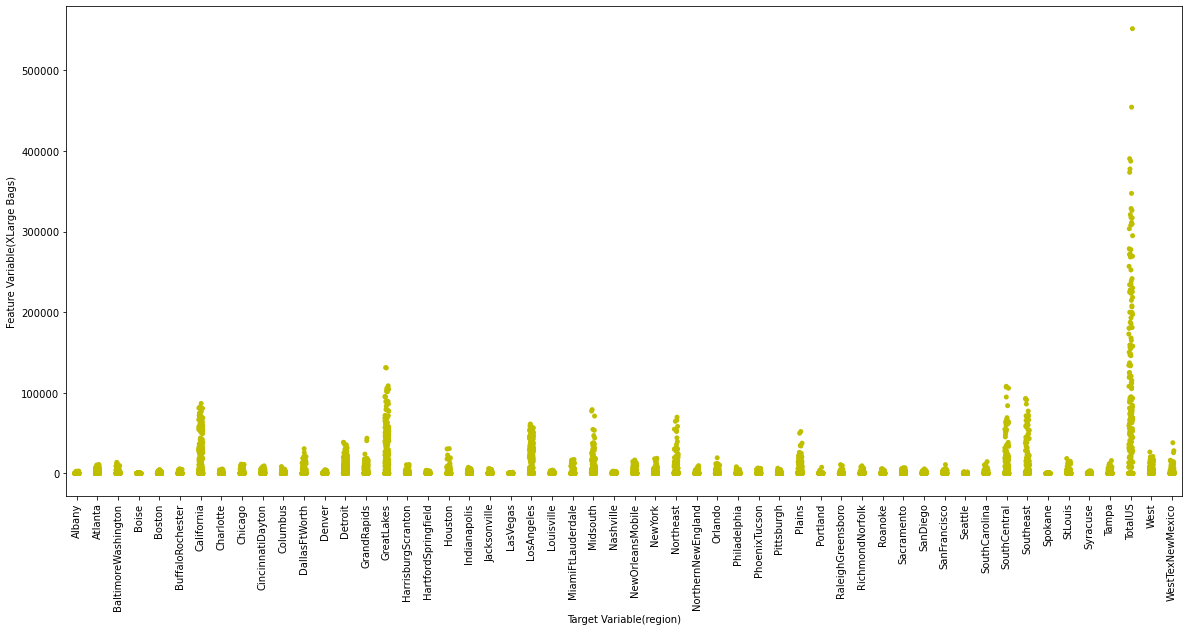



This is a Stripplot diagram b/w attributes- region & type
AxesSubplot(0.125,0.125;0.775x0.755)


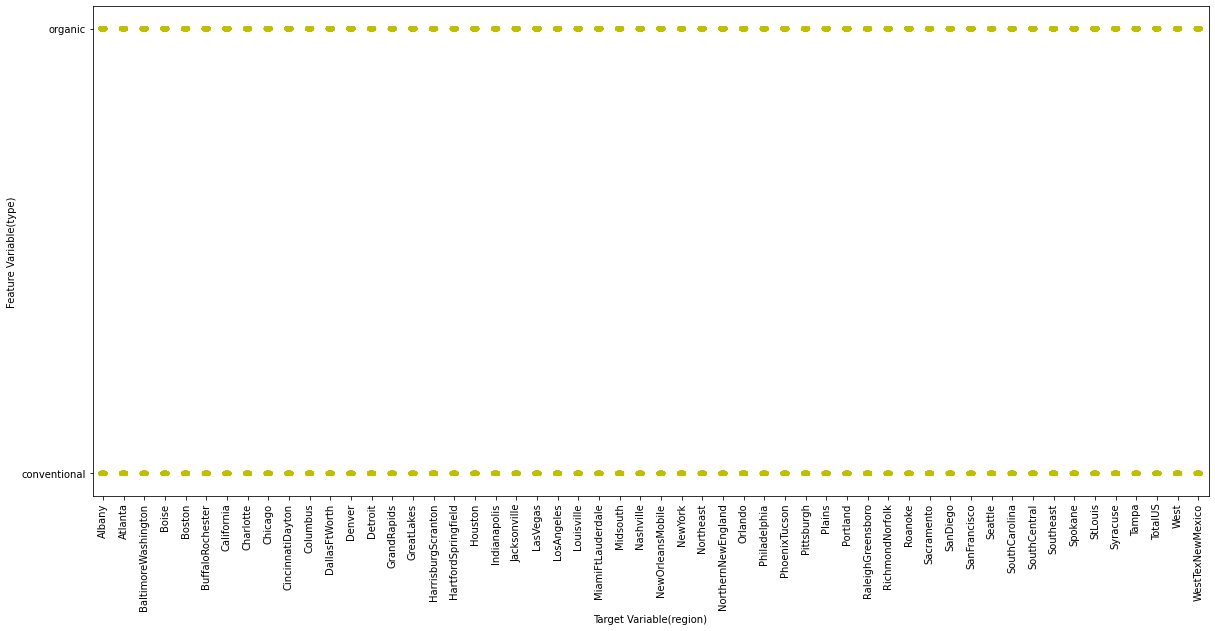



This is a Stripplot diagram b/w attributes- region & year
AxesSubplot(0.125,0.125;0.775x0.755)


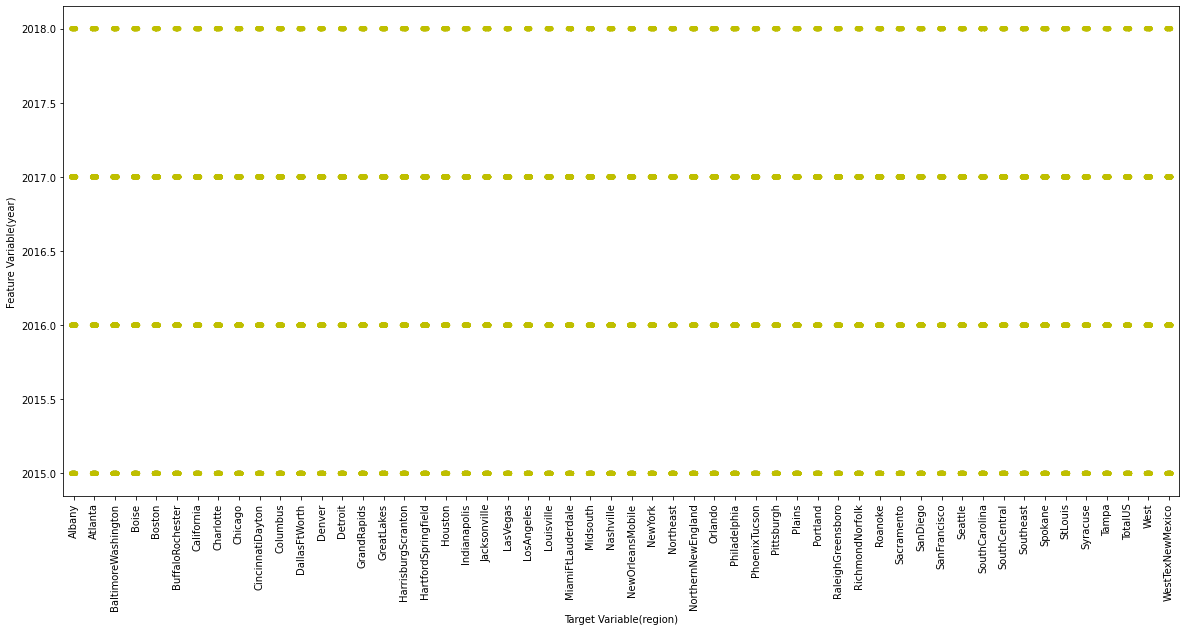

In [11]:
l=['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year']
for i in l:
    plt.figure(figsize=(20,9))
    print(f'This is a Stripplot diagram b/w attributes- region & {i}')
    print(sns.stripplot(x=df.region,y=df[i],color='y'))
    plt.xlabel('Target Variable(region)')
    plt.ylabel(f'Feature Variable({i})')
    plt.xticks(rotation=90)
    plt.show()
    print('\n')

#### All the regions are almost equally distributed w.r.t. Average price

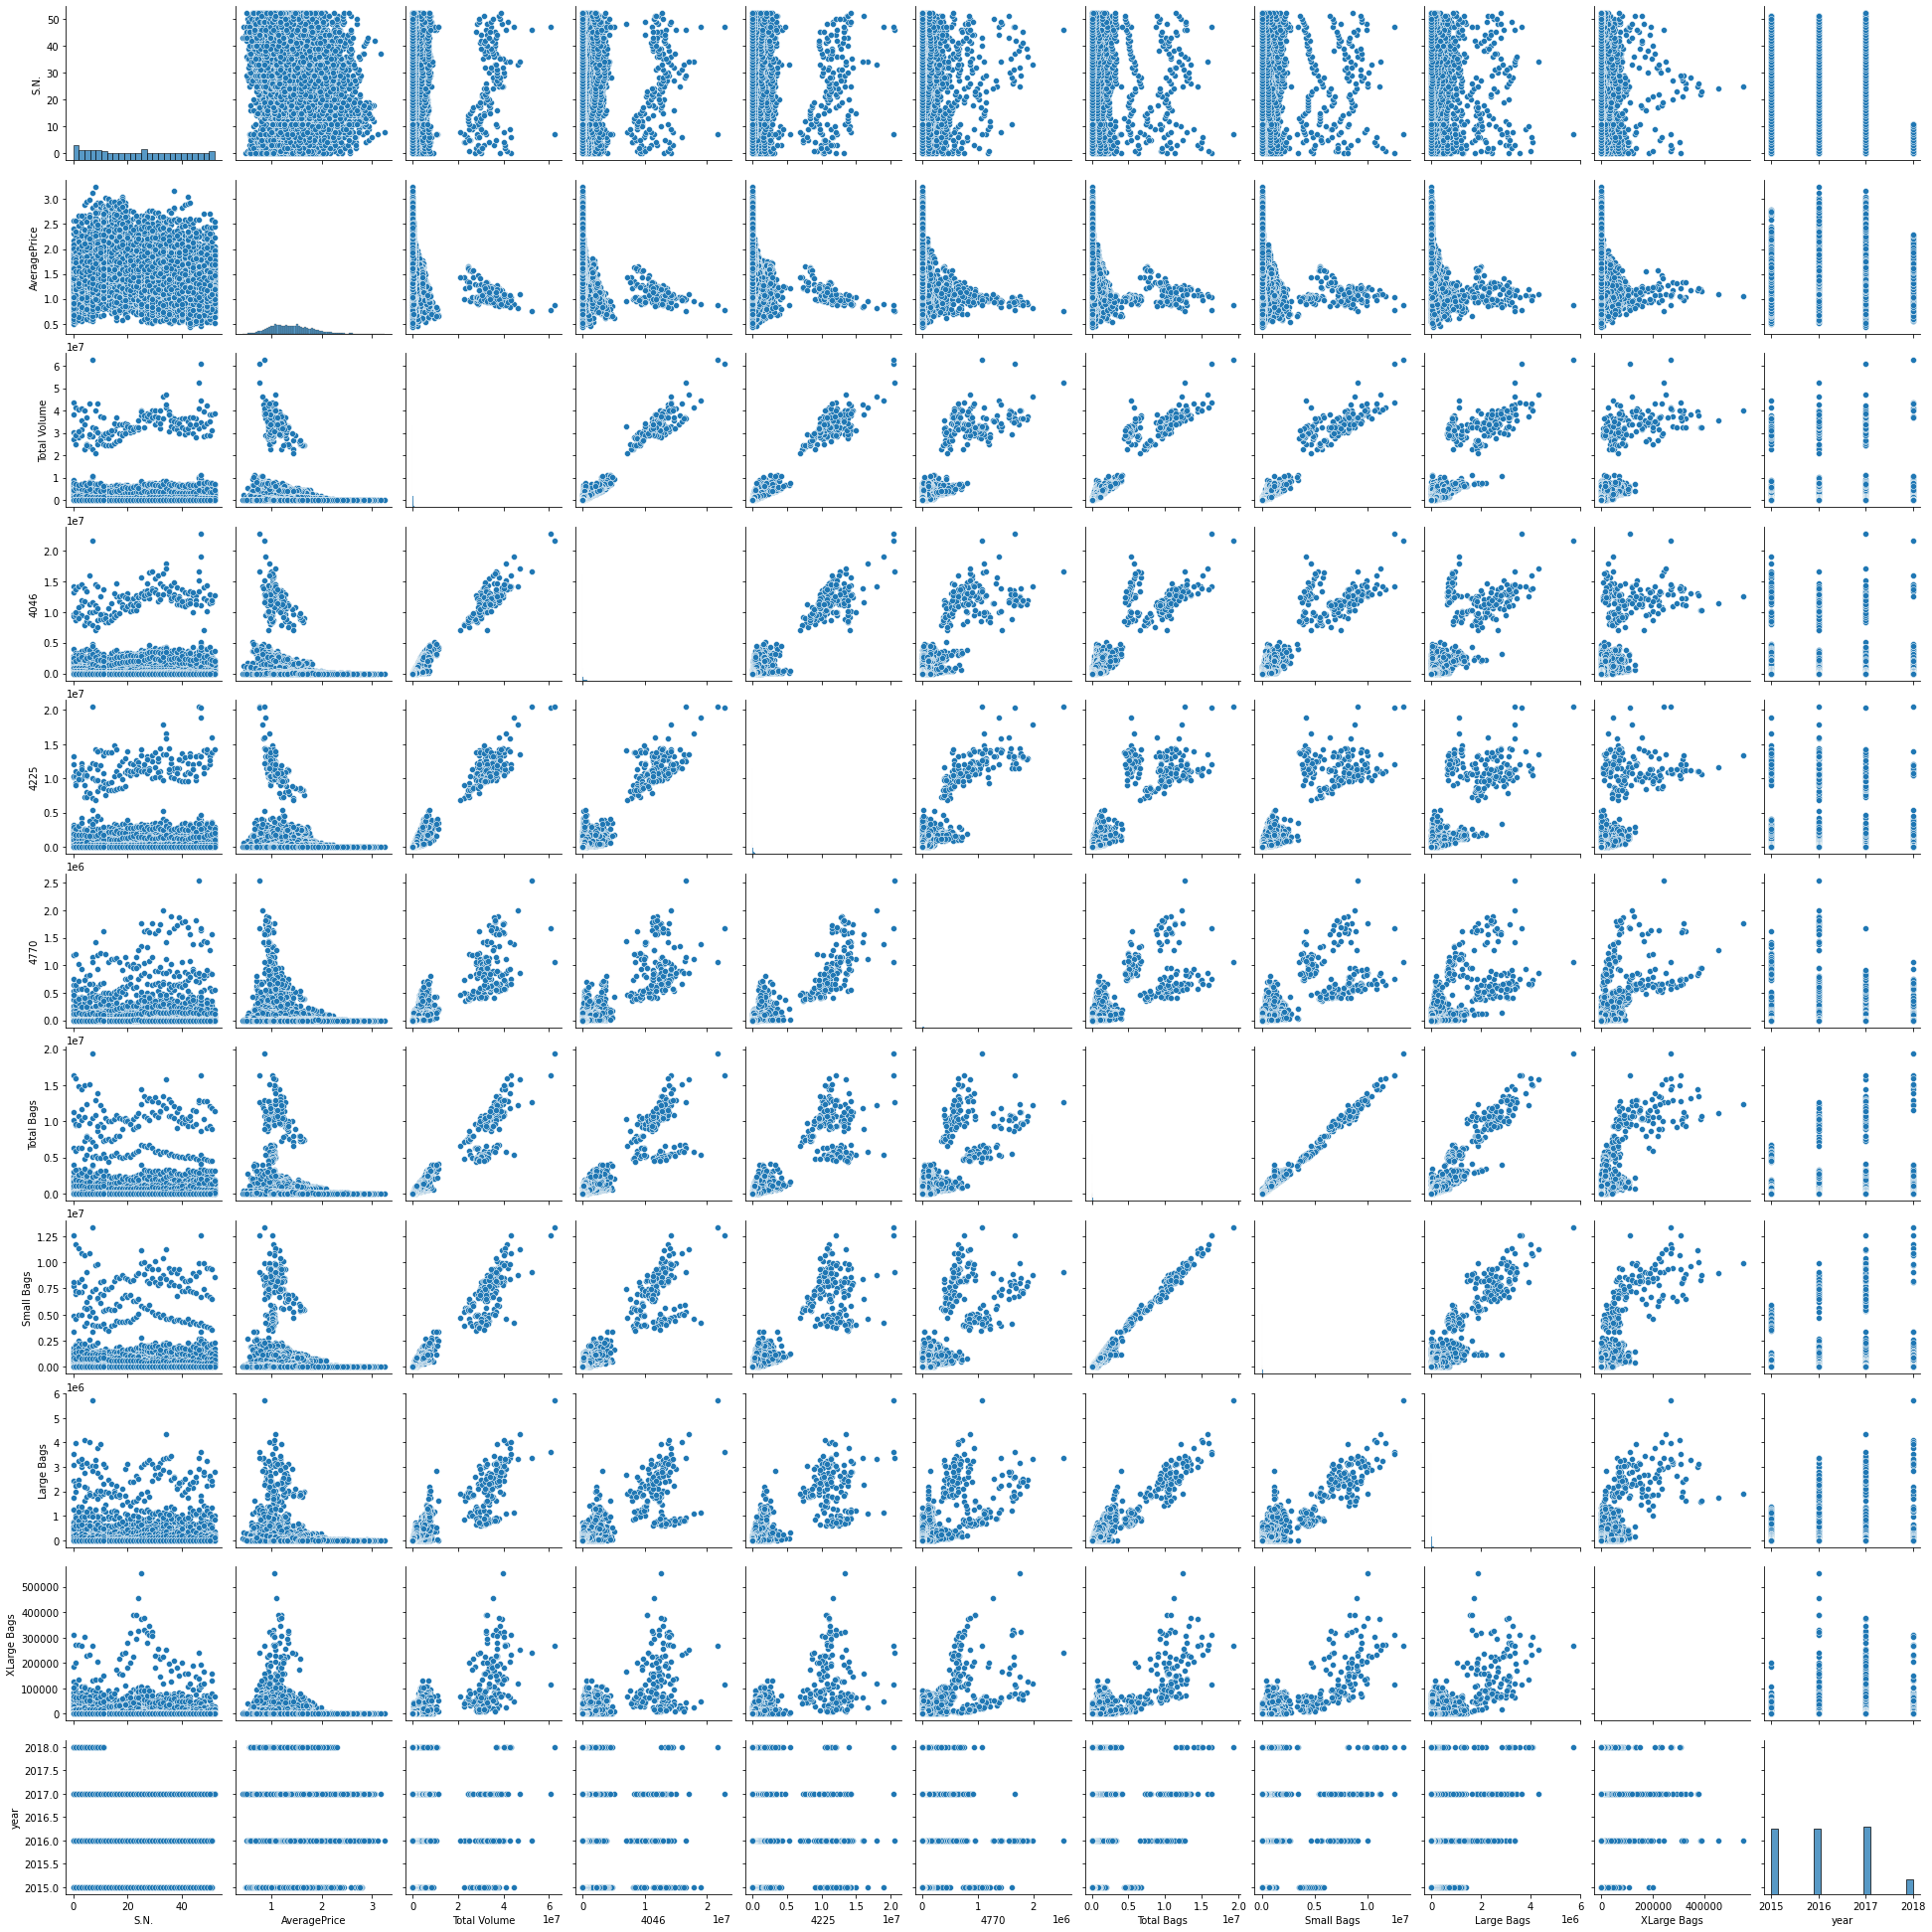

In [10]:
sns.pairplot(df)

#### Total Volume has really strong correlation with attributes 4046,4225,Total Bags,Small Bags.Also,Total Bags and small Bags are highly postive correlated with each other.

### Encoding

##### Now I'll convert all the categorical columns into numeric one by applying label encoder technique

#### Label Encoder

In [69]:
import sklearn
from sklearn.preprocessing import LabelEncoder

In [70]:
#l is the list of all the categorical columns
l=['Date','type','region']
for i in l:
    df[i]=LabelEncoder().fit_transform(df[i].astype(str))

In [71]:
df

S.N.  Date  AveragePrice  Total Volume     4046       4225    4770  \
0         0    51          1.33      64236.62  1036.74   54454.85   48.16   
1         1    50          1.35      54876.98   674.28   44638.81   58.33   
2         2    49          0.93     118220.22   794.70  109149.67  130.50   
3         3    48          1.08      78992.15  1132.00   71976.41   72.58   
4         4    47          1.28      51039.60   941.48   43838.39   75.78   
...     ...   ...           ...           ...      ...        ...     ...   
18244     7   161          1.63      17074.83  2046.96    1529.20    0.00   
18245     8   160          1.71      13888.04  1191.70    3431.50    0.00   
18246     9   159          1.87      13766.76  1191.92    2452.79  727.94   
18247    10   158          1.93      16205.22  1527.63    2981.04  727.01   
18248    11   157          1.62      17489.58  2894.77    2356.13  224.53   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25          0.0     0  2015       0  
1         9505.56     9408.07       97.49          0.0     0  2015       0  
2         8145.35     8042.21      103.14          0.0     0  2015       0  
3         5811.16     5677.40      133.76          0.0     0  2015       0  
4         6183.95     5986.26      197.69          0.0     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
18244    13498.67    13066.82      431.85          0.0     1  2018      53  
18245     9264.84     8940.04      324.80          0.0     1  2018      53  
18246     9394.11     9351.80       42.31          0.0     1  2018      53  
18247    10969.54    10919.54       50.00          0.0     1  2018      53  
18248    12014.15    11988.14       26.01          0.0     1  2018      53  

[18249 rows x 14 columns]

### Replacing All the Zeros by Mean

In [72]:
#replaced all 0 values of each column to their respective mean
l=['4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags']
for i in l:
    a=df[i].mean()
    df[i]=df[i].replace(0,a)

In [73]:
#Now, we have all the columns in numeric
df

S.N.  Date  AveragePrice  Total Volume     4046       4225  \
0         0    51          1.33      64236.62  1036.74   54454.85   
1         1    50          1.35      54876.98   674.28   44638.81   
2         2    49          0.93     118220.22   794.70  109149.67   
3         3    48          1.08      78992.15  1132.00   71976.41   
4         4    47          1.28      51039.60   941.48   43838.39   
...     ...   ...           ...           ...      ...        ...   
18244     7   161          1.63      17074.83  2046.96    1529.20   
18245     8   160          1.71      13888.04  1191.70    3431.50   
18246     9   159          1.87      13766.76  1191.92    2452.79   
18247    10   158          1.93      16205.22  1527.63    2981.04   
18248    11   157          1.62      17489.58  2894.77    2356.13   

               4770  Total Bags  Small Bags  Large Bags  XLarge Bags  type  \
0         48.160000     8696.87     8603.62       93.25  3106.426507     0   
1         58.330000     9505.56     9408.07       97.49  3106.426507     0   
2        130.500000     8145.35     8042.21      103.14  3106.426507     0   
3         72.580000     5811.16     5677.40      133.76  3106.426507     0   
4         75.780000     6183.95     5986.26      197.69  3106.426507     0   
...             ...         ...         ...         ...          ...   ...   
18244  22839.735993    13498.67    13066.82      431.85  3106.426507     1   
18245  22839.735993     9264.84     8940.04      324.80  3106.426507     1   
18246    727.940000     9394.11     9351.80       42.31  3106.426507     1   
18247    727.010000    10969.54    10919.54       50.00  3106.426507     1   
18248    224.530000    12014.15    11988.14       26.01  3106.426507     1   

       year  region  
0      2015       0  
1      2015       0  
2      2015       0  
3      2015       0  
4      2015       0  
...     ...     ...  
18244  2018      53  
18245  2018      53  
18246  2018      53  
18247  2018      53  
18248  2018      53  

[18249 rows x 14 columns]

In [74]:
#will drop meaningless columns
df.drop('S.N.',axis=1,inplace=True)
df

Date  AveragePrice  Total Volume     4046       4225          4770  \
0        51          1.33      64236.62  1036.74   54454.85     48.160000   
1        50          1.35      54876.98   674.28   44638.81     58.330000   
2        49          0.93     118220.22   794.70  109149.67    130.500000   
3        48          1.08      78992.15  1132.00   71976.41     72.580000   
4        47          1.28      51039.60   941.48   43838.39     75.780000   
...     ...           ...           ...      ...        ...           ...   
18244   161          1.63      17074.83  2046.96    1529.20  22839.735993   
18245   160          1.71      13888.04  1191.70    3431.50  22839.735993   
18246   159          1.87      13766.76  1191.92    2452.79    727.940000   
18247   158          1.93      16205.22  1527.63    2981.04    727.010000   
18248   157          1.62      17489.58  2894.77    2356.13    224.530000   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25  3106.426507     0  2015       0  
1         9505.56     9408.07       97.49  3106.426507     0  2015       0  
2         8145.35     8042.21      103.14  3106.426507     0  2015       0  
3         5811.16     5677.40      133.76  3106.426507     0  2015       0  
4         6183.95     5986.26      197.69  3106.426507     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
18244    13498.67    13066.82      431.85  3106.426507     1  2018      53  
18245     9264.84     8940.04      324.80  3106.426507     1  2018      53  
18246     9394.11     9351.80       42.31  3106.426507     1  2018      53  
18247    10969.54    10919.54       50.00  3106.426507     1  2018      53  
18248    12014.15    11988.14       26.01  3106.426507     1  2018      53  

[18249 rows x 13 columns]

### Descriptive Statistics

In [89]:
df.describe()

Date  AveragePrice  Total Volume          4046          4225  \
count  18249.000000  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04   
mean      83.997096      1.405978  8.506440e+05  2.968940e+05  2.961412e+05   
std       48.787638      0.402677  3.453545e+06  1.264533e+06  1.203999e+06   
min        0.000000      0.440000  8.456000e+01  1.000000e+00  1.260000e+00   
25%       42.000000      1.100000  1.083858e+04  9.750900e+02  3.086950e+03   
50%       84.000000      1.370000  1.073768e+05  9.954770e+03  2.977364e+04   
75%      126.000000      1.660000  4.329623e+05  1.217699e+05  1.542584e+05   
max      168.000000      3.250000  6.250565e+07  2.274362e+07  2.047057e+07   

               4770    Total Bags    Small Bags    Large Bags    XLarge Bags  \
count  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000   
mean   2.971957e+04  2.398362e+05  1.837821e+05  6.139498e+04    5157.291024   
std    1.065084e+05  9.862184e+05  7.459830e+05  2.430763e+05   17391.406970   
min    8.300000e-01  3.090000e+00  2.520000e+00  9.700000e-01       1.000000   
25%    3.786500e+02  5.108010e+03  3.125050e+03  9.187500e+02    3106.426507   
50%    1.111933e+04  3.992521e+04  2.787623e+04  7.942080e+03    3106.426507   
75%    2.283974e+04  1.112384e+05  8.620928e+04  5.433809e+04    3106.426507   
max    2.546439e+06  1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   

               type          year        region  
count  18249.000000  18249.000000  18249.000000  
mean       0.499918   2016.147899     26.495644  
std        0.500014      0.939938     15.583788  
min        0.000000   2015.000000      0.000000  
25%        0.000000   2015.000000     13.000000  
50%        0.000000   2016.000000     26.000000  
75%        1.000000   2017.000000     40.000000  
max        1.000000   2018.000000     53.000000

In [90]:
df.describe().T

count           mean           std      min           25%  \
Date          18249.0      83.997096  4.878764e+01     0.00     42.000000   
AveragePrice  18249.0       1.405978  4.026766e-01     0.44      1.100000   
Total Volume  18249.0  850644.013009  3.453545e+06    84.56  10838.580000   
4046          18249.0  296894.009425  1.264533e+06     1.00    975.090000   
4225          18249.0  296141.166453  1.203999e+06     1.26   3086.950000   
4770          18249.0   29719.566600  1.065084e+05     0.83    378.650000   
Total Bags    18249.0  239836.176581  9.862184e+05     3.09   5108.010000   
Small Bags    18249.0  183782.113688  7.459830e+05     2.52   3125.050000   
Large Bags    18249.0   61394.982709  2.430763e+05     0.97    918.750000   
XLarge Bags   18249.0    5157.291024  1.739141e+04     1.00   3106.426507   
type          18249.0       0.499918  5.000137e-01     0.00      0.000000   
year          18249.0    2016.147899  9.399385e-01  2015.00   2015.000000   
region        18249.0      26.495644  1.558379e+01     0.00     13.000000   

                        50%            75%          max  
Date              84.000000     126.000000       168.00  
AveragePrice       1.370000       1.660000         3.25  
Total Volume  107376.760000  432962.290000  62505646.52  
4046            9954.770000  121769.890000  22743616.17  
4225           29773.640000  154258.390000  20470572.61  
4770           11119.330000   22839.735993   2546439.11  
Total Bags     39925.210000  111238.440000  19373134.37  
Small Bags     27876.230000   86209.280000  13384586.80  
Large Bags      7942.080000   54338.088145   5719096.61  
XLarge Bags     3106.426507    3106.426507    551693.65  
type               0.000000       1.000000         1.00  
year            2016.000000    2017.000000      2018.00  
region            26.000000      40.000000        53.00

As we can see in the above chart attribute 4225 has less mean than their respective median and also the interquartile difference for XLarge Bags,Large Bags,Small Bags,Total Bags,4770,4225,4046 & Total Volume are varying too much hence there might be possibility that outliers are present in the data set. Note.I'm not going to apply statistical properties over any of the categorical columns.

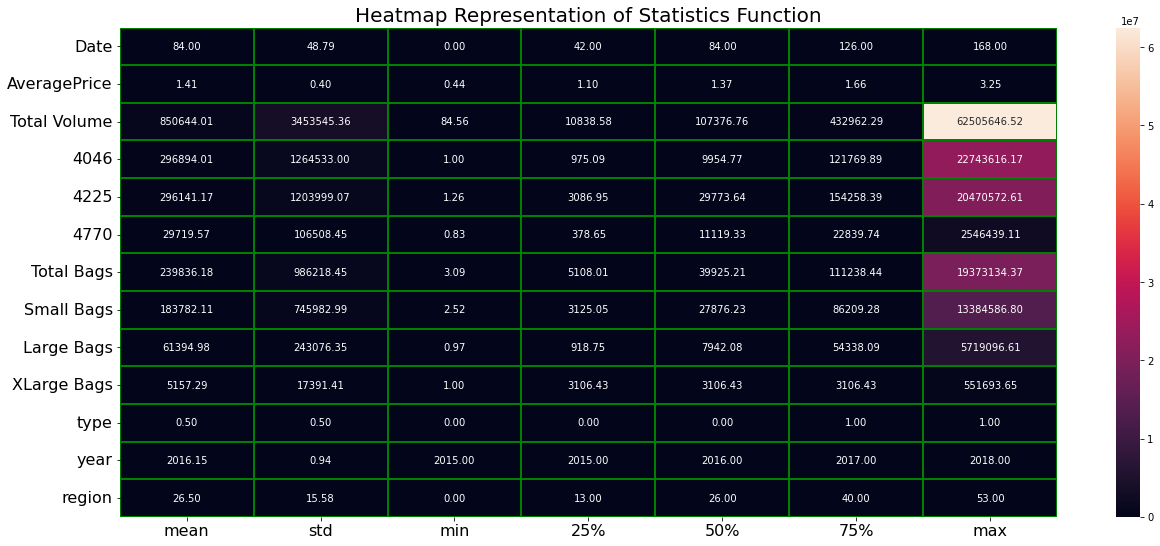

In [97]:
plt.figure(figsize=(21,9))
sns.heatmap(df.describe()[1:].T,annot=True,linecolor='green',linewidth='0.1',fmt='0.2f')
plt.yticks(rotation=0,fontsize=16)
plt.xticks(rotation=0,fontsize=16)
plt.title('Heatmap Representation of Statistics Function',fontsize=20)
plt.show()

### Correlation

In [98]:
df.corr()

Date  AveragePrice  Total Volume      4046      4225  \
Date          1.000000      0.145514      0.009263 -0.004886 -0.017024   
AveragePrice  0.145514      1.000000     -0.192752 -0.206687 -0.172693   
Total Volume  0.009263     -0.192752      1.000000  0.977463  0.974078   
4046         -0.004886     -0.206687      0.977463  1.000000  0.925593   
4225         -0.017024     -0.172693      0.974078  0.925593  1.000000   
4770         -0.047574     -0.146752      0.864455  0.826171  0.880332   
Total Bags    0.064441     -0.176847      0.963022  0.919631  0.905656   
Small Bags    0.054855     -0.173151      0.966977  0.924627  0.915659   
Large Bags    0.067791     -0.154010      0.877119  0.835021  0.806358   
XLarge Bags   0.064993     -0.084869      0.736038  0.688072  0.677366   
type         -0.000060      0.615845     -0.232434 -0.222827 -0.231493   
year          0.950274      0.093197      0.017193  0.003574 -0.009718   
region       -0.000101     -0.011716      0.174176  0.192410  0.145953   

                  4770  Total Bags  Small Bags  Large Bags  XLarge Bags  \
Date         -0.047574    0.064441    0.054855    0.067791     0.064993   
AveragePrice -0.146752   -0.176847   -0.173151   -0.154010    -0.084869   
Total Volume  0.864455    0.963022    0.966977    0.877119     0.736038   
4046          0.826171    0.919631    0.924627    0.835021     0.688072   
4225          0.880332    0.905656    0.915659    0.806358     0.677366   
4770          1.000000    0.784314    0.794642    0.689588     0.667364   
Total Bags    0.784314    1.000000    0.994105    0.939750     0.794760   
Small Bags    0.794642    0.994105    1.000000    0.898993     0.796916   
Large Bags    0.689588    0.939750    0.898993    1.000000     0.702041   
XLarge Bags   0.667364    0.794760    0.796916    0.702041     1.000000   
type         -0.147329   -0.217594   -0.218465   -0.173936    -0.120678   
year         -0.036746    0.071310    0.061902    0.074300     0.069213   
region        0.085718    0.175447    0.165930    0.196301     0.082393   

                  type      year    region  
Date         -0.000060  0.950274 -0.000101  
AveragePrice  0.615845  0.093197 -0.011716  
Total Volume -0.232434  0.017193  0.174176  
4046         -0.222827  0.003574  0.192410  
4225         -0.231493 -0.009718  0.145953  
4770         -0.147329 -0.036746  0.085718  
Total Bags   -0.217594  0.071310  0.175447  
Small Bags   -0.218465  0.061902  0.165930  
Large Bags   -0.173936  0.074300  0.196301  
XLarge Bags  -0.120678  0.069213  0.082393  
type          1.000000 -0.000032 -0.000280  
year         -0.000032  1.000000 -0.000055  
region       -0.000280 -0.000055  1.000000

In [100]:
df.corr().AveragePrice.sort_values()

4046           -0.206687
Total Volume   -0.192752
Total Bags     -0.176847
Small Bags     -0.173151
4225           -0.172693
Large Bags     -0.154010
4770           -0.146752
XLarge Bags    -0.084869
region         -0.011716
year            0.093197
Date            0.145514
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

#### See, there are 9 attributes having negative values and its showing us that there is negative correlation b/w attrition (which is our target variable) and other respective Negative attributes.Hence will remove all the negative correlated columns later in data cleaning phase.Negative correlation means if input is +ve then output is -ve and vice-versa whereas, Positive correlation means if input is +ve then output would also be +ve and vice-versa. Also we'll not remove any categorical columns in this process

The attributes those are giving negative correlation are given below---4046,Total Volume,Total Bags,Small Bags,4225,Large Bags,4770,XLarge Bags,region

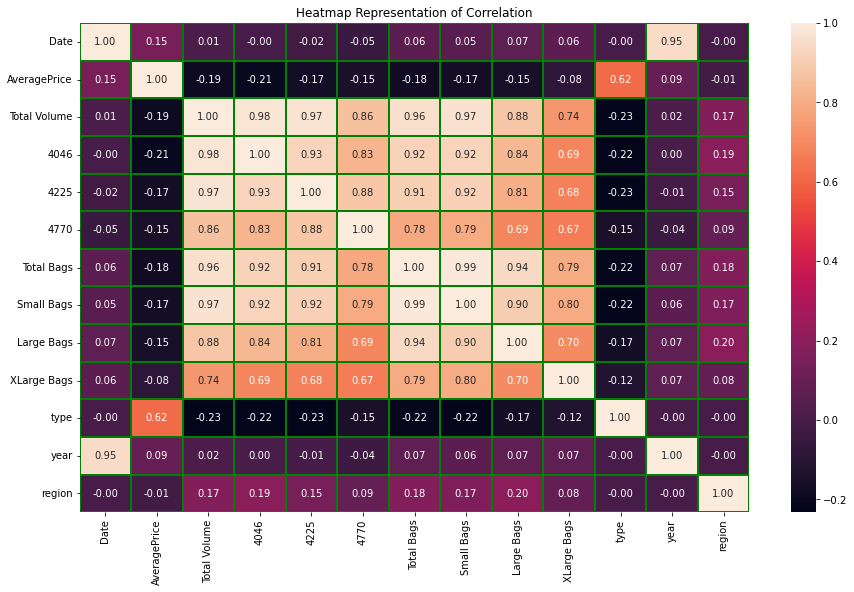

In [102]:
plt.figure(figsize=(15,9))
sns.heatmap(df.corr(),annot=True,linecolor='g',linewidth='0.1',fmt='0.2f')
plt.yticks(rotation=0)
plt.title('Heatmap Representation of Correlation')
plt.show()

### Multicollinearity

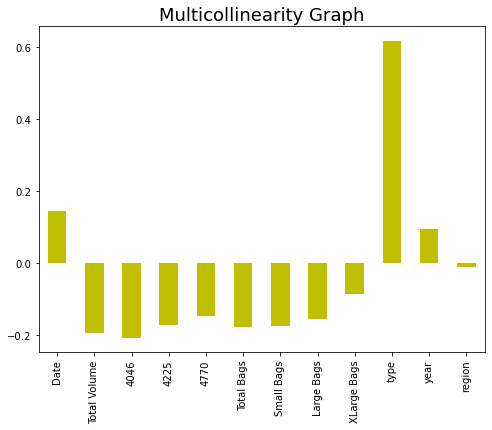

In [104]:
plt.figure(figsize=(8,6))
df.corr().AveragePrice.drop(['AveragePrice']).plot(kind='bar',color='y')
plt.title('Multicollinearity Graph',fontsize=18)
plt.show()

i'll check the multicollinearity later in the Data Cleansing portion when i'll be calculating the Variance inflation factor.

### Skewness

In [105]:
df.skew().sort_values()

region           0.000030
Date             0.000117
type             0.000329
year             0.215339
AveragePrice     0.580303
4046             8.648526
4225             8.942760
Total Volume     9.007687
Small Bags       9.541906
Total Bags       9.756195
Large Bags       9.818731
4770            10.244212
XLarge Bags     13.483327
dtype: float64

The threshold value of Skewness is +/=0.5. Attributes- AveragePrice,4046,4225, Total Volume ,Small Bags,Total Bags,Large Bags,4770,XLarge Bags are not attaining the threshold value hence will remove skewness from thses columns lateron in data cleansing part,also will not touch target column and categorical columns for removing the skewness.

Categorical Columns = Type and Region

### Distribution Plot

##### Here we can now check the normal distribution pattern for each of the attributes which are skewed left or right hand side

The Distribution Plot for attribute-Date is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


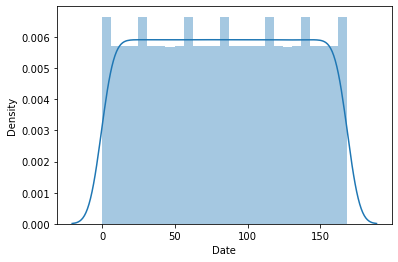



The Distribution Plot for attribute-AveragePrice is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


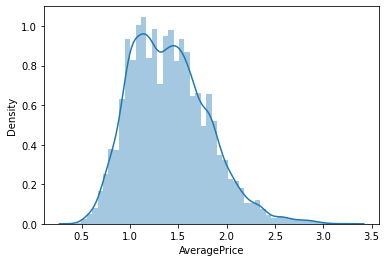



The Distribution Plot for attribute-Total Volume is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


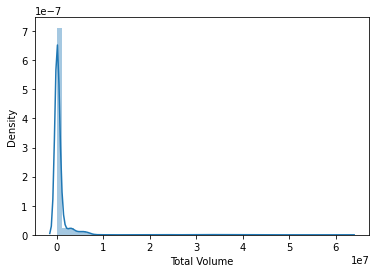



The Distribution Plot for attribute-4046 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


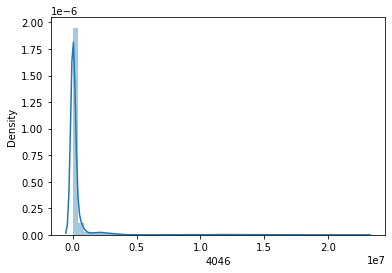



The Distribution Plot for attribute-4225 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


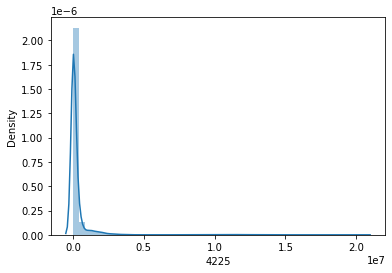



The Distribution Plot for attribute-4770 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


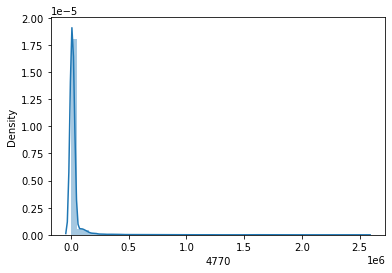



The Distribution Plot for attribute-Total Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


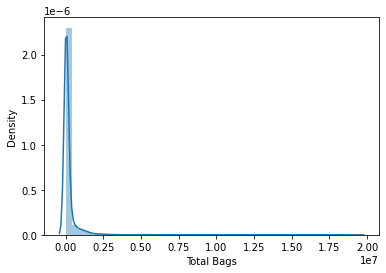



The Distribution Plot for attribute-Small Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


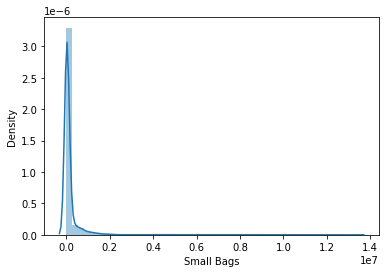



The Distribution Plot for attribute-Large Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


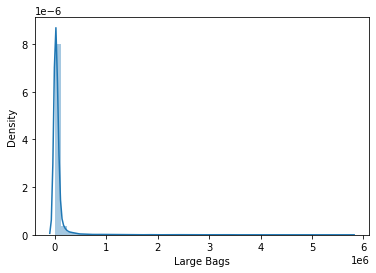



The Distribution Plot for attribute-XLarge Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


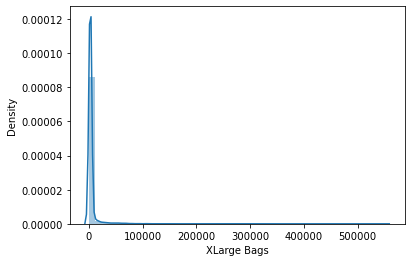



The Distribution Plot for attribute-type is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


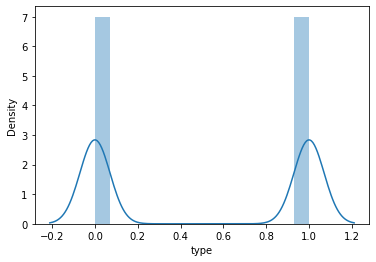



The Distribution Plot for attribute-year is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


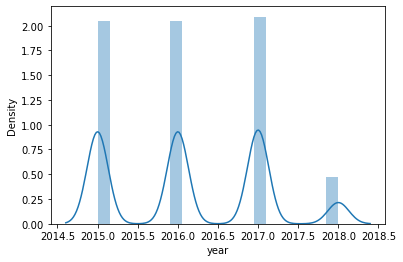



The Distribution Plot for attribute-region is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


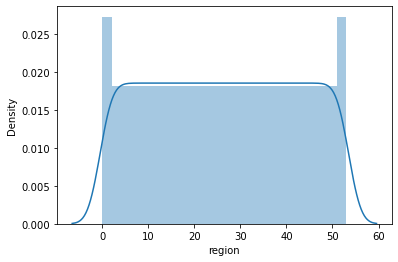

In [106]:
l=['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in l:
    print(f'The Distribution Plot for attribute-{i} is given below..')
    print(sns.distplot(df[i]))
    plt.show()
    print('\n')

As we can see in the above distribution plots all of the attributes are skewed right hand side.Ergo,i'll remove the skewness later on the data cleansing section by power transfrorm or boxcox method

### Outliers

##### Boxplots To check the Outliers

The BoxPlot Diagram for attribute-Date is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


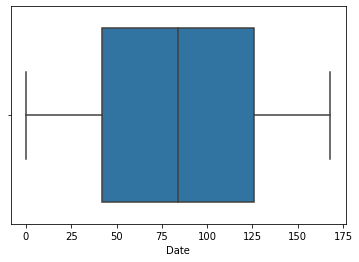



The BoxPlot Diagram for attribute-AveragePrice is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


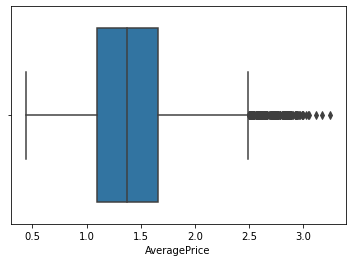



The BoxPlot Diagram for attribute-Total Volume is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


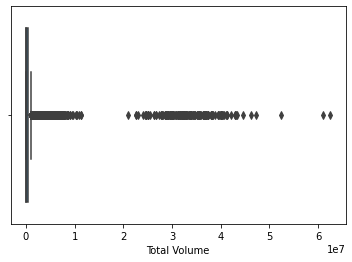



The BoxPlot Diagram for attribute-4046 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


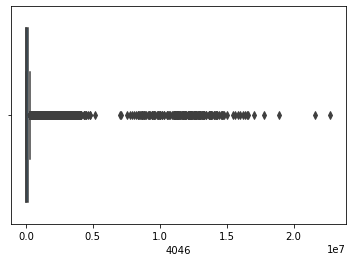



The BoxPlot Diagram for attribute-4225 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


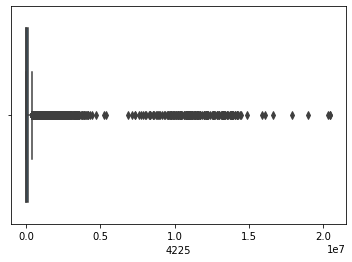



The BoxPlot Diagram for attribute-4770 is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


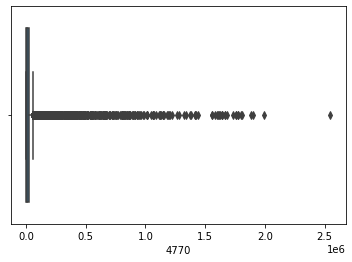



The BoxPlot Diagram for attribute-Total Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


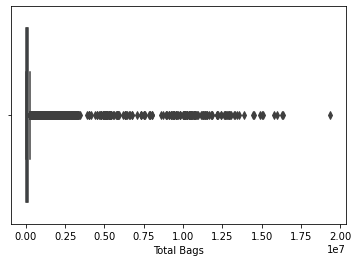



The BoxPlot Diagram for attribute-Small Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


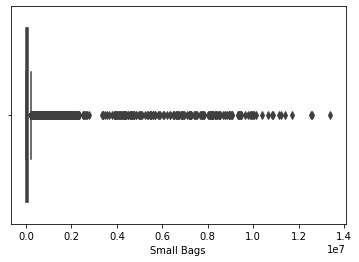



The BoxPlot Diagram for attribute-Large Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


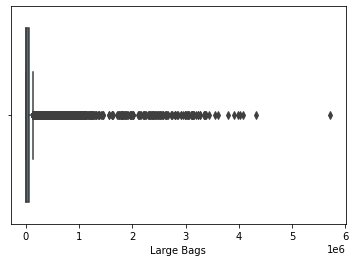



The BoxPlot Diagram for attribute-XLarge Bags is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


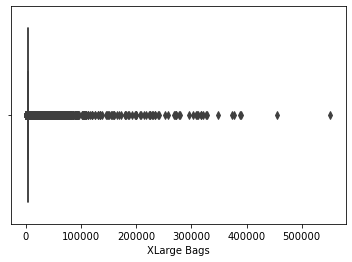



The BoxPlot Diagram for attribute-type is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


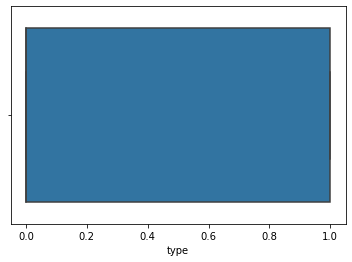



The BoxPlot Diagram for attribute-year is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


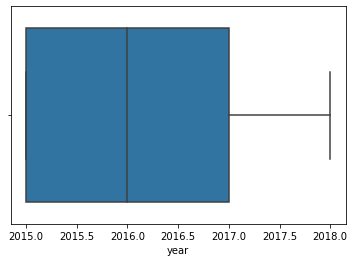



The BoxPlot Diagram for attribute-region is given below..
AxesSubplot(0.125,0.125;0.775x0.755)


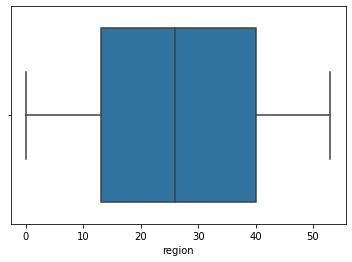

In [107]:
l=['Date','AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags','XLarge Bags','type','year','region']
for i in l:
    print(f'The BoxPlot Diagram for attribute-{i} is given below..')
    print(sns.boxplot(df[i]))
    plt.show()
    print('\n')

As we can see in the above boxplot images there might be possibility of outliers presence in attributes-Total Volume, 4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags.And,I'll remove the same in next part of data cleansing

In [75]:
z=np.abs(zscore(df))
np.where(z>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([3, 3, 9, ..., 1, 1, 1], dtype=int64))

we can see that there are lots of rows and columns are presence having outliers

In [109]:
z.iloc[346]

Date            1.373277
AveragePrice    1.306241
Total Volume    2.234545
4046            3.197492
4225            2.580641
4770            1.528131
Total Bags      0.397450
Small Bags      0.570547
Large Bags      0.171387
XLarge Bags     0.142794
type            0.999836
year            1.221282
region          1.315226
Name: 346, dtype: float64

In [110]:
z.iloc[17428][1]

4.38086076813336

In [111]:
z.iloc[780][9]

4.250969730810154

### Data Cleansing

##### 1. Remove Negative Correlation

In [76]:
df1=df.drop(['Total Volume','4046','4225','Total Bags','Small Bags','Large Bags'],axis=1)
df1

Date  AveragePrice          4770  XLarge Bags  type  year  region
0        51          1.33     48.160000  3106.426507     0  2015       0
1        50          1.35     58.330000  3106.426507     0  2015       0
2        49          0.93    130.500000  3106.426507     0  2015       0
3        48          1.08     72.580000  3106.426507     0  2015       0
4        47          1.28     75.780000  3106.426507     0  2015       0
...     ...           ...           ...          ...   ...   ...     ...
18244   161          1.63  22839.735993  3106.426507     1  2018      53
18245   160          1.71  22839.735993  3106.426507     1  2018      53
18246   159          1.87    727.940000  3106.426507     1  2018      53
18247   158          1.93    727.010000  3106.426507     1  2018      53
18248   157          1.62    224.530000  3106.426507     1  2018      53

[18249 rows x 7 columns]

To remove the negative collinearity i've dropped 6 columns,all were numeric. In this process we have only 7 columns remaining

### 2.Removing Multicollinearity

In [146]:
import scipy.stats
import statsmodels.api
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [147]:
x=df1.drop('AveragePrice',axis=1)
x

Date          4770  XLarge Bags  type  year  region
0        51     48.160000  3106.426507     0  2015       0
1        50     58.330000  3106.426507     0  2015       0
2        49    130.500000  3106.426507     0  2015       0
3        48     72.580000  3106.426507     0  2015       0
4        47     75.780000  3106.426507     0  2015       0
...     ...           ...          ...   ...   ...     ...
18244   161  22839.735993  3106.426507     1  2018      53
18245   160  22839.735993  3106.426507     1  2018      53
18246   159    727.940000  3106.426507     1  2018      53
18247   158    727.010000  3106.426507     1  2018      53
18248   157    224.530000  3106.426507     1  2018      53

[18249 rows x 6 columns]

In [148]:
#calculating VIF Score
def vif():
    df2=pd.DataFrame()
    df2['Features']=x.columns
    df2['VIF']=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    print(df2)

In [149]:
vif()

      Features       VIF
0         Date  4.047936
1         4770  1.992632
2  XLarge Bags  1.999413
3         type  2.046324
4         year  8.015335
5       region  3.924898


See,from the above we can see that there are two variables those are sharing the equal amount of information to the target variable but i'm not dropping any columns anymore as these two columns are unique attributes because earlier we have already removed other Bags columns and 4046 and 4225 columns.

### 3.Removing Outliers

In [77]:
df3=df1[(z<3).all(axis=1)]
df3

Date  AveragePrice          4770  XLarge Bags  type  year  region
0        51          1.33     48.160000  3106.426507     0  2015       0
1        50          1.35     58.330000  3106.426507     0  2015       0
2        49          0.93    130.500000  3106.426507     0  2015       0
3        48          1.08     72.580000  3106.426507     0  2015       0
4        47          1.28     75.780000  3106.426507     0  2015       0
...     ...           ...           ...          ...   ...   ...     ...
18244   161          1.63  22839.735993  3106.426507     1  2018      53
18245   160          1.71  22839.735993  3106.426507     1  2018      53
18246   159          1.87    727.940000  3106.426507     1  2018      53
18247   158          1.93    727.010000  3106.426507     1  2018      53
18248   157          1.62    224.530000  3106.426507     1  2018      53

[17665 rows x 7 columns]

In [151]:
print(df3.shape)
print(df1.shape)

(17665, 7)
(18249, 7)


The new dataframe have 17665 rows and 7 columns

In [152]:
Percentage_loss=(18249-17665)*100/18249
Percentage_loss

3.200175352074086

I'm getting the percentage loss is about 3% which is decent because our dataset is too large having 17665 rows and out of it we are loosing only 3% rows.Now we can move ahead by considering it

### 4.Removing Skewness

##### a): Using power_transform method

In [129]:
from sklearn.preprocessing import power_transform

In [154]:
x=df3.drop('AveragePrice',axis=1)
x

Date          4770  XLarge Bags  type  year  region
0        51     48.160000  3106.426507     0  2015       0
1        50     58.330000  3106.426507     0  2015       0
2        49    130.500000  3106.426507     0  2015       0
3        48     72.580000  3106.426507     0  2015       0
4        47     75.780000  3106.426507     0  2015       0
...     ...           ...          ...   ...   ...     ...
18244   161  22839.735993  3106.426507     1  2018      53
18245   160  22839.735993  3106.426507     1  2018      53
18246   159    727.940000  3106.426507     1  2018      53
18247   158    727.010000  3106.426507     1  2018      53
18248   157    224.530000  3106.426507     1  2018      53

[17665 rows x 6 columns]

In [155]:
x=power_transform(x)
x

array([[-0.56794098, -1.40994356,  0.22139772, -1.01822434, -1.21089454,
        -2.01089139],
       [-0.5902103 , -1.37161008,  0.22139772, -1.01822434, -1.21089454,
        -2.01089139],
       [-0.61260861, -1.19515493,  0.22139772, -1.01822434, -1.21089454,
        -2.01089139],
       ...,
       [ 1.4122606 , -0.72446471,  0.22139772,  0.98210184,  1.97828767,
         1.57822121],
       [ 1.39629767, -0.72486879,  0.22139772,  0.98210184,  1.97828767,
         1.57822121],
       [ 1.38030514, -1.06131478,  0.22139772,  0.98210184,  1.97828767,
         1.57822121]])

In [156]:
df3.skew().sort_values()

type           -0.036126
region          0.013290
Date            0.013368
year            0.229600
AveragePrice    0.378326
4770            4.843557
XLarge Bags     6.279517
dtype: float64

As, we can see that skewness is still present in the data set and it means that our data is not normally distributed,so will try another method to remove the skewness

### b): Boxcox Method
    
I'm taking out only the numeric columns to remove the skewness as we can't apply skewness concept on the categorical columns

In [157]:
l=['4770','XLarge Bags']
for i in l:
    df3[i]=scipy.stats.boxcox(df3[i])[0]

In [158]:
df3.skew().sort_values()

4770           -0.177274
type           -0.036126
region          0.013290
Date            0.013368
year            0.229600
XLarge Bags     0.313396
AveragePrice    0.378326
dtype: float64

As,we can see that skewness is fully removed now and our data is almost normally distributed but going forward will need to transform this data in b/w 0 & 1 and also we have to attain the mean=0 and standard deviation =+/-1 for this will use Standard Scaler techinque

AxesSubplot(0.125,0.125;0.775x0.755)


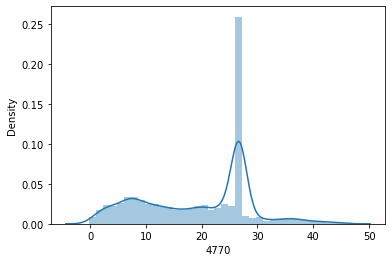

In [159]:
print(sns.distplot(df3['4770']))

AxesSubplot(0.125,0.125;0.775x0.755)


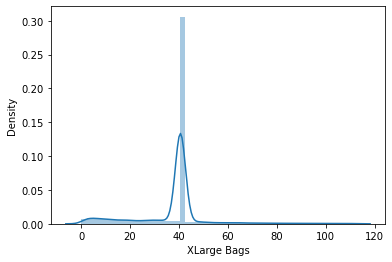

In [160]:
print(sns.distplot(df3['XLarge Bags']))

### Using Standard Scaler

In [161]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [162]:
x=sc.fit_transform(x)
x

array([[-0.56794098, -1.40994356,  0.22139772, -1.01822434, -1.21091493,
        -2.01089139],
       [-0.5902103 , -1.37161008,  0.22139772, -1.01822434, -1.21091493,
        -2.01089139],
       [-0.61260861, -1.19515493,  0.22139772, -1.01822434, -1.21091493,
        -2.01089139],
       ...,
       [ 1.4122606 , -0.72446471,  0.22139772,  0.98210184,  1.97826728,
         1.57822121],
       [ 1.39629767, -0.72486879,  0.22139772,  0.98210184,  1.97826728,
         1.57822121],
       [ 1.38030514, -1.06131478,  0.22139772,  0.98210184,  1.97826728,
         1.57822121]])

In [163]:
x.shape

(17665, 6)

In [164]:
x.mean()

-4.290474109693972e-18

In [165]:
x.std()

1.0

<AxesSubplot:ylabel='Density'>

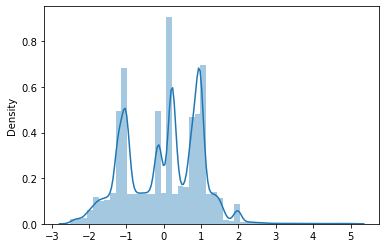

In [166]:
sns.distplot(x)

##### Now,almost our features is normally distributed as we have got the mean almost as zero and standard deviation=1 i.e. data is fully transformed in b/w 0-1

In [167]:
y=df3['AveragePrice']
y

0        1.33
1        1.35
2        0.93
3        1.08
4        1.28
         ... 
18244    1.63
18245    1.71
18246    1.87
18247    1.93
18248    1.62
Name: AveragePrice, Length: 17665, dtype: float64

### Training_Testing Phase

##### I am going to train 70% of the data and testing size would be 30%

##### first will try to find out the best value for random_state

In [168]:
#importing machine learning libraries for regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
lr=LinearRegression()

In [169]:
#will finding best value of random_state
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr.fit(x_train,y_train)
    train_pred=lr.predict(x_train)
    test_pred=lr.predict(x_test)
    if(r2_score(train_pred,y_train))==(r2_score(test_pred,y_test)):
        print(f'At Random_State {i} the training accuracy and testing accuracy both are same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'The Mean Absolute Error is(MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is(MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error(RMSE) is- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')
    else:
        print(f'At Random_State {i} the training accuracy and testing accuracy both are not same')
        print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
        print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
        print(f'\nThe Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
        print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
        print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
        print('\n')

At Random_State 0 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.4171273213468176
Testing Accuracy is -0.3500933124818373

The Mean Absolute Error is (MAE)- 0.22554393644652365
The Mean Squared Error is (MSE)- 0.08383793882788809
The Root Mean Squared Error is (RMSE)- 0.28954781786069134


At Random_State 1 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.38144511764686784
Testing Accuracy is -0.4022359202278454

The Mean Absolute Error is (MAE)- 0.23120522725701123
The Mean Squared Error is (MSE)- 0.08758874737249735
The Root Mean Squared Error is (RMSE)- 0.2959539615759474


At Random_State 2 the training accuracy and testing accuracy both are not same
Training Accuracy is -0.4006045704285457
Testing Accuracy is -0.3654070968073533

The Mean Absolute Error is (MAE)- 0.22811992629303482
The Mean Squared Error is (MSE)- 0.08556593243234492
The Root Mean Squared Error is (RMSE)- 0.2925165506981527


At Random_Stat

In [170]:
#Traing the Linear Regression Model at Random_State 33
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)
lr.fit(x_train,y_train)
train_pred=lr.predict(x_train)
test_pred=lr.predict(x_test)
print(f'Training Accuracy is {r2_score(train_pred,y_train)}')
print(f'Testing Accuracy is {r2_score(test_pred,y_test)}')
print('\nError in the model is calculated below-\n')
print(f'The Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')

Training Accuracy is -0.3631105660095475
Testing Accuracy is -0.39227880550439354

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2312897197395988
The Mean Squared Error is (MSE)- 0.08809704583979773
The Root Mean Squared Error is (RMSE)- 0.2968114651420961


At random_state 33 i'm getting training and testing score of accuracy as unequal and negative and which indicates that the linear regression model is not working perfectly for predicting the average price of Avacado. But RMSE error is approx 0 which is good.Now what i will do is try to check other model as well and if every models perform like this model then i might have done something wrong while doing data cleansing technique. Let's finds out the best model for the same.

### Drwaing Linear Regression Line

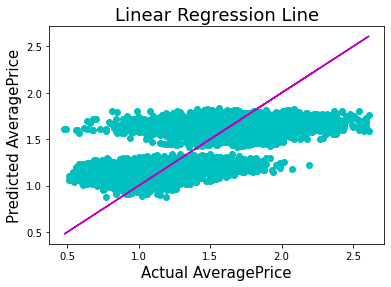

In [171]:
plt.scatter(y_test,test_pred,color='c')
plt.plot(y_test,y_test,color='m')
plt.xlabel("Actual AveragePrice",fontsize=15)
plt.ylabel("Predicted AveragePrice",fontsize=15)
plt.title("Linear Regression Line",fontsize=18)
plt.show()

As we can clearly see that the above line is not containg much points at all as there is distribution happening but it's happening in left and right side of line only ergo this can't be the best fitted line of the model. Hence this model is not working good for predicting the same.

### Finding Out CV Score

In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
for n in range(2,12):
    cvscore=cross_val_score(lr,x,y,cv=n)
    mean=cvscore.mean()
    std=cvscore.std()
    print(f'At K-Fold {n} The CV Score Linear Regression Model is {mean*100} and Standard Deviation is {std}')
    print('\n')

At K-Fold 2 The CV Score Linear Regression Model is -131.1175350564803 and Standard Deviation is 1.1544513927799886


At K-Fold 3 The CV Score Linear Regression Model is -4.352610174390606 and Standard Deviation is 0.18646730643753587


At K-Fold 4 The CV Score Linear Regression Model is -6.8700072655812185 and Standard Deviation is 0.09872685430546199


At K-Fold 5 The CV Score Linear Regression Model is 4.648523788088155 and Standard Deviation is 0.15897428233885327


At K-Fold 6 The CV Score Linear Regression Model is -7.53133508425023 and Standard Deviation is 0.18328230349027094


At K-Fold 7 The CV Score Linear Regression Model is -0.5363194808037756 and Standard Deviation is 0.18434623453079768


At K-Fold 8 The CV Score Linear Regression Model is -3.5229906612808892 and Standard Deviation is 0.15831911785143138


At K-Fold 9 The CV Score Linear Regression Model is -0.9110785506121247 and Standard Deviation is 0.1838651635000871


At K-Fold 10 The CV Score Linear Regression Mode

See,as there are lots of rows are present in the dataset hence linear regression model is not seems perfect model for predicting the same as its CV Score is also coming very less,hence will try to find out cv score of all other model and lets see if i'm getting good accuracy.

In [174]:
#importing other libraries
from sklearn.linear_model import Lasso,Ridge,ElasticNet,SGDRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
ls=Lasso()
rd=Ridge()
sgd=SGDRegressor()
en=ElasticNet()
rf=RandomForestRegressor()
ad=AdaBoostRegressor()
grd=GradientBoostingRegressor()

In [175]:
#creating a definition to expand the model individually
def model(m,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=33)
    m.fit(x_train,y_train)
    train_pred=m.predict(x_train)
    test_pred=m.predict(x_test)
    print(f'Training Accuracy of model {m} is {r2_score(train_pred,y_train)}')
    print(f'Testing Accuracy of model {m} is {r2_score(test_pred,y_test)}')
    print('\nError in the model is calculated below-\n')
    print(f'The Mean Absolute Error is (MAE)- {mean_absolute_error(test_pred,y_test)}')
    print(f'The Mean Squared Error is (MSE)- {mean_squared_error(test_pred,y_test)}')
    print(f'The Root Mean Squared Error is (RMSE)- {np.sqrt(mean_squared_error(test_pred,y_test))}')
    print('\n')
    print('Finding out the best K-Fold Value')
    print('\n\t')
    for j in range(2,12):
        cvs=cross_val_score(m,x,y,cv=j)
        cvs.mean()
        cvs.std()
        print(f'At K-Fold {j} the CV Score of model {m} is {cvs.mean()*100} & std is {cvs.std()}')
        print('\n')

In [176]:
model(lr,x,y)

Training Accuracy of model LinearRegression() is -0.3631105660095475
Testing Accuracy of model LinearRegression() is -0.39227880550439354

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2312897197395988
The Mean Squared Error is (MSE)- 0.08809704583979773
The Root Mean Squared Error is (RMSE)- 0.2968114651420961


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is -131.1175350564803 & std is 1.1544513927799886


At K-Fold 3 the CV Score of model LinearRegression() is -4.352610174390606 & std is 0.18646730643753587


At K-Fold 4 the CV Score of model LinearRegression() is -6.8700072655812185 & std is 0.09872685430546199


At K-Fold 5 the CV Score of model LinearRegression() is 4.648523788088155 & std is 0.15897428233885327


At K-Fold 6 the CV Score of model LinearRegression() is -7.53133508425023 & std is 0.18328230349027094


At K-Fold 7 the CV Score of model LinearRegression() is -0.5363194808037756 & std is 0.18

In [177]:
model(rd,x,y)

Training Accuracy of model Ridge() is -0.36342497378706606
Testing Accuracy of model Ridge() is -0.39257808299875996

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.23128745017917465
The Mean Squared Error is (MSE)- 0.08809665611393622
The Root Mean Squared Error is (RMSE)- 0.2968108086204682


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge() is -167.51961368102957 & std is 1.520821089125069


At K-Fold 3 the CV Score of model Ridge() is -4.352900647280563 & std is 0.1864309712183425


At K-Fold 4 the CV Score of model Ridge() is -6.8651686917743096 & std is 0.09874592885289024


At K-Fold 5 the CV Score of model Ridge() is 4.651521111989423 & std is 0.15891390088139395


At K-Fold 6 the CV Score of model Ridge() is -7.524058062152202 & std is 0.18321906141614117


At K-Fold 7 the CV Score of model Ridge() is -0.5300695919005457 & std is 0.18423026656971295


At K-Fold 8 the CV Score of model Ridge() is -3.5170828071744737 & s

In [178]:
model(sgd,x,y)

Training Accuracy of model SGDRegressor() is -0.3384253591583175
Testing Accuracy of model SGDRegressor() is -0.3728988344871733

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.23196264262263958
The Mean Squared Error is (MSE)- 0.08850221924165674
The Root Mean Squared Error is (RMSE)- 0.2974932255390982


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor() is -862.7594669145395 & std is 8.598310768491373


At K-Fold 3 the CV Score of model SGDRegressor() is -4.612403557165282 & std is 0.20006122155234388


At K-Fold 4 the CV Score of model SGDRegressor() is -6.223642991610917 & std is 0.08572828507145522


At K-Fold 5 the CV Score of model SGDRegressor() is 4.7076775621264755 & std is 0.16655777571432584


At K-Fold 6 the CV Score of model SGDRegressor() is -8.050248811617815 & std is 0.18173045601478013


At K-Fold 7 the CV Score of model SGDRegressor() is -0.4657311260622997 & std is 0.1793502674268013


At K-Fold 8 the

In [179]:
model(en,x,y)

Training Accuracy of model ElasticNet() is -3.02829842107693e+30
Testing Accuracy of model ElasticNet() is -2.9950692506308864e+30

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.3123333303832333
The Mean Squared Error is (MSE)- 0.14766831501576866
The Root Mean Squared Error is (RMSE)- 0.3842763524024978


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet() is -234.24243913063867 & std is 0.49807736330592434


At K-Fold 3 the CV Score of model ElasticNet() is -133.90733297094508 & std is 1.3134544687281795


At K-Fold 4 the CV Score of model ElasticNet() is -144.80125910010253 & std is 1.2846260443348165


At K-Fold 5 the CV Score of model ElasticNet() is -115.85337890670257 & std is 1.3679441689031349


At K-Fold 6 the CV Score of model ElasticNet() is -133.05085900453955 & std is 1.3739996551329134


At K-Fold 7 the CV Score of model ElasticNet() is -127.43617720285536 & std is 1.6208120327543845


At K-Fold 8 the CV Scor

In [180]:
model(rf,x,y)

Training Accuracy of model RandomForestRegressor() is 0.9756533243880182
Testing Accuracy of model RandomForestRegressor() is 0.7987264365026396

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.10788379245283015
The Mean Squared Error is (MSE)- 0.02397836634528301
The Root Mean Squared Error is (RMSE)- 0.1548494957863377


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor() is -228.81987609645566 & std is 0.9115025359233029


At K-Fold 3 the CV Score of model RandomForestRegressor() is 4.723472277522119 & std is 0.20491572546979903


At K-Fold 4 the CV Score of model RandomForestRegressor() is -51.977874311255015 & std is 0.40107822019466227


At K-Fold 5 the CV Score of model RandomForestRegressor() is 11.779612967999443 & std is 0.21785699824136176


At K-Fold 6 the CV Score of model RandomForestRegressor() is 10.872110134996754 & std is 0.24117170176460176


At K-Fold 7 the CV Score of model RandomForestRegresso

In [181]:
model(ad,x,y)

Training Accuracy of model AdaBoostRegressor() is -0.07220962156705601
Testing Accuracy of model AdaBoostRegressor() is -0.1037420005466303

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.21446974610417074
The Mean Squared Error is (MSE)- 0.07588976296323077
The Root Mean Squared Error is (RMSE)- 0.27548096660791427


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is -206.89426904085875 & std is 0.5517534369751136


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 18.48202539698982 & std is 0.11404868508139471


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 2.6335036427685754 & std is 0.02610113407387489


At K-Fold 5 the CV Score of model AdaBoostRegressor() is 12.937402507544347 & std is 0.16822638670455617


At K-Fold 6 the CV Score of model AdaBoostRegressor() is 4.4940155146786305 & std is 0.14076820874778728


At K-Fold 7 the CV Score of model AdaBoostRegressor() is 4.898357446962619 & st

In [182]:
model(grd,x,y)

Training Accuracy of model GradientBoostingRegressor() is 0.42520697148556375
Testing Accuracy of model GradientBoostingRegressor() is 0.38191159938426367

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.16731834272530494
The Mean Squared Error is (MSE)- 0.04945934854975972
The Root Mean Squared Error is (RMSE)- 0.22239457850801966


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor() is -184.73693183545126 & std is 1.2412864211050283


At K-Fold 3 the CV Score of model GradientBoostingRegressor() is 35.11340569090708 & std is 0.08751728187739306


At K-Fold 4 the CV Score of model GradientBoostingRegressor() is 25.839080851800183 & std is 0.10739361577241449


At K-Fold 5 the CV Score of model GradientBoostingRegressor() is 39.085279462765826 & std is 0.14575101286235573


At K-Fold 6 the CV Score of model GradientBoostingRegressor() is 30.09562422609504 & std is 0.2051103389479991


At K-Fold 7 the CV Score o

In [183]:
model(ls,x,y)

Training Accuracy of model Lasso() is -3.02829842107693e+30
Testing Accuracy of model Lasso() is -2.9950692506308864e+30

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.3123333303832333
The Mean Squared Error is (MSE)- 0.14766831501576866
The Root Mean Squared Error is (RMSE)- 0.3842763524024978


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso() is -234.24243913063867 & std is 0.49807736330592434


At K-Fold 3 the CV Score of model Lasso() is -133.90733297094508 & std is 1.3134544687281795


At K-Fold 4 the CV Score of model Lasso() is -144.80125910010253 & std is 1.2846260443348165


At K-Fold 5 the CV Score of model Lasso() is -115.85337890670257 & std is 1.3679441689031349


At K-Fold 6 the CV Score of model Lasso() is -133.05085900453955 & std is 1.3739996551329134


At K-Fold 7 the CV Score of model Lasso() is -127.43617720285536 & std is 1.6208120327543845


At K-Fold 8 the CV Score of model Lasso() is -124.0214249239852

### Hyper Parameter Tuning

##### To make the model more accurate by providing their best parameters

In [184]:
from sklearn.model_selection import GridSearchCV

In [185]:
#defining all the parameters of the respective models
dict_ls={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rd={'alpha':[.0001,.001,.01,.1,1,10],'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg','sag', 'saga', 'lbfgs']}
dict_en={'alpha':[.0001,.001,.01,.1,1,10],'selection':['cyclic', 'random']}
dict_rf={'criterion' : ["squared_error", "absolute_error", "poisson"],'max_features':["sqrt", "log2", None]}
dict_ad={'loss':['linear', 'square', 'exponential']}
dict_grd={'loss':['squared_error', 'absolute_error', 'huber', 'quantile'],'criterion':['friedman_mse', 'squared_error', 'mse'],'max_features':['auto', 'sqrt', 'log2']}
dict_sgd={'alpha':[.0001,.001,.01,.1,1,10],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant', 'optimal', 'invscaling','adaptive']}

In [186]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def Hyper_Parameter_Tuning(machine,dictionary):
    grd=GridSearchCV(machine,dictionary)
    grd.fit(x,y)
    print(f'The best Parameters of the model {machine} are {grd.best_params_}')

In [187]:
Hyper_Parameter_Tuning(ls,dict_ls)

The best Parameters of the model Lasso() are {'alpha': 0.001, 'selection': 'random'}


In [188]:
Hyper_Parameter_Tuning(rd,dict_rd)

The best Parameters of the model Ridge() are {'alpha': 10, 'solver': 'lsqr'}


In [192]:
Hyper_Parameter_Tuning(en,dict_en)

The best Parameters of the model ElasticNet() are {'alpha': 0.001, 'selection': 'cyclic'}


In [193]:
Hyper_Parameter_Tuning(rf,dict_rf)

The best Parameters of the model RandomForestRegressor() are {'criterion': 'absolute_error', 'max_features': None}


In [194]:
Hyper_Parameter_Tuning(ad,dict_ad)

The best Parameters of the model AdaBoostRegressor() are {'loss': 'linear'}


In [195]:
Hyper_Parameter_Tuning(grd,dict_grd)

The best Parameters of the model GradientBoostingRegressor() are {'criterion': 'friedman_mse', 'loss': 'squared_error', 'max_features': 'auto'}


In [196]:
Hyper_Parameter_Tuning(sgd,dict_sgd)

The best Parameters of the model SGDRegressor() are {'alpha': 0.0001, 'learning_rate': 'optimal', 'penalty': 'l1'}


In [206]:
#Redefining the models after getting the parameters
ls=Lasso(alpha=0.001,selection='random')
rd=Ridge(alpha=10,solver='lsqr')
en=ElasticNet(alpha=0.001,selection='cyclic')
rf=RandomForestRegressor(criterion='absolute_error',max_features=None)
ad=AdaBoostRegressor(loss='linear')
grd=GradientBoostingRegressor(criterion='friedman_mse',loss='squared_error',max_features='auto')
sgd=SGDRegressor(alpha=0.0001,learning_rate='optimal',penalty='l1')

In [198]:
#1st model
model(lr,x,y)

Training Accuracy of model LinearRegression() is -0.3631105660095475
Testing Accuracy of model LinearRegression() is -0.39227880550439354

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2312897197395988
The Mean Squared Error is (MSE)- 0.08809704583979773
The Root Mean Squared Error is (RMSE)- 0.2968114651420961


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model LinearRegression() is -131.1175350564803 & std is 1.1544513927799886


At K-Fold 3 the CV Score of model LinearRegression() is -4.352610174390606 & std is 0.18646730643753587


At K-Fold 4 the CV Score of model LinearRegression() is -6.8700072655812185 & std is 0.09872685430546199


At K-Fold 5 the CV Score of model LinearRegression() is 4.648523788088155 & std is 0.15897428233885327


At K-Fold 6 the CV Score of model LinearRegression() is -7.53133508425023 & std is 0.18328230349027094


At K-Fold 7 the CV Score of model LinearRegression() is -0.5363194808037756 & std is 0.18

In [199]:
#2nd model
model(ls,x,y)

Training Accuracy of model Lasso(alpha=0.001, selection='random') is -0.38727426785515084
Testing Accuracy of model Lasso(alpha=0.001, selection='random') is -0.41525766633390715

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.231247204741288
The Mean Squared Error is (MSE)- 0.08812542432688082
The Root Mean Squared Error is (RMSE)- 0.2968592668704833


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Lasso(alpha=0.001, selection='random') is -158.87311572734072 & std is 1.48933367958383


At K-Fold 3 the CV Score of model Lasso(alpha=0.001, selection='random') is -4.693687584755734 & std is 0.18392781652199955


At K-Fold 4 the CV Score of model Lasso(alpha=0.001, selection='random') is -6.532346716195297 & std is 0.09691766425321505


At K-Fold 5 the CV Score of model Lasso(alpha=0.001, selection='random') is 4.762431276457968 & std is 0.15226688196530944


At K-Fold 6 the CV Score of model Lasso(alpha=0.001, selection='random') is 

In [200]:
#3rd model
model(rd,x,y)

Training Accuracy of model Ridge(alpha=10, solver='lsqr') is -0.3662458982469068
Testing Accuracy of model Ridge(alpha=10, solver='lsqr') is -0.39526379611370777

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.2312673936090347
The Mean Squared Error is (MSE)- 0.0880934669242301
The Root Mean Squared Error is (RMSE)- 0.2968054361433262


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model Ridge(alpha=10, solver='lsqr') is -167.10965234935162 & std is 1.5385909253118435


At K-Fold 3 the CV Score of model Ridge(alpha=10, solver='lsqr') is -4.340689017357013 & std is 0.18633649075944192


At K-Fold 4 the CV Score of model Ridge(alpha=10, solver='lsqr') is -6.823137484939373 & std is 0.09893112998784946


At K-Fold 5 the CV Score of model Ridge(alpha=10, solver='lsqr') is 4.678043765364263 & std is 0.15839271437855035


At K-Fold 6 the CV Score of model Ridge(alpha=10, solver='lsqr') is -7.460123789508133 & std is 0.18266720776960516


At K-

In [201]:
#4th model
model(en,x,y)

Training Accuracy of model ElasticNet(alpha=0.001) is -0.3770771202322081
Testing Accuracy of model ElasticNet(alpha=0.001) is -0.4055786319642569

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.23124100549318546
The Mean Squared Error is (MSE)- 0.08810202980887517
The Root Mean Squared Error is (RMSE)- 0.29681986087335055


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model ElasticNet(alpha=0.001) is -162.50484743221932 & std is 1.5076205195812211


At K-Fold 3 the CV Score of model ElasticNet(alpha=0.001) is -4.5147693195079945 & std is 0.18498848784832614


At K-Fold 4 the CV Score of model ElasticNet(alpha=0.001) is -6.652097138594618 & std is 0.09797551953391216


At K-Fold 5 the CV Score of model ElasticNet(alpha=0.001) is 4.736861837187136 & std is 0.15518146722740164


At K-Fold 6 the CV Score of model ElasticNet(alpha=0.001) is -7.15728224440455 & std is 0.18019623808006838


At K-Fold 7 the CV Score of model ElasticNet(alpha=0

In [202]:
#5th model
model(rf,x,y)

Training Accuracy of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 0.9714875573338734
Testing Accuracy of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 0.7892618391818984

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.10987701886792452
The Mean Squared Error is (MSE)- 0.024553826405660374
The Root Mean Squared Error is (RMSE)- 0.1566966062352991


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model RandomForestRegressor(criterion='absolute_error', max_features=None) is -233.60777428754426 & std is 0.9525448249044011


At K-Fold 3 the CV Score of model RandomForestRegressor(criterion='absolute_error', max_features=None) is 10.35643419287529 & std is 0.17943172281521405


At K-Fold 4 the CV Score of model RandomForestRegressor(criterion='absolute_error', max_features=None) is -96.69065825485357 & std is 1.032842291874274


At K-Fold 5 the CV Score of model RandomForestRegress

In [207]:
#6th model
model(ad,x,y)

Training Accuracy of model AdaBoostRegressor() is -0.09399700763252583
Testing Accuracy of model AdaBoostRegressor() is -0.11244972565290445

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.21300417020993748
The Mean Squared Error is (MSE)- 0.07539820318881445
The Root Mean Squared Error is (RMSE)- 0.27458733253523265


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model AdaBoostRegressor() is -210.56910538708405 & std is 0.6223662065812559


At K-Fold 3 the CV Score of model AdaBoostRegressor() is 19.307442902799245 & std is 0.11059606093999107


At K-Fold 4 the CV Score of model AdaBoostRegressor() is 4.744509051683857 & std is 0.03948895665547106


At K-Fold 5 the CV Score of model AdaBoostRegressor() is 13.334536338839234 & std is 0.12721896722926698


At K-Fold 6 the CV Score of model AdaBoostRegressor() is 9.084808478037372 & std is 0.11235556321172514


At K-Fold 7 the CV Score of model AdaBoostRegressor() is 4.167848687245133 & st

In [208]:
#7th model
model(grd,x,y)

Training Accuracy of model GradientBoostingRegressor(max_features='auto') is 0.42520697148556375
Testing Accuracy of model GradientBoostingRegressor(max_features='auto') is 0.38191159938426344

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.16731834272530494
The Mean Squared Error is (MSE)- 0.04945934854975973
The Root Mean Squared Error is (RMSE)- 0.2223945785080197


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model GradientBoostingRegressor(max_features='auto') is -184.79518339953822 & std is 1.241868936745898


At K-Fold 3 the CV Score of model GradientBoostingRegressor(max_features='auto') is 35.11425527261491 & std is 0.08752018374292474


At K-Fold 4 the CV Score of model GradientBoostingRegressor(max_features='auto') is 25.83647065076322 & std is 0.10736887195043311


At K-Fold 5 the CV Score of model GradientBoostingRegressor(max_features='auto') is 39.08602597740108 & std is 0.14573098303324605


At K-Fold 6 the CV Score of m

In [209]:
#8th model
model(sgd,x,y)

Training Accuracy of model SGDRegressor(learning_rate='optimal', penalty='l1') is -1.0865656950067715
Testing Accuracy of model SGDRegressor(learning_rate='optimal', penalty='l1') is -1.1180766888583706

Error in the model is calculated below-

The Mean Absolute Error is (MAE)- 0.24168858118624312
The Mean Squared Error is (MSE)- 0.09502731799906913
The Root Mean Squared Error is (RMSE)- 0.3082650126093929


Finding out the best K-Fold Value

	
At K-Fold 2 the CV Score of model SGDRegressor(learning_rate='optimal', penalty='l1') is -162.82099032204914 & std is 1.5265965260258916


At K-Fold 3 the CV Score of model SGDRegressor(learning_rate='optimal', penalty='l1') is -34.08002254347824 & std is 0.21914758772435902


At K-Fold 4 the CV Score of model SGDRegressor(learning_rate='optimal', penalty='l1') is -17.143107473268458 & std is 0.25858012549058285


At K-Fold 5 the CV Score of model SGDRegressor(learning_rate='optimal', penalty='l1') is 1.2701402051689992 & std is 0.16231024507532

#### While doing all the model building and models comparision i must say that Random Forest Regressor method has performed really well as compare to other models.It gives the training accuracy of 97% and the testing accuracy of 79% which is really good performance acheive by model though there were lots of rows present.Also, the RMSE error is 0.15 which is minimum unlike others.The CV score of the model is 19% which tells us that we have not able to generalize the model but still testing accuracy is acheived as 79%.
##### GradientBoosting Regressor is the second top model after RandomForestRegressor having training accuracy as 42%,testing accuracy as 38%,CV score as 39% and RMSE is- 0.2. Here testing score and Cv score are same.

### Saving the Best Model

In [210]:
import joblib

#### 1st best model(RandomForestRegressor)

In [225]:
file='Avacd.obj'
joblib.dump(rf,file)

['Avacd.obj']

#### Loading the Modle

In [226]:
b=joblib.load('Avacd.obj')
b

RandomForestRegressor(criterion='absolute_error', max_features=None)

#### 2nd best model(GradientBoostingRegressor)

In [215]:
file='Avacado.obj'
joblib.dump(grd,file)

['Avacado.obj']

#### Loading the Modle

In [216]:
a=joblib.load('Avacado.obj')
a

GradientBoostingRegressor(max_features='auto')

In [217]:
pred=a.predict(x_test)
pred

array([1.33479504, 1.70959789, 2.04882427, ..., 1.26519301, 1.23730592,
       1.62847167])

In [218]:
#Accuracy of GradientBoosting Regressor
Accuracy_Score=r2_score(pred,y_test)
Accuracy_Score

0.38191159938426344

In [223]:
conclusion=pd.DataFrame(a.predict(x_test),y_test)
conclusion

0
AveragePrice          
1.44          1.334795
1.50          1.709598
1.72          2.048824
1.68          1.666064
1.68          1.612734
...                ...
1.79          1.726158
0.76          0.920714
1.70          1.265193
1.38          1.237306
2.26          1.628472

[5300 rows x 1 columns]

It indicates that predictions are close

### B): Classification Model Building(predict Region)

##### Since i've already normalize the dataframe while doing the EDA in regression part by applying encoder,replacing all the zero's with mean.So will consider the same datafram going forward and one more thing i'll be using the Principal Components Analysis for the removal of dimensions rather than removing it by correlation or multicollinearity technique.So let's start now

In [11]:
df

Date  AveragePrice  Total Volume     4046       4225          4770  \
0        51          1.33      64236.62  1036.74   54454.85     48.160000   
1        50          1.35      54876.98   674.28   44638.81     58.330000   
2        49          0.93     118220.22   794.70  109149.67    130.500000   
3        48          1.08      78992.15  1132.00   71976.41     72.580000   
4        47          1.28      51039.60   941.48   43838.39     75.780000   
...     ...           ...           ...      ...        ...           ...   
18244   161          1.63      17074.83  2046.96    1529.20  22839.735993   
18245   160          1.71      13888.04  1191.70    3431.50  22839.735993   
18246   159          1.87      13766.76  1191.92    2452.79    727.940000   
18247   158          1.93      16205.22  1527.63    2981.04    727.010000   
18248   157          1.62      17489.58  2894.77    2356.13    224.530000   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25  3106.426507     0  2015       0  
1         9505.56     9408.07       97.49  3106.426507     0  2015       0  
2         8145.35     8042.21      103.14  3106.426507     0  2015       0  
3         5811.16     5677.40      133.76  3106.426507     0  2015       0  
4         6183.95     5986.26      197.69  3106.426507     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
18244    13498.67    13066.82      431.85  3106.426507     1  2018      53  
18245     9264.84     8940.04      324.80  3106.426507     1  2018      53  
18246     9394.11     9351.80       42.31  3106.426507     1  2018      53  
18247    10969.54    10919.54       50.00  3106.426507     1  2018      53  
18248    12014.15    11988.14       26.01  3106.426507     1  2018      53  

[18249 rows x 13 columns]

#### Checking Outliers and Removing it

In [12]:
z1=np.abs(zscore(df))
np.where(z1>3)

(array([  346,   359,   780, ..., 17304, 17402, 17428], dtype=int64),
 array([3, 3, 9, ..., 1, 1, 1], dtype=int64))

In [13]:
z1.iloc[346][3]

3.1974917269513115

In [14]:
df1=df[(z1<3).all(axis=1)]
df1

Date  AveragePrice  Total Volume     4046       4225          4770  \
0        51          1.33      64236.62  1036.74   54454.85     48.160000   
1        50          1.35      54876.98   674.28   44638.81     58.330000   
2        49          0.93     118220.22   794.70  109149.67    130.500000   
3        48          1.08      78992.15  1132.00   71976.41     72.580000   
4        47          1.28      51039.60   941.48   43838.39     75.780000   
...     ...           ...           ...      ...        ...           ...   
18244   161          1.63      17074.83  2046.96    1529.20  22839.735993   
18245   160          1.71      13888.04  1191.70    3431.50  22839.735993   
18246   159          1.87      13766.76  1191.92    2452.79    727.940000   
18247   158          1.93      16205.22  1527.63    2981.04    727.010000   
18248   157          1.62      17489.58  2894.77    2356.13    224.530000   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  region  
0         8696.87     8603.62       93.25  3106.426507     0  2015       0  
1         9505.56     9408.07       97.49  3106.426507     0  2015       0  
2         8145.35     8042.21      103.14  3106.426507     0  2015       0  
3         5811.16     5677.40      133.76  3106.426507     0  2015       0  
4         6183.95     5986.26      197.69  3106.426507     0  2015       0  
...           ...         ...         ...          ...   ...   ...     ...  
18244    13498.67    13066.82      431.85  3106.426507     1  2018      53  
18245     9264.84     8940.04      324.80  3106.426507     1  2018      53  
18246     9394.11     9351.80       42.31  3106.426507     1  2018      53  
18247    10969.54    10919.54       50.00  3106.426507     1  2018      53  
18248    12014.15    11988.14       26.01  3106.426507     1  2018      53  

[17665 rows x 13 columns]

In [15]:
percentage_loss=(18249-17665)*100/18249
percentage_loss

3.200175352074086

Will consider the outliers removal as only 3% of data been lost.

#### Skewness Removal

In [16]:
df1.skew().sort_values()

type           -0.036126
region          0.013290
Date            0.013368
year            0.229600
AveragePrice    0.378326
Total Volume    3.752409
Total Bags      4.048569
Small Bags      4.198751
4225            4.428792
4770            4.843557
4046            4.860146
Large Bags      4.879193
XLarge Bags     6.279517
dtype: float64

#### Boxcox Method of Skewness Removal

In [17]:
l=['Total Volume','Total Bags','Small Bags','4225','4770','4046','Large Bags','XLarge Bags']
for i in l:
    df1[i]=scipy.stats.boxcox(df1[i])[0]

In [18]:
df1.skew().sort_values()

4770           -0.177274
Large Bags     -0.100641
4225           -0.045629
4046           -0.038278
type           -0.036126
Small Bags     -0.033599
Total Bags     -0.023929
Total Volume   -0.008477
region          0.013290
Date            0.013368
year            0.229600
XLarge Bags     0.313396
AveragePrice    0.378326
dtype: float64

In [19]:
#feature
x=df1.drop('region',axis=1)
x

Date  AveragePrice  Total Volume      4046       4225       4770  \
0        51          1.33     11.843666  8.267135  17.689295   5.496314   
1        50          1.35     11.663855  7.669475  17.204223   5.874206   
2        49          0.93     12.543375  7.896281  19.450240   7.605172   
3        48          1.08     12.080283  8.390814  18.383648   6.320723   
4        47          1.28     11.581197  8.132137  17.160462   6.410853   
...     ...           ...           ...       ...        ...        ...   
18244   161          1.63     10.341408  9.238251  10.076785  26.698749   
18245   160          1.71     10.109346  8.463371  11.607995  26.698749   
18246   159          1.87     10.099505  8.463632  10.959457  12.203254   
18247   158          1.93     10.282633  8.816540  11.333996  12.199307   
18248   157          1.62     10.368406  9.745513  10.882999   8.913591   

       Total Bags  Small Bags  Large Bags  XLarge Bags  type  year  
0       12.263084   13.425036    6.123500    40.590399     0  2015  
1       12.421629   13.613250    6.202601    40.590399     0  2015  
2       12.146830   13.283856    6.303460    40.590399     0  2015  
3       11.555270   12.567588    6.778277    40.590399     0  2015  
4       11.663248   12.675243    7.521793    40.590399     0  2015  
...           ...         ...         ...          ...   ...   ...  
18244   13.055798   14.316919    9.123776    40.590399     1  2018  
18245   12.375799   13.505634    8.521335    40.590399     1  2018  
18246   12.400547   13.600575    4.789379    40.590399     1  2018  
18247   12.678945   13.930038    5.060313    40.590399     1  2018  
18248   12.843562   14.130534    4.031861    40.590399     1  2018  

[17665 rows x 12 columns]

In [20]:
#Target
y=df1.region
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 17665, dtype: int32

#### Normalize the data by StandardScaler

In [21]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [22]:
x=sc.fit_transform(x)
x

array([[-0.6653088 , -0.19470912, -0.07645959, ...,  0.22107884,
        -1.01822434, -1.21031372],
       [-0.68578653, -0.14286397, -0.14855827, ...,  0.22107884,
        -1.01822434, -1.21031372],
       [-0.70626426, -1.23161201,  0.20410145, ...,  0.22107884,
        -1.01822434, -1.21031372],
       ...,
       [ 1.54628582,  1.2051098 , -0.77581276, ...,  0.22107884,
         0.98210184,  1.98028349],
       [ 1.52580809,  1.36064523, -0.70238448, ...,  0.22107884,
         0.98210184,  1.98028349],
       [ 1.50533036,  0.55704549, -0.66799199, ...,  0.22107884,
         0.98210184,  1.98028349]])

In [23]:
x.mean()

3.5332054293329863e-15

In [24]:
x.std()

0.9999999999999999

<AxesSubplot:ylabel='Density'>

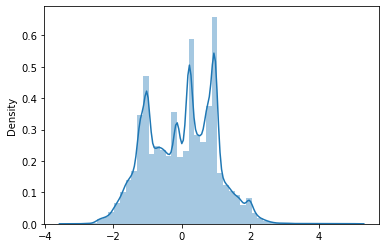

In [25]:
sns.distplot(x)

Data is normally distributed as we have got mean =0 and standard deviation=1

### PCA Technique

##### I'm using PCA technique in this classification model over correlation and multicollinearity model. Withthe help of Principle Component Analysis one can reduce the dimension of the dataset to a specific number. It's also known as curse of dimension reduction

In [26]:
from sklearn.decomposition import PCA

I want to convert all the 12 columns into 4 columns

In [27]:
pca=PCA(n_components=4)

In [28]:
x_pca=pca.fit_transform(x)
x_pca

array([[-0.53046159, -1.22859983, -1.28505292,  0.66308305],
       [-0.6170597 , -1.21974317, -1.25696044,  0.64783298],
       [-0.05333997, -1.48278332, -1.21974368,  0.25598741],
       ...,
       [-2.09629546,  2.80628729, -0.27331346, -0.04602103],
       [-1.9993015 ,  2.82365611, -0.24886888,  0.03166861],
       [-1.73210582,  2.71344309, -0.53439592, -0.00894599]])

In [29]:
x=x_pca
x

array([[-0.53046159, -1.22859983, -1.28505292,  0.66308305],
       [-0.6170597 , -1.21974317, -1.25696044,  0.64783298],
       [-0.05333997, -1.48278332, -1.21974368,  0.25598741],
       ...,
       [-2.09629546,  2.80628729, -0.27331346, -0.04602103],
       [-1.9993015 ,  2.82365611, -0.24886888,  0.03166861],
       [-1.73210582,  2.71344309, -0.53439592, -0.00894599]])

In [30]:
x.shape

(17665, 4)

In [31]:
y.shape

(17665,)

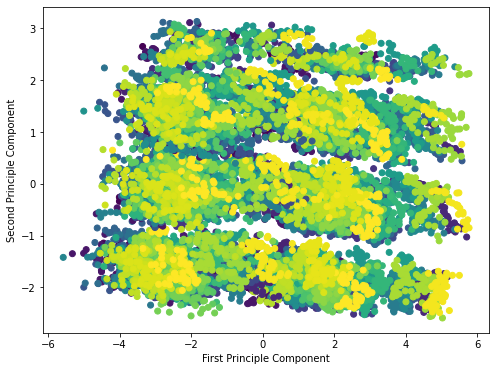

In [32]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0:1],x[:,1],c=y)
plt.xlabel('First Principle Component')
plt.ylabel('Second Principle Component')
plt.show()

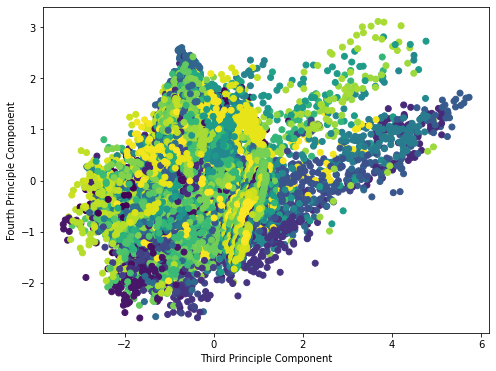

In [33]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,2:3],x[:,3],c=y)
plt.xlabel('Third Principle Component')
plt.ylabel('Fourth Principle Component')
plt.show()

From above both the figure we can say that data is still distributed really well.

#### Using IMBLearn Technique for balancing of Target class

In [34]:
y.value_counts()

0     338
16    338
49    338
44    338
39    338
38    338
35    338
34    338
32    338
30    338
26    338
23    338
19    338
18    338
27    338
8     338
2     338
13    338
12    338
11    338
4     338
5     338
10    338
9     338
20    337
1     337
28    337
33    336
41    336
40    336
14    336
50    336
31    335
24    335
22    334
25    333
48    333
21    333
53    332
7     332
17    331
36    330
3     329
37    328
47    328
43    326
29    325
46    308
42    301
45    294
6     293
15    276
52    257
51    169
Name: region, dtype: int64

We can clearly see that class of target variable region is imbalanced hence will make it equal for each class

In [43]:
!pip install -U imbalanced-learn

In [35]:
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)

In [36]:
y.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
52    338
53    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
51    338
Name: region, dtype: int64

We can now clearly see that the classes of target variable region is balanced.There are total 53 class are present and due to this we can't use Logistic Regression as well GaussianNB because these two supports only binary classes 0 & 1.

In [37]:
print(x.shape)
print(y.shape)

(18252, 4)
(18252,)


In [58]:
#importing machine learning libraries for classification model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
kn=KNeighborsClassifier()

In [59]:
#will finding best value of random_state
for h in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=h)
    kn.fit(x_train,y_train)
    pred_train=kn.predict(x_train)
    pred_test=kn.predict(x_test)
    if accuracy_score(pred_train,y_train) == accuracy_score(pred_test,y_test):
        print('At random_state',h,'the model perform very well')
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
    else:
        print('At random_state',h)
        print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
        print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
        print('\n')

At random_state 0
Training Accuracy Score is-  0.7240599958906924
Testing Accuracy Score is-  0.5803889345384826


At random_state 1
Training Accuracy Score is-  0.7219368536401616
Testing Accuracy Score is-  0.5762804711038072


At random_state 2
Training Accuracy Score is-  0.7204301075268817
Testing Accuracy Score is-  0.5864146809093399


At random_state 3
Training Accuracy Score is-  0.7200191767687145
Testing Accuracy Score is-  0.5825801150369762


At random_state 4
Training Accuracy Score is-  0.7213204575029107
Testing Accuracy Score is-  0.5866885784716516


At random_state 5
Training Accuracy Score is-  0.7202246421477981
Testing Accuracy Score is-  0.5869624760339633


At random_state 6
Training Accuracy Score is-  0.7237860420519142
Testing Accuracy Score is-  0.5823062174746645


At random_state 7
Training Accuracy Score is-  0.7245394151085542
Testing Accuracy Score is-  0.5688852369213914


At random_state 8
Training Accuracy Score is-  0.721868365180467
Testing Accurac

In [40]:
#Traing the Logistic Regression Model at Random_State 86
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=86)
kn.fit(x_train,y_train)
pred_train=kn.predict(x_train)
pred_test=kn.predict(x_test)
print('At random_state',86)
print('Training Accuracy Score is- ',accuracy_score(pred_train,y_train))
print('Testing Accuracy Score is- ',accuracy_score(pred_test,y_test))
print('\n')

At random_state 86
Training Accuracy Score is-  0.7174851037600164
Testing Accuracy Score is-  0.6001095590249247




KNeighborsClassifier model performs well but since training accuracy is more than testing accuracy hence there would be overfitting and due to this Bias will be on lower side and variance would be on higher side,also will check the cv score for each model going forward.

### Finding Out CV Score

In [41]:
from sklearn.model_selection import cross_val_score

In [42]:
for i in range(2,21):
    cvs=cross_val_score(kn,x,y,cv=i)
    print(f'At K-Fold {i} the CV Score of model is {cvs.mean()}')

At K-Fold 2 the CV Score of model is 0.09390751698444005
At K-Fold 3 the CV Score of model is 0.1804733727810651
At K-Fold 4 the CV Score of model is 0.19389655928117466
At K-Fold 5 the CV Score of model is 0.2367412343400007
At K-Fold 6 the CV Score of model is 0.22912557527942146
At K-Fold 7 the CV Score of model is 0.2948088885952907
At K-Fold 8 the CV Score of model is 0.30445099862792163
At K-Fold 9 the CV Score of model is 0.301829936445321
At K-Fold 10 the CV Score of model is 0.3237321790274423
At K-Fold 11 the CV Score of model is 0.3404381953261014
At K-Fold 12 the CV Score of model is 0.34960552268244577
At K-Fold 13 the CV Score of model is 0.3372781065088758
At K-Fold 14 the CV Score of model is 0.3595664340297419
At K-Fold 15 the CV Score of model is 0.3701389039052027
At K-Fold 16 the CV Score of model is 0.3650946288266679
At K-Fold 17 the CV Score of model is 0.390724713404238
At K-Fold 18 the CV Score of model is 0.3842318650010958
At K-Fold 19 the CV Score of model i

As we are increasing the fold size we are getting good CV score,so we can say that CV score is helping the model in generalizing and make it perform better while doing the prediction.

In [43]:
#importing other libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import SGDClassifier
dtc=DecisionTreeClassifier()
rfc=RandomForestClassifier()
ad=AdaBoostClassifier()
grd=GradientBoostingClassifier()
svc=SVC()
sgd=SGDClassifier()

In [44]:
#creating a definition to expand the model individually
def model(algorithm,x,y):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=86)
    algorithm.fit(x_train,y_train)
    pred_train_x=algorithm.predict(x_train)
    pred_test_y=algorithm.predict(x_test)
    print('For',algorithm)
    print('Training_Accuracy_Score=',accuracy_score(y_train,pred_train_x))
    print('Testing_Accuracy_Score=',accuracy_score(y_test,pred_test_y))
    for l in range(2,12):
        cvscore=cross_val_score(algorithm,x,y,cv=l)
        cv_accuracy_score=cvscore.mean()
        print(f'At the K-Fold {l} the CV score of model {algorithm} is {cv_accuracy_score}')
        print('\n')

#### Since Multiclass format is not applicable for AUC_ROC CURVE as it supports only two classes (0&1) hence will not plot Auc_Roc curve

In [176]:
model(dtc,x,y)

For DecisionTreeClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.48890714872637636
At the K-Fold 2 the CV score of model DecisionTreeClassifier() is 0.11374095989480605


At the K-Fold 3 the CV score of model DecisionTreeClassifier() is 0.2092373438527285


At the K-Fold 4 the CV score of model DecisionTreeClassifier() is 0.2175651983344291


At the K-Fold 5 the CV score of model DecisionTreeClassifier() is 0.24468576445560047


At the K-Fold 6 the CV score of model DecisionTreeClassifier() is 0.23997370151216302


At the K-Fold 7 the CV score of model DecisionTreeClassifier() is 0.27377538041415495


At the K-Fold 8 the CV score of model DecisionTreeClassifier() is 0.28555468698669534


At the K-Fold 9 the CV score of model DecisionTreeClassifier() is 0.2813390313390313


At the K-Fold 10 the CV score of model DecisionTreeClassifier() is 0.2906464012963435


At the K-Fold 11 the CV score of model DecisionTreeClassifier() is 0.3064254717373522




In [177]:
model(rfc,x,y)

For RandomForestClassifier()
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.6096959737058341
At the K-Fold 2 the CV score of model RandomForestClassifier() is 0.11445321060705677


At the K-Fold 3 the CV score of model RandomForestClassifier() is 0.24501424501424504


At the K-Fold 4 the CV score of model RandomForestClassifier() is 0.2775038351961429


At the K-Fold 5 the CV score of model RandomForestClassifier() is 0.3075278156106602


At the K-Fold 6 the CV score of model RandomForestClassifier() is 0.3046241507779969


At the K-Fold 7 the CV score of model RandomForestClassifier() is 0.34817509960206244


At the K-Fold 8 the CV score of model RandomForestClassifier() is 0.3615975731771933


At the K-Fold 9 the CV score of model RandomForestClassifier() is 0.3599057637519176


At the K-Fold 10 the CV score of model RandomForestClassifier() is 0.37320806013593605


At the K-Fold 11 the CV score of model RandomForestClassifier() is 0.3896982967213255




In [178]:
model(ad,x,y)

For AdaBoostClassifier()
Training_Accuracy_Score= 0.09191151291007466
Testing_Accuracy_Score= 0.0958641468090934
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.002739425816348893


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.058240192855577466


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.06344510190664036


At the K-Fold 5 the CV score of model AdaBoostClassifier() is 0.06525264986511484


At the K-Fold 6 the CV score of model AdaBoostClassifier() is 0.0527065527065527


At the K-Fold 7 the CV score of model AdaBoostClassifier() is 0.0690324614812073


At the K-Fold 8 the CV score of model AdaBoostClassifier() is 0.06914284676869971


At the K-Fold 9 the CV score of model AdaBoostClassifier() is 0.06284242822704361


At the K-Fold 10 the CV score of model AdaBoostClassifier() is 0.06821500697684887


At the K-Fold 11 the CV score of model AdaBoostClassifier() is 0.07779980682222562




In [180]:
model(sgd,x,y)

For SGDClassifier()
Training_Accuracy_Score= 0.04006574892130676
Testing_Accuracy_Score= 0.03834565872363736
At the K-Fold 2 the CV score of model SGDClassifier() is 0.02333990795529257


At the K-Fold 3 the CV score of model SGDClassifier() is 0.029257067718606183


At the K-Fold 4 the CV score of model SGDClassifier() is 0.02805172035941267


At the K-Fold 5 the CV score of model SGDClassifier() is 0.027448557910574323


At the K-Fold 6 the CV score of model SGDClassifier() is 0.033037475345167655


At the K-Fold 7 the CV score of model SGDClassifier() is 0.03429650485933005


At the K-Fold 8 the CV score of model SGDClassifier() is 0.030736779385089105


At the K-Fold 9 the CV score of model SGDClassifier() is 0.03309226386149463


At the K-Fold 10 the CV score of model SGDClassifier() is 0.03566727182703417


At the K-Fold 11 the CV score of model SGDClassifier() is 0.034296614371343674




In [183]:
model(svc,x,y)

For SVC()
Training_Accuracy_Score= 0.38223409355523597
Testing_Accuracy_Score= 0.3470282114489181
At the K-Fold 2 the CV score of model SVC() is 0.06897874205566513


At the K-Fold 3 the CV score of model SVC() is 0.1467784352399737


At the K-Fold 4 the CV score of model SVC() is 0.19515669515669515


At the K-Fold 5 the CV score of model SVC() is 0.2184391891131347


At the K-Fold 6 the CV score of model SVC() is 0.2089086127547666


At the K-Fold 7 the CV score of model SVC() is 0.2536636388513767


At the K-Fold 8 the CV score of model SVC() is 0.2720690267618681


At the K-Fold 9 the CV score of model SVC() is 0.26720359412667105


At the K-Fold 10 the CV score of model SVC() is 0.2720703386397395


At the K-Fold 11 the CV score of model SVC() is 0.286806307921147




#### Hyper Parameter Tuning

##### To make the model more accurate by providing their best parameters

In [45]:
from sklearn.model_selection import GridSearchCV

In [46]:
#defining all the parameters of the respective models
dict_SGD={'loss':['hinge', 'log_loss', 'log', 'modified_huber', 'squared_hinge','perceptron', 'squared_error', 'huber', 'epsilon_insensitive','squared_epsilon_insensitive'],'penalty':['l2', 'l1', 'elasticnet'],'learning_rate':['constant','adaptive','invscaling','optimal']}
dict_SVC={'gamma':['scale', 'auto'],'decision_function_shape':['ovo', 'ovr']}
dict_dtc={'criterion':["gini", "entropy", "log_loss"],'splitter':["best", "random"],'max_features':["auto", "sqrt", "log2"]}
dict_rfc={'criterion' : ["gini", "entropy", "log_loss"],'max_features':["sqrt", "log2", None]}
dict_ad={'algorithm':['SAMME', 'SAMME.R']}
dict_grd={'loss':['log_loss', 'deviance', 'exponential'],'criterion':['friedman_mse', 'squared_error', 'mse']}

In [47]:
#Now I'm defining a function so that i can individuallay let the model perfom and give the best parameter out of it.
def HPT(machine,dictionary):
    gd=GridSearchCV(machine,dictionary)
    gd.fit(x,y)
    print(f'The best Parameters of the model {machine} is {gd.best_params_}')

In [50]:
HPT(sgd,dict_SGD)

The best Parameters of the model SGDClassifier() is {'learning_rate': 'optimal', 'loss': 'log_loss', 'penalty': 'l1'}


In [51]:
HPT(dtc,dict_dtc)

The best Parameters of the model DecisionTreeClassifier() is {'criterion': 'entropy', 'max_features': 'log2', 'splitter': 'best'}


In [52]:
HPT(ad,dict_ad)

The best Parameters of the model AdaBoostClassifier() is {'algorithm': 'SAMME.R'}


In [55]:
HPT(svc,dict_SVC)

The best Parameters of the model SVC() is {'decision_function_shape': 'ovo', 'gamma': 'auto'}


In [60]:
HPT(rfc,dict_rfc)

The best Parameters of the model RandomForestClassifier() is {'criterion': 'log_loss', 'max_features': 'sqrt'}


In [48]:
#Redefining the models after getting the parameters
sgd=SGDClassifier(learning_rate='optimal',loss='log_loss',penalty='l1')
svc=SVC(decision_function_shape='ovo',gamma='auto')
dtc=DecisionTreeClassifier(criterion='entropy',max_features='log2',splitter='best')
rfc=RandomForestClassifier(criterion='log_loss',max_features='sqrt')
ad=AdaBoostClassifier(algorithm= 'SAMME.R')

In [49]:
#model 1
model(rfc,x,y)

For RandomForestClassifier(criterion='log_loss')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.6162695152013147
At the K-Fold 2 the CV score of model RandomForestClassifier(criterion='log_loss') is 0.11795967565198334


At the K-Fold 3 the CV score of model RandomForestClassifier(criterion='log_loss') is 0.2482467674775367


At the K-Fold 4 the CV score of model RandomForestClassifier(criterion='log_loss') is 0.2839140916063993


At the K-Fold 5 the CV score of model RandomForestClassifier(criterion='log_loss') is 0.3119657365405612


At the K-Fold 6 the CV score of model RandomForestClassifier(criterion='log_loss') is 0.30741836511067283


At the K-Fold 7 the CV score of model RandomForestClassifier(criterion='log_loss') is 0.3506404628608947


At the K-Fold 8 the CV score of model RandomForestClassifier(criterion='log_loss') is 0.36406222803858107


At the K-Fold 9 the CV score of model RandomForestClassifier(criterion='log_loss') is 0.3622616699539776


At the K-Fold 10 the

In [50]:
#model 2
model(ad,x,y)

For AdaBoostClassifier()
Training_Accuracy_Score= 0.07787137867269366
Testing_Accuracy_Score= 0.07477403451109285
At the K-Fold 2 the CV score of model AdaBoostClassifier() is 0.002465483234714004


At the K-Fold 3 the CV score of model AdaBoostClassifier() is 0.0477755862371247


At the K-Fold 4 the CV score of model AdaBoostClassifier() is 0.055610344071882534


At the K-Fold 5 the CV score of model AdaBoostClassifier() is 0.062349845979521465


At the K-Fold 6 the CV score of model AdaBoostClassifier() is 0.07779969318430856


At the K-Fold 7 the CV score of model AdaBoostClassifier() is 0.060431456534974434


At the K-Fold 8 the CV score of model AdaBoostClassifier() is 0.06717026797217113


At the K-Fold 9 the CV score of model AdaBoostClassifier() is 0.06837606837606838


At the K-Fold 10 the CV score of model AdaBoostClassifier() is 0.06645951177061922


At the K-Fold 11 the CV score of model AdaBoostClassifier() is 0.07067923180474651




In [51]:
#model 3
model(svc,x,y)

For SVC(decision_function_shape='ovo', gamma='auto')
Training_Accuracy_Score= 0.461543729881515
Testing_Accuracy_Score= 0.4327581484524788
At the K-Fold 2 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.08371685294762218


At the K-Fold 3 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.17236467236467237


At the K-Fold 4 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.2116480385711155


At the K-Fold 5 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.2323560518229196


At the K-Fold 6 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.22846811308349768


At the K-Fold 7 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.28166042462365365


At the K-Fold 8 the CV score of model SVC(decision_function_shape='ovo', gamma='auto') is 0.30614626082706625


At the K-Fold 9 the CV score of model SVC(decision_function_shape='ovo', gamma=

In [52]:
#model 4
model(sgd,x,y)

For SGDClassifier(loss='log_loss', penalty='l1')
Training_Accuracy_Score= 0.0662283405246216
Testing_Accuracy_Score= 0.06655710764174198
At the K-Fold 2 the CV score of model SGDClassifier(loss='log_loss', penalty='l1') is 0.02849002849002849


At the K-Fold 3 the CV score of model SGDClassifier(loss='log_loss', penalty='l1') is 0.032982686828840674


At the K-Fold 4 the CV score of model SGDClassifier(loss='log_loss', penalty='l1') is 0.0353933815472277


At the K-Fold 5 the CV score of model SGDClassifier(loss='log_loss', penalty='l1') is 0.04054242222997641


At the K-Fold 6 the CV score of model SGDClassifier(loss='log_loss', penalty='l1') is 0.03314705237782161


At the K-Fold 7 the CV score of model SGDClassifier(loss='log_loss', penalty='l1') is 0.048159374730004534


At the K-Fold 8 the CV score of model SGDClassifier(loss='log_loss', penalty='l1') is 0.043831127352004


At the K-Fold 9 the CV score of model SGDClassifier(loss='log_loss', penalty='l1') is 0.042735042735042736



In [53]:
#model 5
model(dtc,x,y)

For DecisionTreeClassifier(criterion='entropy', max_features='log2')
Training_Accuracy_Score= 1.0
Testing_Accuracy_Score= 0.4658997534921939
At the K-Fold 2 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='log2') is 0.1078785886478194


At the K-Fold 3 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='log2') is 0.18693841770764844


At the K-Fold 4 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='log2') is 0.22227701073854922


At the K-Fold 5 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='log2') is 0.2295098734443181


At the K-Fold 6 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='log2') is 0.24320622397545474


At the K-Fold 7 the CV score of model DecisionTreeClassifier(criterion='entropy', max_features='log2') is 0.26774792601460307


At the K-Fold 8 the CV score of model DecisionTreeClassifier(criterion='entropy', max_feature

#### After applying the best parameters on each models i must say that RandomForestClassifier model performs really well in predicting the region.Though region was having 53 classes but still model gives us training accuracy score as 100% and testing accuracy score as 61%. Also the CV score which is 39%, is getting increased everytime when i'm increasing the fold numbers.Hence i'll consider this model as best one for predicting the region.

#### Saving the Best Modle

In [54]:
import joblib

In [55]:
file='Evl2.obj'
joblib.dump(rfc,file)

['Evl2.obj']

#### Loading the Modle

In [56]:
p=joblib.load('Evl2.obj')
p

RandomForestClassifier(criterion='log_loss')

#### Predicting the modle

In [61]:
predi=p.predict(x_test)
predi

array([28, 20, 19, ..., 46, 38,  5])

In [62]:
#Testing Accuracy score of the model
Accuracy_score=accuracy_score(predi,y_test)
Accuracy_score

0.927143248425089

##### Testing Accuracy score of the model is 93%.

In [64]:
conclusion=pd.DataFrame(data=([predi,y_test]),index=['Predicted Attrition','Original Attrition'])
conclusion

0     1     2     3     4     5     6     7     8     \
Predicted Attrition    28    20    19    28    44    45    43    24    17   
Original Attrition     28    20    19    28    44    45    43    14    48   

                     9     ...  3641  3642  3643  3644  3645  3646  3647  \
Predicted Attrition     2  ...    27    13    48    23    19    28     8   
Original Attrition      2  ...    41    13    48    23    19    28     8   

                     3648  3649  3650  
Predicted Attrition    46    38     5  
Original Attrition     46    38     5  

[2 rows x 3651 columns]

As testing accuracy of the model is approx 93% that's why model is predicting the region classes extrmely well.